Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Importing and reading data

In [2]:
df_loan=pd.read_csv("loan_data.csv")

In [3]:
df_loan.head()

id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  01-12-2011  1012015            10.0           RENT   
1  1077430  2011  01-12-2011  1042013             0.5           RENT   
2  1077175  2011  01-12-2011  1062014            10.0           RENT   
3  1076863  2011  01-12-2011  1012015            10.0           RENT   
4  1075358  2011  01-12-2011  1012016             1.0           RENT   

  income_category  annual_inc  loan_amount        term application_type  \
0             Low       24000         5000   36 months       INDIVIDUAL   
1             Low       30000         2500   60 months       INDIVIDUAL   
2             Low       12252         2400   36 months       INDIVIDUAL   
3             Low       49200        10000   36 months       INDIVIDUAL   
4             Low       80000         3000   60 months       INDIVIDUAL   

          purpose interest_payments loan_condition  interest_rate grade  \
0     credit_card               Low      Good Loan          10.65     B   
1             car              High       Bad Loan          15.27     C   
2  small_business              High      Good Loan          15.96     C   
3           other              High      Good Loan          13.49     C   
4           other               Low      Good Loan          12.69     B   

     dti   total_pymnt  total_rec_prncp  recoveries  installment    region  
0  27.65   5861.071414          5000.00        0.00       162.87   munster  
1   1.00   1008.710000           456.46      117.08        59.83  leinster  
2   8.72   3003.653644          2400.00        0.00        84.33  cannught  
3  20.00  12226.302210         10000.00        0.00       339.31    ulster  
4  17.94   3242.170000          2233.10        0.00        67.79    ulster

# DATA DESCRIPTION

In [4]:
#id- unique ids of customers
#year-year of issue of loan(As 'year' and 'issue_d' are serving the same purpose...so we will drop 'year' column)
#issue_d-date of lending  a loan
#final_d-date of completion of loan-tenure
#emp_length_int-length of completion of duration of employment of customer at the time of lending loan
#home_ownership-1)Rent 2)Mortgage 3)Other 4)None 5)Any 6)Own
#income_category-1)Low 2)Medium 3)High
#annual_inc-annual income of a customer
#loan_amount-amount of loan given to a customer
#term-tenure of loan-1)36 months 2)60 months
#application_type-1)Individual 2)Joint
#purpose-purpose of a customer behind taking loan-: (1)credit card, (2)car, (3)small business, (4)other, (5)wedding, 
        #(6)debt consolidation, (7)home improvement, (8)major_purchase, (9)medical, (10)moving, (11)vacation, (12)house, 
        #(13)renweable_energy, (14)educational
#interest_payments-1)Low 2)High.................as per bank guidelines
#loan_condition-1)Good Loan 2)Bad Loan-This is our target variable.
#interest_rate-Interest rate levied on a loan 
#grade-(1)A, (2)B, (3)C, (4)D, (5)E, (6)F, (7)G..Loan grades are set based on both the borrower’s credit profile and the nature of the contract. 'A' grade loans represent the lowest risk while 'G' grade loans are the riskiest. 
#dti-debt-to-income ratio
#total_pymnt-Payments received till date for total amount funded
#total_rec_prncp-Principal received till date
#recoveries-post charge off gross recovery
#installment-monthly installment of a loan
#region-Location of a customer

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1048575 non-null  int64  
 1   year               1048575 non-null  int64  
 2   issue_d            1048575 non-null  object 
 3   final_d            1048575 non-null  int64  
 4   emp_length_int     1048575 non-null  float64
 5   home_ownership     1048575 non-null  object 
 6   income_category    1048575 non-null  object 
 7   annual_inc         1048575 non-null  int64  
 8   loan_amount        1048575 non-null  int64  
 9   term               1048575 non-null  object 
 10  application_type   1048575 non-null  object 
 11  purpose            1048575 non-null  object 
 12  interest_payments  1048575 non-null  object 
 13  loan_condition     1048575 non-null  object 
 14  interest_rate      1048575 non-null  float64
 15  grade              1048575 non-n

In [6]:
df_loan.shape

(1048575, 22)

In [3]:
#making copy of our original dataset.
df=df_loan.copy()

In [8]:
df.head(2)

id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  01-12-2011  1012015            10.0           RENT   
1  1077430  2011  01-12-2011  1042013             0.5           RENT   

  income_category  annual_inc  loan_amount        term application_type  \
0             Low       24000         5000   36 months       INDIVIDUAL   
1             Low       30000         2500   60 months       INDIVIDUAL   

       purpose interest_payments loan_condition  interest_rate grade    dti  \
0  credit_card               Low      Good Loan          10.65     B  27.65   
1          car              High       Bad Loan          15.27     C   1.00   

   total_pymnt  total_rec_prncp  recoveries  installment    region  
0  5861.071414          5000.00        0.00       162.87   munster  
1  1008.710000           456.46      117.08        59.83  leinster

As 'year' and 'issue_d' serves the same purpose,we can remove 'year' column

In [4]:
df.drop('year',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1048575 non-null  int64  
 1   issue_d            1048575 non-null  object 
 2   final_d            1048575 non-null  int64  
 3   emp_length_int     1048575 non-null  float64
 4   home_ownership     1048575 non-null  object 
 5   income_category    1048575 non-null  object 
 6   annual_inc         1048575 non-null  int64  
 7   loan_amount        1048575 non-null  int64  
 8   term               1048575 non-null  object 
 9   application_type   1048575 non-null  object 
 10  purpose            1048575 non-null  object 
 11  interest_payments  1048575 non-null  object 
 12  loan_condition     1048575 non-null  object 
 13  interest_rate      1048575 non-null  float64
 14  grade              1048575 non-null  object 
 15  dti                1048575 non-n

Correcting datatypes

In [5]:
df['id']=df['id'].astype('object')

In [6]:
df['issue_d']=pd.to_datetime(df['issue_d'])

In [7]:
df['issue_date']=df["issue_d"].dt.day

In [8]:
df['issue_date']=df['issue_date'].astype('string')

In [9]:
df['issue_month']=df["issue_d"].dt.month

In [10]:
df['issue_month']=df['issue_month'].astype('string')

In [11]:
df['issue_year']=df["issue_d"].dt.year

In [12]:
df['issue_year']=df['issue_year'].astype('string')

In [14]:
df.head()

id    issue_d  final_d  emp_length_int home_ownership income_category  \
0  1077501 2011-01-12  1012015            10.0           RENT             Low   
1  1077430 2011-01-12  1042013             0.5           RENT             Low   
2  1077175 2011-01-12  1062014            10.0           RENT             Low   
3  1076863 2011-01-12  1012015            10.0           RENT             Low   
4  1075358 2011-01-12  1012016             1.0           RENT             Low   

   annual_inc  loan_amount        term application_type         purpose  \
0       24000         5000   36 months       INDIVIDUAL     credit_card   
1       30000         2500   60 months       INDIVIDUAL             car   
2       12252         2400   36 months       INDIVIDUAL  small_business   
3       49200        10000   36 months       INDIVIDUAL           other   
4       80000         3000   60 months       INDIVIDUAL           other   

  interest_payments loan_condition  interest_rate grade    dti   total_pymnt  \
0               Low      Good Loan          10.65     B  27.65   5861.071414   
1              High       Bad Loan          15.27     C   1.00   1008.710000   
2              High      Good Loan          15.96     C   8.72   3003.653644   
3              High      Good Loan          13.49     C  20.00  12226.302210   
4               Low      Good Loan          12.69     B  17.94   3242.170000   

   total_rec_prncp  recoveries  installment    region issue_date issue_month  \
0          5000.00        0.00       162.87   munster         12           1   
1           456.46      117.08        59.83  leinster         12           1   
2          2400.00        0.00        84.33  cannught         12           1   
3         10000.00        0.00       339.31    ulster         12           1   
4          2233.10        0.00        67.79    ulster         12           1   

  issue_year  
0       2011  
1       2011  
2       2011  
3       2011  
4       2011

In [13]:
df['final_d']=df['final_d'].astype('string')

In [13]:
df['final_date'] =df['final_d'].astype(str).apply(lambda x: x[0:1])

In [14]:
df['final_month'] =df['final_d'].astype(str).apply(lambda x: x[1:3])

In [15]:
df['final_year'] =df['final_d'].astype(str).apply(lambda x: x[3:])

In [16]:
df['final_d'] = df['final_date'].astype(str) + '-' + df['final_month'] + '-' + df['final_year']

In [20]:
df['final_d']

0          1-01-2015
1          1-04-2013
2          1-06-2014
3          1-01-2015
4          1-01-2016
             ...    
1048570    1-05-2010
1048571    1-11-2010
1048572    1-04-2008
1048573    1-06-2009
1048574    1-02-2009
Name: final_d, Length: 1048575, dtype: object

In [17]:
df['final_d']=pd.to_datetime(df['final_d'])

In [18]:
df.drop(['final_date','final_month','final_year'], axis=1, inplace=True)

In [19]:
df['final_date']=df["final_d"].dt.day

In [20]:
df['final_date']=df['final_date'].astype('string')

In [21]:
df['final_month']=df["final_d"].dt.month

In [22]:
df['final_month']=df['final_month'].astype('string')

In [23]:
df['final_year']=df["final_d"].dt.year

In [24]:
df['final_year']=df['final_year'].astype('string')

In [25]:
df.drop(['issue_d','final_d'],axis=1,inplace=True)

In [26]:
df.reset_index(drop=True, inplace=True)

In [31]:
df.head()

id  emp_length_int home_ownership income_category  annual_inc  \
0  1077501            10.0           RENT             Low       24000   
1  1077430             0.5           RENT             Low       30000   
2  1077175            10.0           RENT             Low       12252   
3  1076863            10.0           RENT             Low       49200   
4  1075358             1.0           RENT             Low       80000   

   loan_amount        term application_type         purpose interest_payments  \
0         5000   36 months       INDIVIDUAL     credit_card               Low   
1         2500   60 months       INDIVIDUAL             car              High   
2         2400   36 months       INDIVIDUAL  small_business              High   
3        10000   36 months       INDIVIDUAL           other              High   
4         3000   60 months       INDIVIDUAL           other               Low   

  loan_condition  interest_rate grade    dti   total_pymnt  total_rec_prncp  \
0      Good Loan          10.65     B  27.65   5861.071414          5000.00   
1       Bad Loan          15.27     C   1.00   1008.710000           456.46   
2      Good Loan          15.96     C   8.72   3003.653644          2400.00   
3      Good Loan          13.49     C  20.00  12226.302210         10000.00   
4      Good Loan          12.69     B  17.94   3242.170000          2233.10   

   recoveries  installment    region issue_date issue_month issue_year  \
0        0.00       162.87   munster         12           1       2011   
1      117.08        59.83  leinster         12           1       2011   
2        0.00        84.33  cannught         12           1       2011   
3        0.00       339.31    ulster         12           1       2011   
4        0.00        67.79    ulster         12           1       2011   

  final_date final_month final_year  
0          1           1       2015  
1          4           1       2013  
2          6           1       2014  
3          1           1       2015  
4          1           1       2016

In [28]:
df.shape

(1048575, 25)

In [33]:
df.dtypes

id                    object
emp_length_int       float64
home_ownership        object
income_category       object
annual_inc             int64
loan_amount            int64
term                  object
application_type      object
purpose               object
interest_payments     object
loan_condition        object
interest_rate        float64
grade                 object
dti                  float64
total_pymnt          float64
total_rec_prncp      float64
recoveries           float64
installment          float64
region                object
issue_date            string
issue_month           string
issue_year            string
final_date            string
final_month           string
final_year            string
dtype: object

Datatypes of all the columns are corrected.

# Checking for Duplicate values

In [34]:
df.duplicated().sum()

0

No duplicate values are found in the dataset.

Summary of numerical data

In [35]:
df.describe().T

count          mean           std          min       25%  \
emp_length_int   1048575.0      5.838361      3.582386    -1.594992      2.00   
annual_inc       1048575.0  73559.179387  62543.127206     0.000000  44000.00   
loan_amount      1048575.0  14040.090170   8307.116480   500.000000   7950.00   
interest_rate    1048575.0     13.311306      4.214523     5.320000     10.16   
dti              1048575.0     17.564358     16.207362    -7.950813     11.23   
total_pymnt      1048575.0   8372.162252   8009.555437 -3304.039774   2307.80   
total_rec_prncp  1048575.0   5966.387930   6429.129990 -6639.724478   1349.29   
recoveries       1048575.0    207.323941    775.370569 -3626.590895      0.00   
installment      1048575.0    428.063583    238.861887  -236.893736    255.25   

                      50%           75%           max  
emp_length_int       6.00     10.000000  1.305684e+01  
annual_inc       62282.00  89000.000000  9.500000e+06  
loan_amount      12000.00  19900.000000  3.500000e+04  
interest_rate       12.99     16.119748  2.899000e+01  
dti                 17.19     23.460000  9.999000e+03  
total_pymnt       5937.03  11970.986035  5.777758e+04  
total_rec_prncp   3729.75   8483.040000  3.500003e+04  
recoveries           0.00      0.000000  3.352027e+04  
installment        378.95    563.230000  1.445460e+03

In [41]:
#emp_length_int contains -ive values  which is not possible.
#dti also contains -ive values and max. dti value is 9999 which is not possible.
#total_pymnt contains -ive values  which is not possible.
#total_rec_prncp contains -ive values  which is not possible.
#recoveries contains -ive values and its 25%(Q1,50%(median),75%(Q3) are all 0.
#installment contains -ve values  which is not possible.

# Missing Value Analysis

In [42]:
df.isnull().sum()*100/len(df)

id                   0.0
emp_length_int       0.0
home_ownership       0.0
income_category      0.0
annual_inc           0.0
loan_amount          0.0
term                 0.0
application_type     0.0
purpose              0.0
interest_payments    0.0
loan_condition       0.0
interest_rate        0.0
grade                0.0
dti                  0.0
total_pymnt          0.0
total_rec_prncp      0.0
recoveries           0.0
installment          0.0
region               0.0
issue_date           0.0
issue_month          0.0
issue_year           0.0
final_date           0.0
final_month          0.0
final_year           0.0
dtype: float64

There are no missing values present in our dataset.

# Univariate Analysis before data processing

In [27]:
num_cols= df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

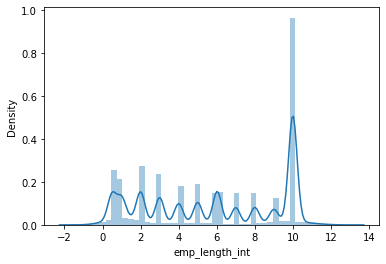

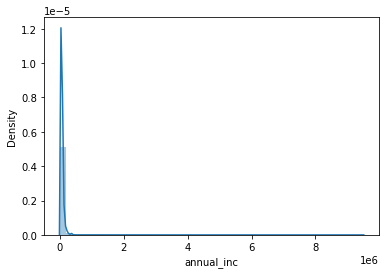

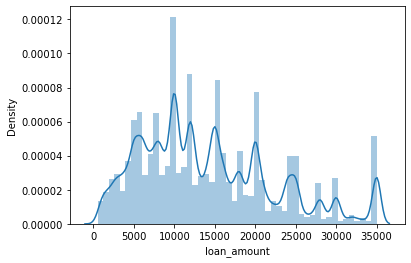

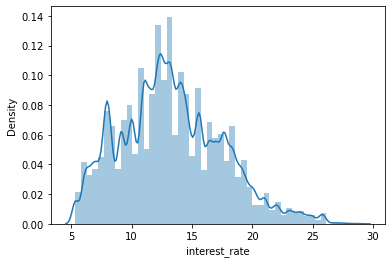

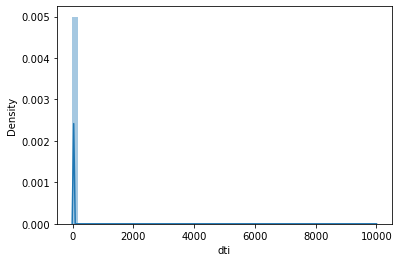

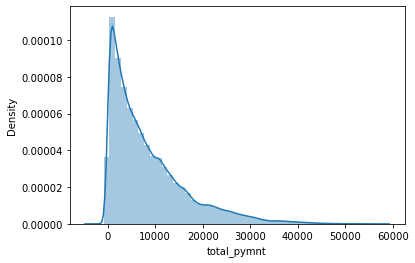

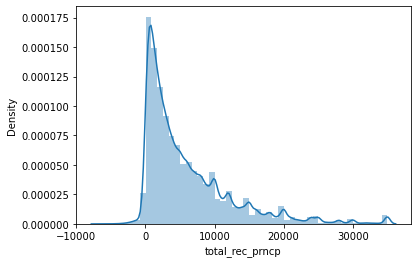

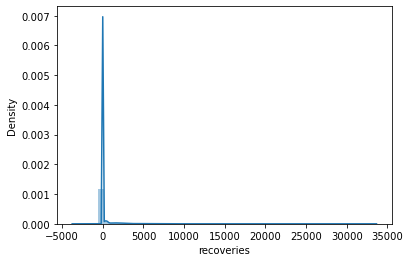

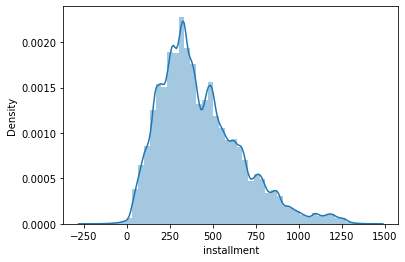

In [44]:
## Histogram and Density plots for all numerical data:
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

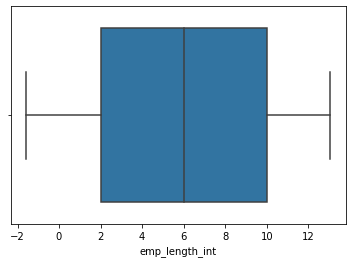

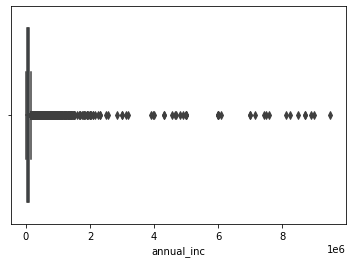

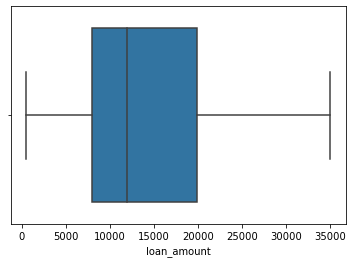

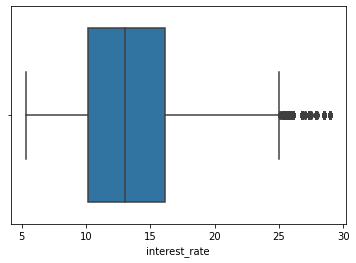

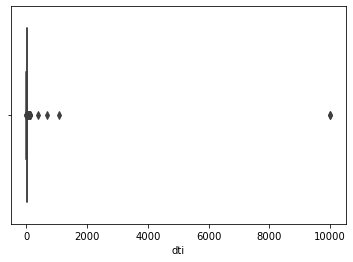

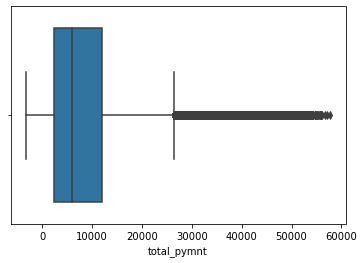

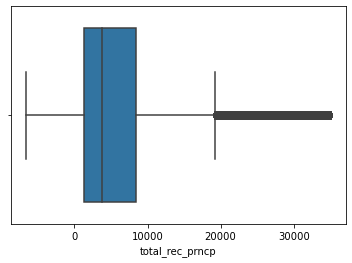

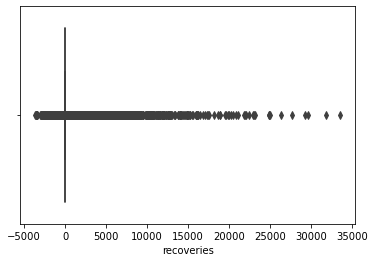

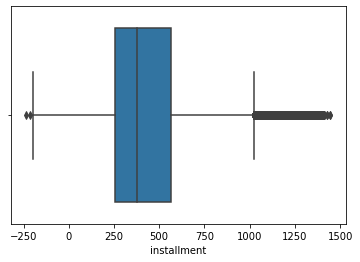

In [45]:
## Histogram and Density plots for all numerical data:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

# Bivariate analysis before data processing

In [46]:
df.head(2)

id  emp_length_int home_ownership income_category  annual_inc  \
0  1077501            10.0           RENT             Low       24000   
1  1077430             0.5           RENT             Low       30000   

   loan_amount        term application_type      purpose interest_payments  \
0         5000   36 months       INDIVIDUAL  credit_card               Low   
1         2500   60 months       INDIVIDUAL          car              High   

  loan_condition  interest_rate grade    dti  total_pymnt  total_rec_prncp  \
0      Good Loan          10.65     B  27.65  5861.071414          5000.00   
1       Bad Loan          15.27     C   1.00  1008.710000           456.46   

   recoveries  installment    region issue_date issue_month issue_year  \
0        0.00       162.87   munster         12           1       2011   
1      117.08        59.83  leinster         12           1       2011   

  final_date final_month final_year  
0          1           1       2015  
1          4           1       2013

<AxesSubplot:xlabel='emp_length_int', ylabel='annual_inc'>

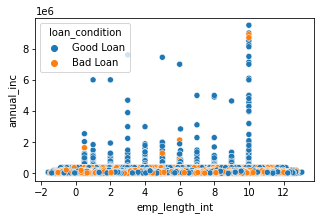

In [47]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='emp_length_int', ylabel='loan_amount'>

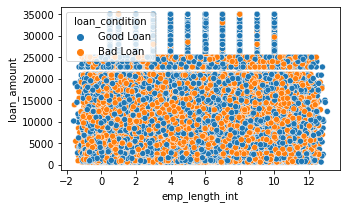

In [48]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='loan_amount',data=df,hue='loan_condition')

<AxesSubplot:xlabel='emp_length_int', ylabel='interest_rate'>

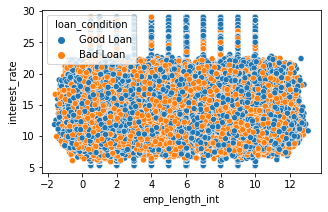

In [49]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='interest_rate',data=df,hue='loan_condition')

<AxesSubplot:xlabel='emp_length_int', ylabel='dti'>

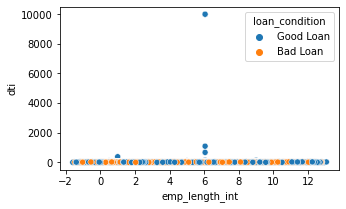

In [50]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='dti',data=df,hue='loan_condition')

<AxesSubplot:xlabel='emp_length_int', ylabel='total_pymnt'>

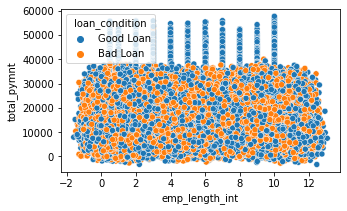

In [51]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='total_pymnt',data=df,hue='loan_condition')

<AxesSubplot:xlabel='emp_length_int', ylabel='total_rec_prncp'>

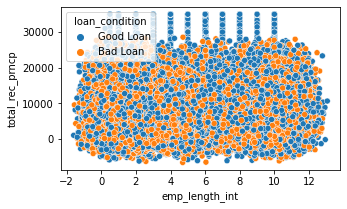

In [52]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='total_rec_prncp',data=df,hue='loan_condition')

<AxesSubplot:xlabel='emp_length_int', ylabel='recoveries'>

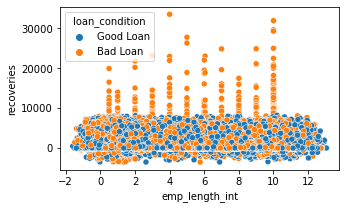

In [53]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='recoveries',data=df,hue='loan_condition')

<AxesSubplot:xlabel='emp_length_int', ylabel='installment'>

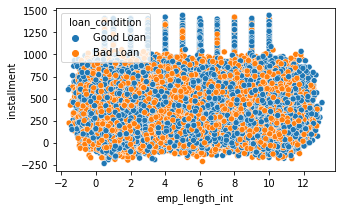

In [54]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='emp_length_int',y='installment',data=df,hue='loan_condition')

<AxesSubplot:xlabel='loan_amount', ylabel='annual_inc'>

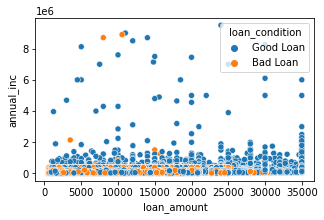

In [55]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='loan_amount',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='interest_rate', ylabel='annual_inc'>

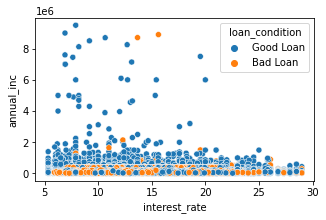

In [56]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='interest_rate',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='dti', ylabel='annual_inc'>

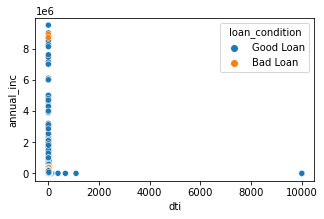

In [57]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='dti',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='total_pymnt', ylabel='annual_inc'>

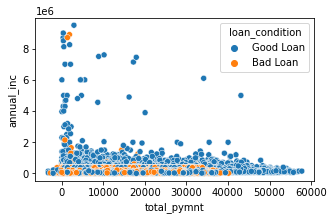

In [58]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_pymnt',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='total_rec_prncp', ylabel='annual_inc'>

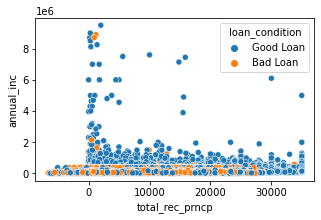

In [59]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_rec_prncp',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='recoveries', ylabel='annual_inc'>

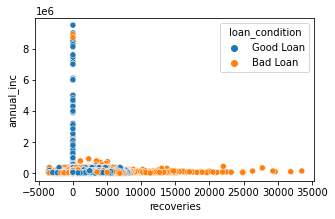

In [60]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='recoveries',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='installment', ylabel='annual_inc'>

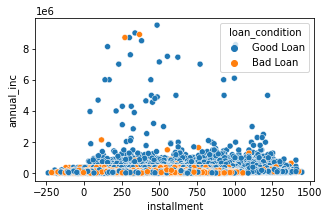

In [61]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='installment',y='annual_inc',data=df,hue='loan_condition')

<AxesSubplot:xlabel='loan_amount', ylabel='interest_rate'>

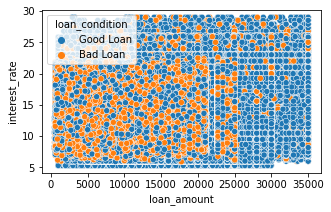

In [62]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='loan_amount',y='interest_rate',data=df,hue='loan_condition')

<AxesSubplot:xlabel='loan_amount', ylabel='dti'>

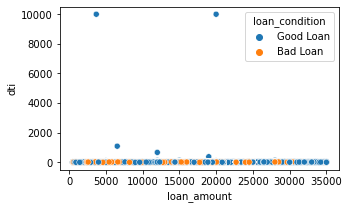

In [63]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='loan_amount',y='dti',data=df,hue='loan_condition')

<AxesSubplot:xlabel='loan_amount', ylabel='total_pymnt'>

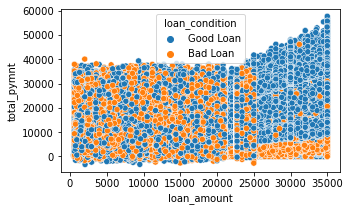

In [64]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='loan_amount',y='total_pymnt',data=df,hue='loan_condition')

<AxesSubplot:xlabel='loan_amount', ylabel='total_rec_prncp'>

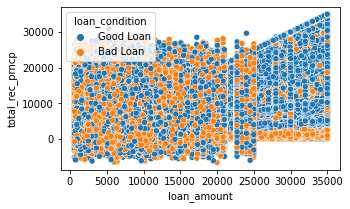

In [65]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='loan_amount',y='total_rec_prncp',data=df,hue='loan_condition')

<AxesSubplot:xlabel='loan_amount', ylabel='recoveries'>

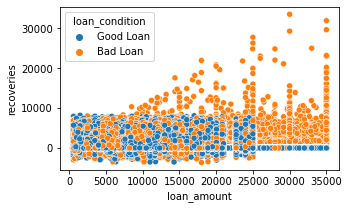

In [66]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='loan_amount',y='recoveries',data=df,hue='loan_condition')

<AxesSubplot:xlabel='loan_amount', ylabel='installment'>

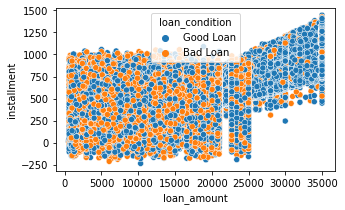

In [67]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='loan_amount',y='installment',data=df,hue='loan_condition')

<AxesSubplot:xlabel='interest_rate', ylabel='dti'>

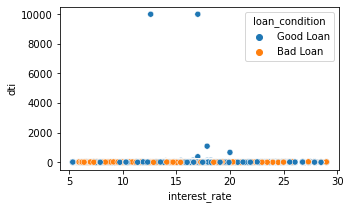

In [68]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='interest_rate',y='dti',data=df,hue='loan_condition')

<AxesSubplot:xlabel='interest_rate', ylabel='total_pymnt'>

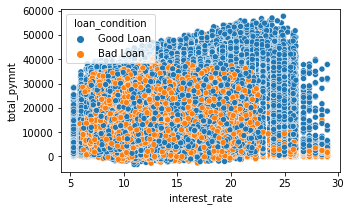

In [69]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='interest_rate',y='total_pymnt',data=df,hue='loan_condition')

<AxesSubplot:xlabel='interest_rate', ylabel='total_rec_prncp'>

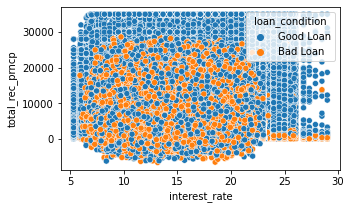

In [70]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='interest_rate',y='total_rec_prncp',data=df,hue='loan_condition')

<AxesSubplot:xlabel='interest_rate', ylabel='recoveries'>

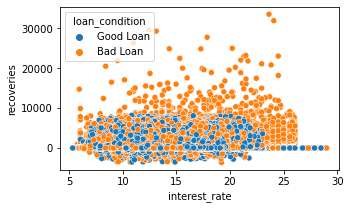

In [71]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='interest_rate',y='recoveries',data=df,hue='loan_condition')

<AxesSubplot:xlabel='interest_rate', ylabel='installment'>

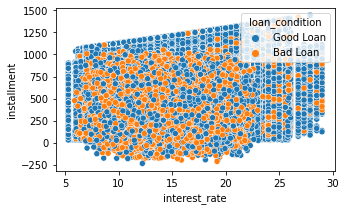

In [72]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='interest_rate',y='installment',data=df,hue='loan_condition')

<AxesSubplot:xlabel='interest_rate', ylabel='dti'>

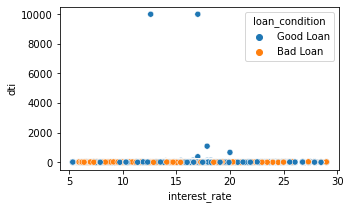

In [73]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='interest_rate',y='dti',data=df,hue='loan_condition')

<AxesSubplot:xlabel='dti', ylabel='total_pymnt'>

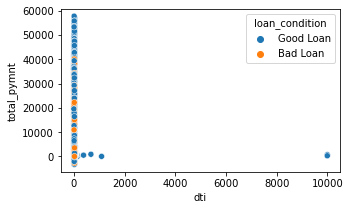

In [74]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='dti',y='total_pymnt',data=df,hue='loan_condition')

<AxesSubplot:xlabel='dti', ylabel='total_rec_prncp'>

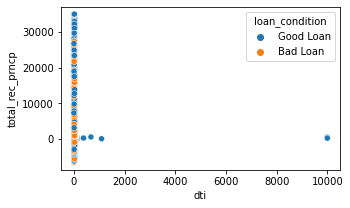

In [75]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='dti',y='total_rec_prncp',data=df,hue='loan_condition')

<AxesSubplot:xlabel='dti', ylabel='recoveries'>

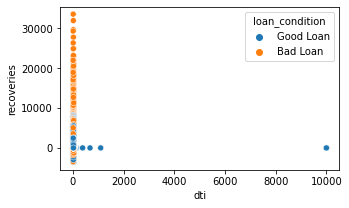

In [76]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='dti',y='recoveries',data=df,hue='loan_condition')

<AxesSubplot:xlabel='dti', ylabel='installment'>

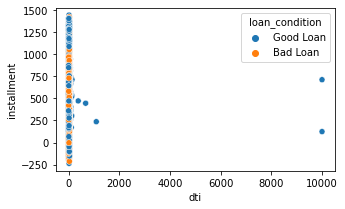

In [77]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='dti',y='installment',data=df,hue='loan_condition')

<AxesSubplot:xlabel='total_pymnt', ylabel='total_rec_prncp'>

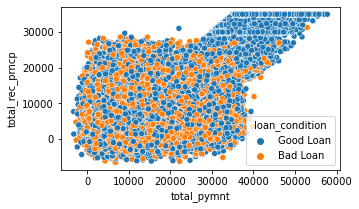

In [78]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_pymnt',y='total_rec_prncp',data=df,hue='loan_condition')

<AxesSubplot:xlabel='total_pymnt', ylabel='recoveries'>

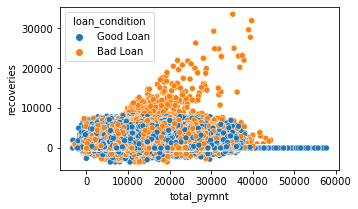

In [79]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_pymnt',y='recoveries',data=df,hue='loan_condition')

<AxesSubplot:xlabel='total_pymnt', ylabel='installment'>

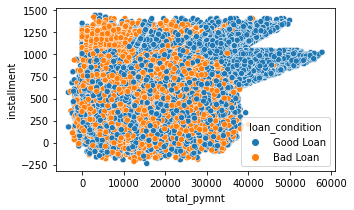

In [80]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_pymnt',y='installment',data=df,hue='loan_condition')

<AxesSubplot:xlabel='total_rec_prncp', ylabel='recoveries'>

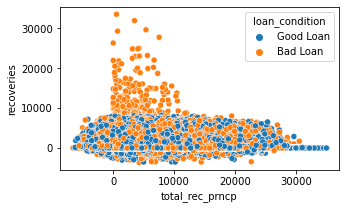

In [81]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_rec_prncp',y='recoveries',data=df,hue='loan_condition')

<AxesSubplot:xlabel='total_rec_prncp', ylabel='installment'>

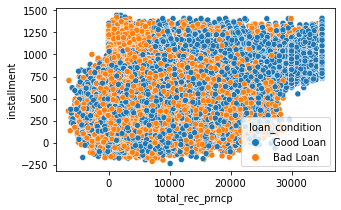

In [82]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_rec_prncp',y='installment',data=df,hue='loan_condition')

<AxesSubplot:xlabel='recoveries', ylabel='installment'>

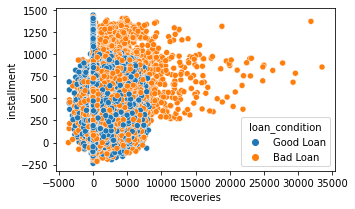

In [83]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='recoveries',y='installment',data=df,hue='loan_condition')

# Multivariate analysis before data processing

In [84]:
df.corr()

emp_length_int  annual_inc  loan_amount  interest_rate  \
emp_length_int         1.000000    0.061730     0.114890       0.000246   
annual_inc             0.061730    1.000000     0.307006      -0.068818   
loan_amount            0.114890    0.307006     1.000000       0.121935   
interest_rate          0.000246   -0.068818     0.121935       1.000000   
dti                    0.032500   -0.076273     0.035914       0.068584   
total_pymnt            0.006087    0.125631     0.352571       0.156662   
total_rec_prncp        0.021449    0.131257     0.330314       0.052498   
recoveries            -0.068077   -0.023864    -0.065038       0.072616   
installment            0.084262    0.296699     0.847620       0.115387   

                      dti  total_pymnt  total_rec_prncp  recoveries  \
emp_length_int   0.032500     0.006087         0.021449   -0.068077   
annual_inc      -0.076273     0.125631         0.131257   -0.023864   
loan_amount      0.035914     0.352571         0.330314   -0.065038   
interest_rate    0.068584     0.156662         0.052498    0.072616   
dti              1.000000    -0.059640        -0.057142   -0.041601   
total_pymnt     -0.059640     1.000000         0.852762    0.131724   
total_rec_prncp -0.057142     0.852762         1.000000    0.016477   
recoveries      -0.041601     0.131724         0.016477    1.000000   
installment      0.020835     0.415843         0.396642   -0.002985   

                 installment  
emp_length_int      0.084262  
annual_inc          0.296699  
loan_amount         0.847620  
interest_rate       0.115387  
dti                 0.020835  
total_pymnt         0.415843  
total_rec_prncp     0.396642  
recoveries         -0.002985  
installment         1.000000

<AxesSubplot:>

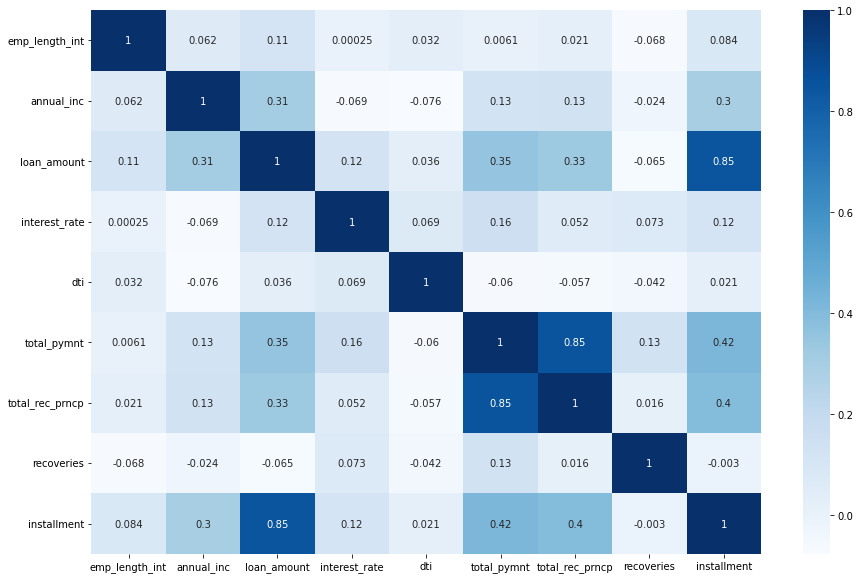

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

 # Checking and cleaning bad data

COLUMN-'emp_length_int

In [86]:
#checking bad data in 'emp_length_int' column
df[df.emp_length_int < 0]

id  emp_length_int home_ownership income_category  annual_inc  \
887422   265521       -0.113907           RENT            High       65000   
887427   258652       -0.686040       MORTGAGE            High      102000   
887466   242196       -0.066429       MORTGAGE          Medium      102000   
887475   250629       -0.618570           RENT          Medium       56712   
887478   247424       -0.073353           RENT             Low       34000   
...         ...             ...            ...             ...         ...   
1048519  257612       -0.170164       MORTGAGE          Medium       57000   
1048537  256019       -0.085808       MORTGAGE             Low       54000   
1048562  264886       -0.549005           RENT             Low      225000   
1048564  233852       -0.007669            OWN            High       31400   
1048572  242839       -0.064512            OWN            High       32400   

         loan_amount        term application_type             purpose  \
887422          2050   36 months       INDIVIDUAL         educational   
887427         12325   36 months       INDIVIDUAL             wedding   
887466           600   36 months       INDIVIDUAL         educational   
887475          8050   36 months       INDIVIDUAL               house   
887478         20500   36 months       INDIVIDUAL                 car   
...              ...         ...              ...                 ...   
1048519         9900   36 months       INDIVIDUAL  debt_consolidation   
1048537         5000   36 months       INDIVIDUAL              moving   
1048562         5450   36 months       INDIVIDUAL               other   
1048564         9700   36 months       INDIVIDUAL         educational   
1048572         4000   36 months       INDIVIDUAL         educational   

        interest_payments loan_condition  interest_rate grade        dti  \
887422               High      Good Loan      10.336154     G   7.674716   
887427               High      Good Loan       9.252249     D   0.803145   
887466                Low       Bad Loan      11.101374     F  12.328633   
887475                Low       Bad Loan      17.711722     G   6.910918   
887478               High      Good Loan      13.240065     A   5.877858   
...                   ...            ...            ...   ...        ...   
1048519              High       Bad Loan      13.772249     B   6.411111   
1048537              High      Good Loan      11.042696     E   4.939570   
1048562               Low       Bad Loan      10.209684     D  24.636450   
1048564              High      Good Loan       9.714488     G   7.112628   
1048572               Low      Good Loan      12.307438     A  19.541525   

          total_pymnt  total_rec_prncp   recoveries  installment  \
887422   26240.531370      1542.221731   -20.760377   640.878510   
887427    4376.695784      4368.797001    32.967841    79.655061   
887466   12352.308150      2736.028196  1583.298715   467.398724   
887475   22473.844320      5784.584593   453.851793   225.230781   
887478    7010.842296      6245.232184    16.241342   380.033706   
...               ...              ...          ...          ...   
1048519  26358.471800      6791.452688  2897.050945   785.631406   
1048537  12676.112290      6961.171959    49.713050   418.953877   
1048562  13251.285270      9524.600893   754.470709   550.059425   
1048564  12662.069520     12145.649200  1049.587834   158.337757   
1048572  27078.337680     17478.109930   728.610773   277.961860   

               region issue_date issue_month issue_year final_date  \
887422       cannught          2           1       2008          6   
887427   Northern-Irl          2           1       2008          2   
887466        munster          2           1       2008          6   
887475         ulster          2           1       2008         10   
887478       leinster          2           1       2008         10   
...               ...        ...         ...     

In [28]:
print("Skew :",df['emp_length_int'].skew())
print("Kurtosis :",df['emp_length_int'].kurtosis())
print("mean :",df['emp_length_int'].mean())
print("median :",df['emp_length_int'].median())
print("mode :",df['emp_length_int'].mode())

Skew : -0.12437262973999558
Kurtosis : -1.492616228317478
mean : 5.838360516879402
median : 6.0
mode : 0    10.0
Name: emp_length_int, dtype: float64


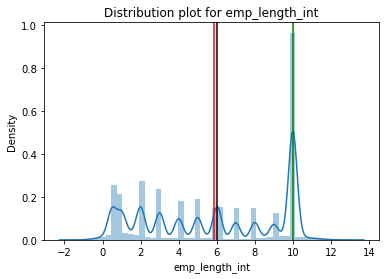

In [88]:
sns.distplot(df['emp_length_int'])
plt.axvline(df.emp_length_int.mean(),color='red')
plt.axvline(df.emp_length_int.median(),color='black')
plt.axvline(df.emp_length_int.mode()[0],color='green')
plt.title("Distribution plot for emp_length_int")
plt.xlabel("emp_length_int")
plt.ylabel("Density")
plt.show()

In [29]:
for i in range(0,len(df['emp_length_int'])):
  if df['emp_length_int'][i] < 0:
    df['emp_length_int'][i] = 0

In [30]:
df[df.emp_length_int < 0]

Empty DataFrame
Columns: [id, emp_length_int, home_ownership, income_category, annual_inc, loan_amount, term, application_type, purpose, interest_payments, loan_condition, interest_rate, grade, dti, total_pymnt, total_rec_prncp, recoveries, installment, region, issue_date, issue_month, issue_year, final_date, final_month, final_year]
Index: []

In [31]:
df.shape

(1048575, 25)

In [32]:
print("Skew :",df['emp_length_int'].skew())
print("Kurtosis :",df['emp_length_int'].kurtosis())
print("mean :",df['emp_length_int'].mean())
print("median :",df['emp_length_int'].median())
print("mode :",df['emp_length_int'].mode())

Skew : -0.12151391454269948
Kurtosis : -1.4977532378083374
mean : 5.840360382839877
median : 6.0
mode : 0    10.0
Name: emp_length_int, dtype: float64


<AxesSubplot:xlabel='emp_length_int'>

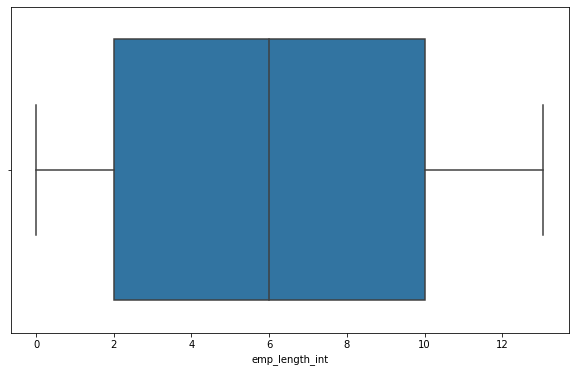

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x='emp_length_int',data=df)

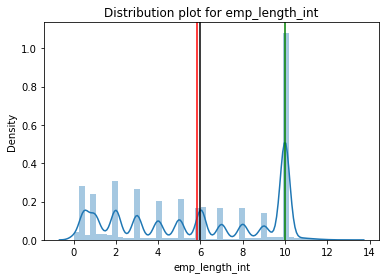

In [94]:
sns.distplot(df['emp_length_int'])
plt.axvline(df.emp_length_int.mean(),color='red')
plt.axvline(df.emp_length_int.median(),color='black')
plt.axvline(df.emp_length_int.mode()[0],color='green')
plt.title("Distribution plot for emp_length_int")
plt.xlabel("emp_length_int")
plt.ylabel("Density")
plt.show()

In [95]:
df.emp_length_int.isnull().sum()

0

Checking for outliers

In [96]:
Q1 = df['emp_length_int'].quantile(0.25)
Q3 = df['emp_length_int'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

8.0


In [97]:
np.where((df['emp_length_int'] < (Q1 - 1.5 * IQR)) | (df['emp_length_int']> (Q3 + 1.5 * IQR)))

(array([], dtype=int64),)

There are no outliers in 'emp_length_int' column

In [98]:
# df['log_t_emp_length_int'] = np.log(df['emp_length_int'])
# print('non trans',df['emp_length_int'].skew(),'transf',df['log_t_emp_length_int'].skew())

In [99]:
# df['emp_length_int']=np.exp(df['log_t_emp_length_int'])
# df['emp_length_int'].skew()

In [100]:
df.head()

id  emp_length_int home_ownership income_category  annual_inc  \
0  1077501            10.0           RENT             Low       24000   
1  1077430             0.5           RENT             Low       30000   
2  1077175            10.0           RENT             Low       12252   
3  1076863            10.0           RENT             Low       49200   
4  1075358             1.0           RENT             Low       80000   

   loan_amount        term application_type         purpose interest_payments  \
0         5000   36 months       INDIVIDUAL     credit_card               Low   
1         2500   60 months       INDIVIDUAL             car              High   
2         2400   36 months       INDIVIDUAL  small_business              High   
3        10000   36 months       INDIVIDUAL           other              High   
4         3000   60 months       INDIVIDUAL           other               Low   

  loan_condition  interest_rate grade    dti   total_pymnt  total_rec_prncp  \
0      Good Loan          10.65     B  27.65   5861.071414          5000.00   
1       Bad Loan          15.27     C   1.00   1008.710000           456.46   
2      Good Loan          15.96     C   8.72   3003.653644          2400.00   
3      Good Loan          13.49     C  20.00  12226.302210         10000.00   
4      Good Loan          12.69     B  17.94   3242.170000          2233.10   

   recoveries  installment    region issue_date issue_month issue_year  \
0        0.00       162.87   munster         12           1       2011   
1      117.08        59.83  leinster         12           1       2011   
2        0.00        84.33  cannught         12           1       2011   
3        0.00       339.31    ulster         12           1       2011   
4        0.00        67.79    ulster         12           1       2011   

  final_date final_month final_year  
0          1           1       2015  
1          4           1       2013  
2          6           1       2014  
3          1           1       2015  
4          1           1       2016

In [101]:
# df.drop('log_t_emp_length_int',axis=1,inplace=True)

In [102]:
# df.reset_index(drop=True, inplace=True)

COLUMN- 'dti'

In [103]:
#DTI concept
#The debt-to-income (DTI) ratio measures the amount of income a person or organization generates in order to service a debt.
#A DTI of 43% is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than 36%.
#A low DTI ratio indicates sufficient income relative to debt servicing, and it makes a borrower more attractive.

In [104]:
#checking bad data in 'dti' column
df[df.dti < 0]

id  emp_length_int home_ownership income_category  annual_inc  \
887382   250849        0.918135           RENT            High       72000   
887509   248927        9.487290           RENT            High       49853   
887540   254992        3.166183           RENT             Low       26000   
887575   245620        0.639747            OWN          Medium       31400   
887618   247569        5.943045            OWN          Medium       36000   
...         ...             ...            ...             ...         ...   
1048272  226735        0.722709           RENT          Medium       84000   
1048396  262618        3.927488       MORTGAGE          Medium       63000   
1048488  211586        0.579369       MORTGAGE          Medium       20400   
1048553  258717        1.804507       MORTGAGE            High       35000   
1048569  259414        3.270405            OWN            High       34000   

         loan_amount        term application_type      purpose  \
887382         13000   36 months       INDIVIDUAL  educational   
887509          2000   36 months       INDIVIDUAL       moving   
887540         10075   36 months       INDIVIDUAL      medical   
887575         18500   36 months       INDIVIDUAL      wedding   
887618          3975   36 months       INDIVIDUAL     vacation   
...              ...         ...              ...          ...   
1048272        15250   36 months       INDIVIDUAL          car   
1048396        12800   36 months       INDIVIDUAL  credit_card   
1048488         1000   36 months       INDIVIDUAL  educational   
1048553         2925   36 months       INDIVIDUAL        house   
1048569         9000   36 months       INDIVIDUAL        other   

        interest_payments loan_condition  interest_rate grade       dti  \
887382               High      Good Loan      12.062428     C -0.318646   
887509               High      Good Loan      16.287366     B -0.933277   
887540               High       Bad Loan      21.349701     D -1.832315   
887575               High       Bad Loan      12.063492     D -1.943104   
887618                Low      Good Loan      11.331101     D -1.672706   
...                   ...            ...            ...   ...       ...   
1048272               Low       Bad Loan      18.316241     E -0.950959   
1048396               Low       Bad Loan      14.831054     D -0.421097   
1048488              High      Good Loan      15.041298     A -2.729960   
1048553              High      Good Loan      19.902242     E -0.322229   
1048569              High      Good Loan      10.407201     A -0.676962   

          total_pymnt  total_rec_prncp   recoveries  installment  \
887382   11056.065660      4066.532281    17.460072   338.107177   
887509   10694.839610     13658.879620   889.298778   587.250230   
887540   11151.084270      3641.211825   311.672744   468.211887   
887575    9711.011314     19830.408550   179.450026   809.248745   
887618    5188.570563      -486.050075     7.454473   615.924642   
...               ...              ...          ...          ...   
1048272   9938.279165      5917.143041  1695.947790   413.684853   
1048396   2823.843042      9416.857432  1987.734629   354.794820   
1048488  17167.925730      3251.647346  2642.031495   135.185879   
1048553  10978.756090     17476.491510  5266.943308   549.553144   
1048569  19550.306860      7230.884649    41.930441   359.935329   

               region issue_date issue_month issue_year final_date  \
887382       leinster          2           1       2008         12   
887509       leinster          2           1       2008         12   
887540        munster          2           1       2008          8   
887575        munster          2           1       2008         12   
887618       leinster          2           1       2008         11   
...               ...        ...         ...        ...        ...   
1048272       munster          2           1       2008         10   
10483

In [105]:
df[df.dti > 100]

id  emp_length_int home_ownership income_category  annual_inc  \
475046  67405134            6.05       MORTGAGE             Low        1770   
476900  67555887            6.05       MORTGAGE             Low       20000   
480179  67495417            9.00           RENT             Low       17000   
484446  66415476            6.05       MORTGAGE             Low           0   
489021  66495833            0.50           RENT             Low       27000   
521751  65571637            6.05       MORTGAGE             Low        8700   
531886  65199509            6.05       MORTGAGE             Low           0   
532701  64957302            1.00       MORTGAGE             Low        5000   
540456  64078746            6.05           RENT             Low        1200   
544139  63671798            6.05       MORTGAGE             Low        9745   
563635  62206500            5.00       MORTGAGE             Low       12000   

        loan_amount        term application_type             purpose  \
475046         6550   36 months            JOINT         credit_card   
476900        15000   36 months            JOINT  debt_consolidation   
480179        28000   60 months            JOINT  debt_consolidation   
484446        20000   36 months            JOINT  debt_consolidation   
489021        20000   60 months            JOINT  debt_consolidation   
521751        15000   36 months            JOINT  debt_consolidation   
531886         3700   36 months            JOINT         credit_card   
532701        19000   60 months            JOINT               other   
540456        12000   36 months            JOINT  debt_consolidation   
544139        12000   60 months            JOINT  debt_consolidation   
563635         5000   36 months            JOINT    home_improvement   

       interest_payments loan_condition  interest_rate grade      dti  \
475046              High      Good Loan          17.86     D  1092.52   
476900              High      Good Loan          16.55     D   137.40   
480179              High      Good Loan          18.20     E   136.97   
484446              High      Good Loan          16.99     D  9999.00   
489021              High      Good Loan          18.20     E   100.09   
521751              High      Good Loan          15.41     D   120.66   
531886               Low      Good Loan          12.59     C  9999.00   
532701              High      Good Loan          16.99     D   380.53   
540456              High      Good Loan          19.99     E   672.52   
544139              High      Good Loan          17.86     D   125.25   
563635              High      Good Loan          13.99     C   104.00   

        total_pymnt  total_rec_prncp  recoveries  installment        region  \
475046         0.00             0.00         0.0       236.34       munster   
476900         0.00             0.00         0.0       531.44       munster   
480179         0.00             0.00         0.0       714.07        ulster   
484446       694.08           429.79         0.0       712.96       munster   
489021       489.83           206.72         0.0       510.05  Northern-Irl   
521751       497.32           330.38         0.0       523.00        ulster   
531886       242.70           171.13         0.0       123.94       munster   
532701       498.99           203.08         0.0       472.10       munster   
540456       865.17           496.12         0.0       445.91       munster   
544139       595.71           252.28         0.0       303.81  Northern-Irl   
563635       508.72           341.69         0.0       170.87      leinster   

       issue_date issue_month issue_year final_date final_month final_year  
475046         12           1       2015          1           1       2016  
476900         12           1       2015          1           1       2016  
480179         12           1       2015          1           1       2016  
484446         12           1       2015          1           1   

In [33]:
print("Skew :",df['dti'].skew())
print("kurtosis :",df['dti'].kurtosis())
print("mean :",df['dti'].mean())
print("median :",df['dti'].median())
print("mode :",df['dti'].mode())

Skew : 445.90690102811976
kurtosis : 274400.76476520085
mean : 17.56435815808295
median : 17.19
mode : 0    19.2
Name: dti, dtype: float64


<AxesSubplot:xlabel='dti'>

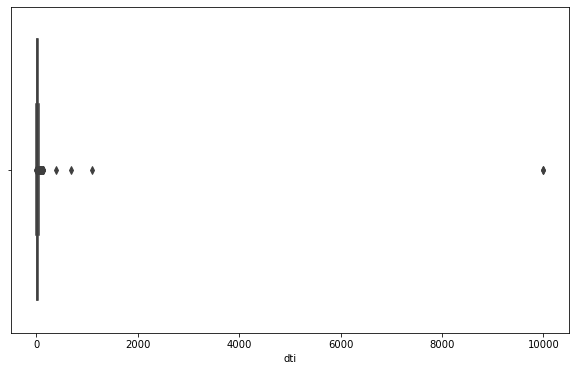

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='dti',data=df)

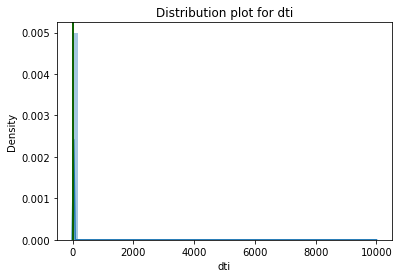

In [108]:
sns.distplot(df['dti'])
plt.axvline(df.dti.mean(),color='red')
plt.axvline(df.dti.median(),color='black')
plt.axvline(df.dti.mode()[0],color='green')
plt.title("Distribution plot for dti")
plt.xlabel("dti")
plt.ylabel("Density")
plt.show()

In [33]:
#Capping is done.
for i in range(0,len(df['dti'])):
  if df['dti'][i] < 0:
    df['dti'][i] = 0
  elif df['dti'][i] > 100:
    df['dti'][i] = 100
  else :
    continue


In [35]:
df[df.dti < 0]

Empty DataFrame
Columns: [id, emp_length_int, home_ownership, income_category, annual_inc, loan_amount, term, application_type, purpose, interest_payments, loan_condition, interest_rate, grade, dti, total_pymnt, total_rec_prncp, recoveries, installment, region, issue_date, issue_month, issue_year, final_date, final_month, final_year]
Index: []

In [36]:
df[df.dti > 100]

Empty DataFrame
Columns: [id, emp_length_int, home_ownership, income_category, annual_inc, loan_amount, term, application_type, purpose, interest_payments, loan_condition, interest_rate, grade, dti, total_pymnt, total_rec_prncp, recoveries, installment, region, issue_date, issue_month, issue_year, final_date, final_month, final_year]
Index: []

In [35]:
print("Skew :",df['dti'].skew())
print("kurtosis :",df['dti'].kurtosis())
print("mean :",df['dti'].mean())
print("median :",df['dti'].median())
print("mode :",df['dti'].mode())

Skew : 0.21637763353473838
kurtosis : -0.4173911779771884
mean : 17.549499835697496
median : 17.19
mode : 0    0.0
Name: dti, dtype: float64


<AxesSubplot:xlabel='dti'>

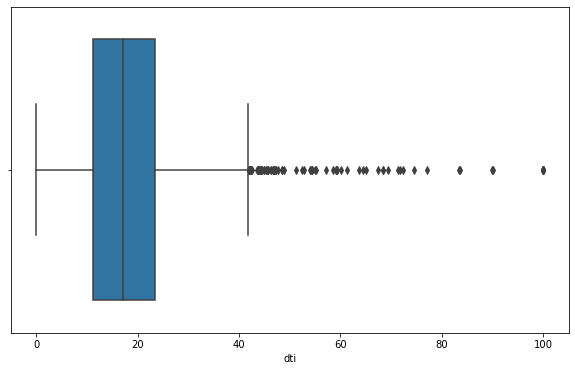

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='dti',data=df)

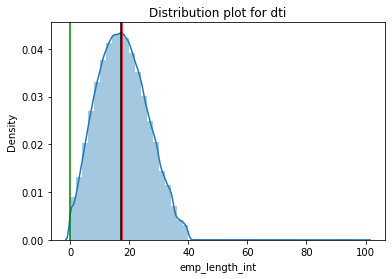

In [114]:
sns.distplot(df['dti'])
plt.axvline(df.dti.mean(),color='red')
plt.axvline(df.dti.median(),color='black')
plt.axvline(df.dti.mode()[0],color='green')
plt.title("Distribution plot for dti")
plt.xlabel("emp_length_int")
plt.ylabel("Density")
plt.show()

<AxesSubplot:>

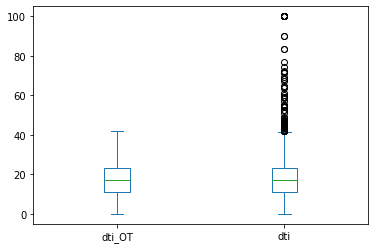

In [34]:
#to treat outliers we are using capping
xbar=df['dti'].mean()
q1=df['dti'].quantile(0.25)
q3=df['dti'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['dti_OT']=df['dti'].apply(lambda x: ul if x > ul else ll if x < ll else x)
df[['dti_OT','dti']].plot(kind='box')

<AxesSubplot:xlabel='dti_OT'>

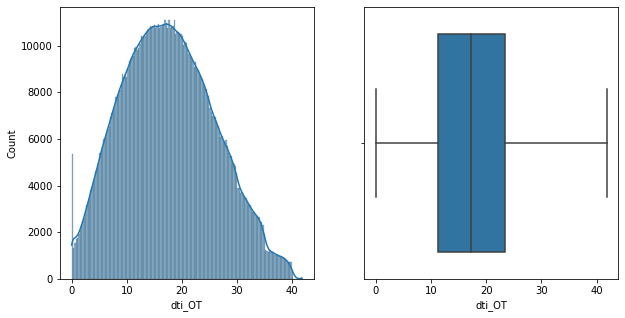

In [39]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.dti_OT, kde=True, ax=axs[0])
sns.boxplot(x='dti_OT',data=df, ax=axs[1])

In [37]:
print("Skew :",df['dti_OT'].skew())
print("kurtosis :",df['dti_OT'].kurtosis())
print("mean :",df['dti_OT'].mean())
print("median :",df['dti_OT'].median())
print("mode :",df['dti_OT'].mode())

Skew : 0.2016763444958101
kurtosis : -0.5464270508813658
mean : 17.54805042578402
median : 17.19
mode : 0    0.0
Name: dti_OT, dtype: float64


In [35]:
df.drop('dti',axis=1,inplace=True)

In [42]:
df.head()

id  emp_length_int home_ownership income_category  annual_inc  \
0  1077501            10.0           RENT             Low       24000   
1  1077430             0.5           RENT             Low       30000   
2  1077175            10.0           RENT             Low       12252   
3  1076863            10.0           RENT             Low       49200   
4  1075358             1.0           RENT             Low       80000   

   loan_amount        term application_type         purpose interest_payments  \
0         5000   36 months       INDIVIDUAL     credit_card               Low   
1         2500   60 months       INDIVIDUAL             car              High   
2         2400   36 months       INDIVIDUAL  small_business              High   
3        10000   36 months       INDIVIDUAL           other              High   
4         3000   60 months       INDIVIDUAL           other               Low   

  loan_condition  interest_rate grade   total_pymnt  total_rec_prncp  \
0      Good Loan          10.65     B   5861.071414          5000.00   
1       Bad Loan          15.27     C   1008.710000           456.46   
2      Good Loan          15.96     C   3003.653644          2400.00   
3      Good Loan          13.49     C  12226.302210         10000.00   
4      Good Loan          12.69     B   3242.170000          2233.10   

   recoveries  installment    region issue_date issue_month issue_year  \
0        0.00       162.87   munster         12           1       2011   
1      117.08        59.83  leinster         12           1       2011   
2        0.00        84.33  cannught         12           1       2011   
3        0.00       339.31    ulster         12           1       2011   
4        0.00        67.79    ulster         12           1       2011   

  final_date final_month final_year  dti_OT  
0          1           1       2015   27.65  
1          4           1       2013    1.00  
2          6           1       2014    8.72  
3          1           1       2015   20.00  
4          1           1       2016   17.94

In [120]:
#df.reset_index(drop=True, inplace=True)

In [43]:
df.shape

(1048575, 25)

COLUMN-'total_pymnt'

In [122]:
#checking bad data in 'total_pymnt' column
df[df.total_pymnt < 0]

id  emp_length_int home_ownership income_category  annual_inc  \
887450   266989       10.412699           RENT             Low       39000   
887500   249194       12.071449            OWN            High       49600   
888680   264901        9.789122       MORTGAGE             Low       39600   
889045   242196       11.271921            OWN             Low       32400   
889887   264630        5.892091            OWN             Low       32708   
...         ...             ...            ...             ...         ...   
1047509  242839        0.174565       MORTGAGE            High       32400   
1048113  255150        1.141988       MORTGAGE             Low       18720   
1048307  245620       10.479653           RENT             Low       16800   
1048513  260412        1.514678            OWN          Medium       92400   
1048546  245190        0.322185           RENT            High       72000   

         loan_amount        term application_type             purpose  \
887450          8500   36 months       INDIVIDUAL              moving   
887500         10800   36 months       INDIVIDUAL  debt_consolidation   
888680          3000   36 months       INDIVIDUAL              moving   
889045         10800   36 months       INDIVIDUAL         educational   
889887         15450   36 months       INDIVIDUAL             wedding   
...              ...         ...              ...                 ...   
1047509        14725   36 months       INDIVIDUAL      small_business   
1048113        19200   36 months       INDIVIDUAL            vacation   
1048307         5000   36 months       INDIVIDUAL            vacation   
1048513        22725   36 months       INDIVIDUAL             wedding   
1048546        16000   36 months       INDIVIDUAL             medical   

        interest_payments loan_condition  interest_rate grade  total_pymnt  \
887450               High       Bad Loan      10.536797     E   -10.969509   
887500               High      Good Loan      18.137188     A -1585.304986   
888680                Low      Good Loan      12.293967     C  -211.201674   
889045                Low      Good Loan      20.475254     F  -834.388629   
889887                Low      Good Loan      13.136241     B  -925.669196   
...                   ...            ...            ...   ...          ...   
1047509               Low       Bad Loan      14.928751     B   -27.857486   
1048113               Low       Bad Loan      15.426439     E   -37.838108   
1048307               Low      Good Loan      17.114424     D -2104.824259   
1048513              High      Good Loan      16.851854     D  -275.344035   
1048546              High       Bad Loan      12.864462     A   -15.714210   

         total_rec_prncp   recoveries  installment        region issue_date  \
887450       4514.931820   434.223066   490.336803       munster          2   
887500       3713.330289   405.273373   480.228915  Northern-Irl          2   
888680       3546.230660  2875.712856   346.985448      cannught          2   
889045       5510.867311  6519.190436   256.134161       munster          2   
889887      11858.389900  -892.438395   278.640319      cannught          2   
...                  ...          ...          ...           ...        ...   
1047509      1867.056787  2348.351129   440.208600  Northern-Irl          2   
1048113      3206.643265    22.525622   161.341099      cannught          2   
1048307      3909.577037    12.812723   465.110603  Northern-Irl          2   
1048513      1946.289909  3346.165653   315.501782  Northern-Irl          2   
1048546     15835.849370   -33.339355   351.747544      cannught          2   

        issue_month issue_year final_date final_month final_year     dti_OT  
887450            1       2008          7           1       2010  16.431148  
887500            1       2008         11           1       2009  19.376646  
888680            1       2008          3           1       2013  15.306675  
8

In [39]:
print("skew:",df['total_pymnt'].skew())
print("kurtosis:",df['total_pymnt'].kurtosis())
print("mean:",df['total_pymnt'].mean())
print("median:",df['total_pymnt'].median())
print("mode:",df['total_pymnt'].mode())

skew: 1.5187101815826314
kurtosis: 2.4727715944847146
mean: 8372.162251954038
median: 5937.03
mode: 0    0.0
Name: total_pymnt, dtype: float64


<AxesSubplot:xlabel='total_pymnt'>

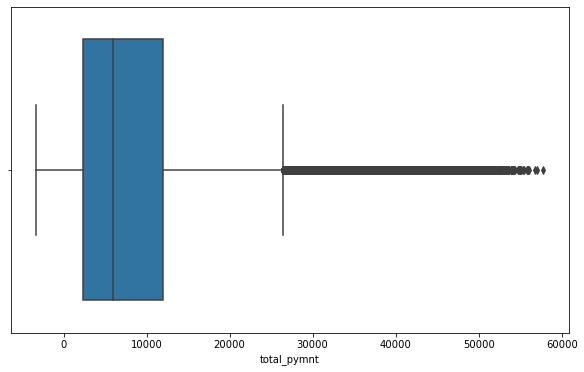

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='total_pymnt',data=df)

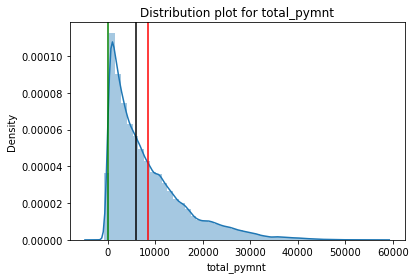

In [125]:
sns.distplot(df['total_pymnt'])
plt.axvline(df.total_pymnt.mean(),color='red')
plt.axvline(df.total_pymnt.median(),color='black')
plt.axvline(df.total_pymnt.mode()[0],color='green')
plt.title("Distribution plot for total_pymnt")
plt.xlabel("total_pymnt")
plt.ylabel("Density")
plt.show()

In [36]:
#replacing -ive values with 0
for i in range(0,len(df['total_pymnt'])):
  if df['total_pymnt'][i] < 0:
    df['total_pymnt'][i] = 0

In [37]:
df[df.total_pymnt < 0]

Empty DataFrame
Columns: [id, emp_length_int, home_ownership, income_category, annual_inc, loan_amount, term, application_type, purpose, interest_payments, loan_condition, interest_rate, grade, total_pymnt, total_rec_prncp, recoveries, installment, region, issue_date, issue_month, issue_year, final_date, final_month, final_year, dti_OT]
Index: []

In [42]:
print("skew:",df['total_pymnt'].skew())
print("kurtosis:",df['total_pymnt'].kurtosis())
print("mean:",df['total_pymnt'].mean())
print("median:",df['total_pymnt'].median())
print("mode:",df['total_pymnt'].mode())

skew: 1.5188843268624992
kurtosis: 2.473148573377178
mean: 8372.39868437755
median: 5937.03
mode: 0    0.0
Name: total_pymnt, dtype: float64


<AxesSubplot:xlabel='total_pymnt'>

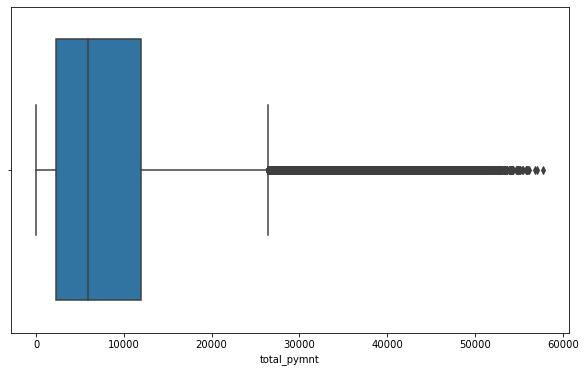

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='total_pymnt',data=df)

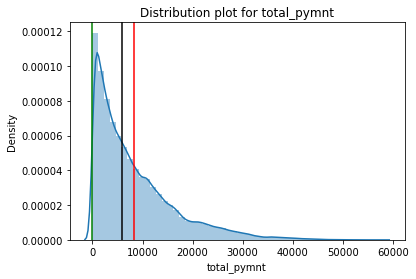

In [130]:
sns.distplot(df['total_pymnt'])
plt.axvline(df.total_pymnt.mean(),color='red')
plt.axvline(df.total_pymnt.median(),color='black')
plt.axvline(df.total_pymnt.mode()[0],color='green')
plt.title("Distribution plot for total_pymnt")
plt.xlabel("total_pymnt")
plt.ylabel("Density")
plt.show()

<AxesSubplot:>

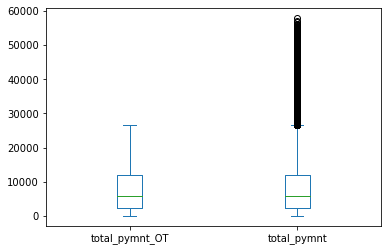

In [38]:
#treating outliers with capping
xbar=df['total_pymnt'].mean()
q1=df['total_pymnt'].quantile(0.25)
q3=df['total_pymnt'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['total_pymnt_OT']=df['total_pymnt'].apply(lambda x: ul if x > ul else ll if x < ll else x)
df[['total_pymnt_OT','total_pymnt']].plot(kind='box')

<AxesSubplot:xlabel='total_pymnt_OT'>

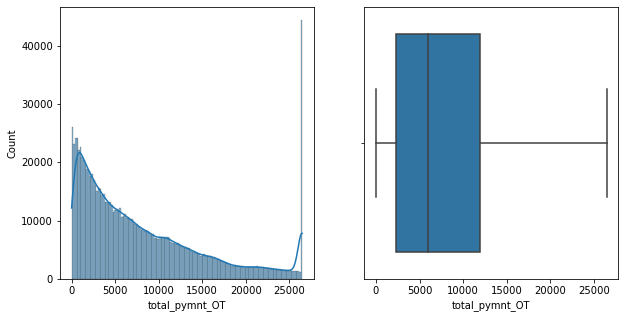

In [132]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.total_pymnt_OT, kde=True, ax=axs[0])
sns.boxplot(x='total_pymnt_OT',data=df, ax=axs[1])

In [44]:
print("skew:",df['total_pymnt_OT'].skew())
print("kurtosis:",df['total_pymnt_OT'].kurtosis())
print("mean:",df['total_pymnt_OT'].mean())
print("median:",df['total_pymnt_OT'].median())
print("mode:",df['total_pymnt_OT'].mode())

skew: 1.0587396615334004
kurtosis: 0.23919333425977607
mean: 8127.461893744238
median: 5937.03
mode: 0    26465.765087
Name: total_pymnt_OT, dtype: float64


In [134]:
# df['log_t_total_pymnt_OT'] = np.log(df['total_pymnt_OT'])
# print('non trans',df['total_pymnt_OT'].skew(),'transf',df['log_t_total_pymnt_OT'].skew())

In [135]:
# fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# sns.histplot(df.log_t_total_pymnt_OT, kde=True, ax=axs[0])
# sns.boxplot(x='log_t_total_pymnt_OT',data=df, ax=axs[1])

In [136]:
# df['total_pymnt_OT']=np.exp(df['log_t_total_pymnt_OT'])
# df['total_pymnt_OT'].skew()

In [39]:
df.drop(['total_pymnt'],axis=1,inplace=True)

In [138]:
#df.reset_index(drop=True, inplace=True)

In [139]:
df.head()

id  emp_length_int home_ownership income_category  annual_inc  \
0  1077501            10.0           RENT             Low       24000   
1  1077430             0.5           RENT             Low       30000   
2  1077175            10.0           RENT             Low       12252   
3  1076863            10.0           RENT             Low       49200   
4  1075358             1.0           RENT             Low       80000   

   loan_amount        term application_type         purpose interest_payments  \
0         5000   36 months       INDIVIDUAL     credit_card               Low   
1         2500   60 months       INDIVIDUAL             car              High   
2         2400   36 months       INDIVIDUAL  small_business              High   
3        10000   36 months       INDIVIDUAL           other              High   
4         3000   60 months       INDIVIDUAL           other               Low   

  loan_condition  interest_rate grade  total_rec_prncp  recoveries  \
0      Good Loan          10.65     B          5000.00        0.00   
1       Bad Loan          15.27     C           456.46      117.08   
2      Good Loan          15.96     C          2400.00        0.00   
3      Good Loan          13.49     C         10000.00        0.00   
4      Good Loan          12.69     B          2233.10        0.00   

   installment    region issue_date issue_month issue_year final_date  \
0       162.87   munster         12           1       2011          1   
1        59.83  leinster         12           1       2011          4   
2        84.33  cannught         12           1       2011          6   
3       339.31    ulster         12           1       2011          1   
4        67.79    ulster         12           1       2011          1   

  final_month final_year  dti_OT  total_pymnt_OT  
0           1       2015   27.65     5861.071414  
1           1       2013    1.00     1008.710000  
2           1       2014    8.72     3003.653644  
3           1       2015   20.00    12226.302210  
4           1       2016   17.94     3242.170000

In [40]:
df.shape

(1048575, 25)

COLUMN-'total_rec_prncp'

In [141]:
#checking bad data in 'total_rec_prncp' column
df[df.total_rec_prncp < 0]

id  emp_length_int home_ownership income_category  annual_inc  \
887425   234391        5.059300            OWN            High       62000   
887429   253425        5.168676       MORTGAGE             Low      200000   
887436   243957        4.918547           RENT             Low      160000   
887455   251663        1.434268       MORTGAGE          Medium       25000   
887456   258828        8.439236            OWN            High      117000   
...         ...             ...            ...             ...         ...   
1048501  242356        0.303685            OWN            High       45600   
1048510  250422        5.794955       MORTGAGE          Medium      122870   
1048511  243207       11.393498       MORTGAGE             Low       84456   
1048521  251598       11.386816           RENT          Medium       20400   
1048532  241117        8.859089           RENT             Low       78000   

         loan_amount        term application_type         purpose  \
887425          3575   36 months       INDIVIDUAL          moving   
887429         12375   36 months       INDIVIDUAL           house   
887436          5600   36 months       INDIVIDUAL          moving   
887455         11800   36 months       INDIVIDUAL  small_business   
887456          5275   36 months       INDIVIDUAL     educational   
...              ...         ...              ...             ...   
1048501        19500   36 months       INDIVIDUAL  major_purchase   
1048510         3500   36 months       INDIVIDUAL     educational   
1048511         2500   36 months       INDIVIDUAL           house   
1048521        14275   36 months       INDIVIDUAL         medical   
1048532         3975   36 months       INDIVIDUAL         medical   

        interest_payments loan_condition  interest_rate grade  \
887425               High       Bad Loan       9.462837     A   
887429               High      Good Loan      18.044663     F   
887436               High       Bad Loan      11.092419     E   
887455                Low       Bad Loan      21.919693     F   
887456               High      Good Loan      12.688220     E   
...                   ...            ...            ...   ...   
1048501               Low      Good Loan      17.493795     A   
1048510              High      Good Loan      17.056149     G   
1048511              High      Good Loan       7.884521     F   
1048521              High      Good Loan      10.712321     E   
1048532               Low       Bad Loan      20.259819     F   

         total_rec_prncp   recoveries  installment        region issue_date  \
887425      -3335.303974    61.984555   495.760152  Northern-Irl          2   
887429       -914.476568  5032.656841   180.890659      cannught          2   
887436       -563.080199    17.016109   220.590723        ulster          2   
887455      -3280.636042   324.366675   219.752061      leinster          2   
887456       -825.061390   287.464138   335.732540  Northern-Irl          2   
...                  ...          ...          ...           ...        ...   
1048501     -2999.888220   307.662897   305.751613      leinster          2   
1048510     -1045.750379  1871.762687   131.265222        ulster          2   
1048511      -580.536499   499.301621   147.146729  Northern-Irl          2   
1048521      -138.974922  3229.083947   495.450919        ulster          2   
1048532      -966.385026   559.787553   437.035743  Northern-Irl          2   

        issue_month issue_year final_date final_month final_year     dti_OT  \
887425            1       2008          1           1       2009  35.054490   
887429            1       2008          3           1       2013  10.769798   
887436            1       2008          2           1       2010  22.353162   
887455            1       2008          7           1       2010   3.024880   
887456            1       2008          4           1       2008   9.077108   
...             ...        ...        ...  

In [47]:
print('Skew:',df['total_rec_prncp'].skew())
print('kurtosis:',df['total_rec_prncp'].kurtosis())
print('mean :',df['total_rec_prncp'].mean())
print('median :',df['total_rec_prncp'].median())
print('mode :',df['total_rec_prncp'].mode())

Skew: 1.8016821341253295
kurtosis: 3.6920038575878102
mean : 5966.38792968921
median : 3729.75
mode : 0    0.0
Name: total_rec_prncp, dtype: float64


<AxesSubplot:xlabel='total_rec_prncp'>

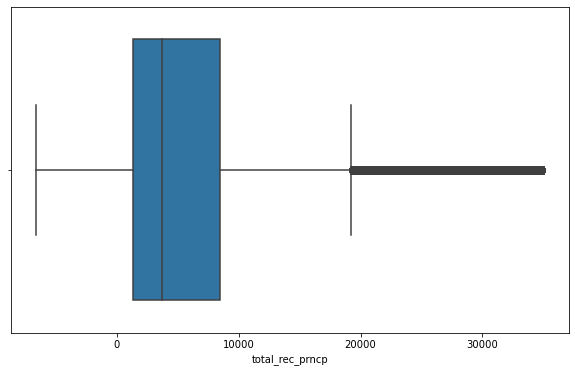

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x='total_rec_prncp',data=df)

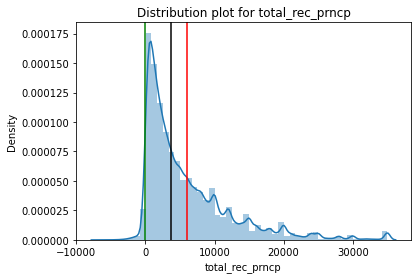

In [144]:
sns.distplot(df['total_rec_prncp'])
plt.axvline(df.total_rec_prncp.mean(),color='red')
plt.axvline(df.total_rec_prncp.median(),color='black')
plt.axvline(df.total_rec_prncp.mode()[0],color='green')
plt.title("Distribution plot for total_rec_prncp")
plt.xlabel("total_rec_prncp")
plt.ylabel("Density")
plt.show()

In [41]:
#replacing -ive values with 0
for i in range(0,len(df['total_rec_prncp'])):
  if df['total_rec_prncp'][i] < 0:
    df['total_rec_prncp'][i] = 0

In [42]:
df[df.total_rec_prncp < 0]

Empty DataFrame
Columns: [id, emp_length_int, home_ownership, income_category, annual_inc, loan_amount, term, application_type, purpose, interest_payments, loan_condition, interest_rate, grade, total_rec_prncp, recoveries, installment, region, issue_date, issue_month, issue_year, final_date, final_month, final_year, dti_OT, total_pymnt_OT]
Index: []

In [55]:
print(df['total_rec_prncp'].skew())
print(df['total_rec_prncp'].kurtosis())
print(df['total_rec_prncp'].mean())
print(df['total_rec_prncp'].median())
print(df['total_rec_prncp'].mode())

1.8124050869655413
3.71935920410968
5977.041992417905
3729.75
0    0.0
Name: total_rec_prncp, dtype: float64


<AxesSubplot:xlabel='total_rec_prncp'>

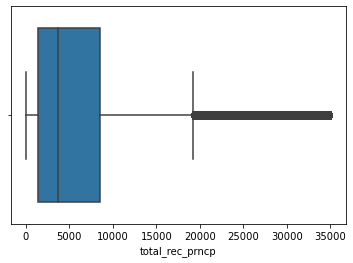

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x='total_rec_prncp',data=df)

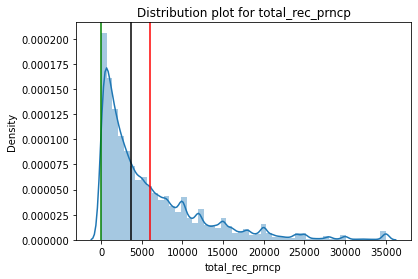

In [149]:
sns.distplot(df['total_rec_prncp'])
plt.axvline(df.total_rec_prncp.mean(),color='red')
plt.axvline(df.total_rec_prncp.median(),color='black')
plt.axvline(df.total_rec_prncp.mode()[0],color='green')
plt.title("Distribution plot for total_rec_prncp")
plt.xlabel("total_rec_prncp")
plt.ylabel("Density")
plt.show()

<AxesSubplot:>

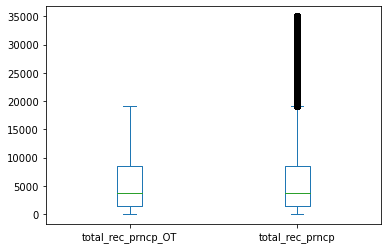

In [43]:
#treating outliers with capping
xbar=df['total_rec_prncp'].mean()
q1=df['total_rec_prncp'].quantile(0.25)
q3=df['total_rec_prncp'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['total_rec_prncp_OT']=df['total_rec_prncp'].apply(lambda x: ul if x > ul else ll if x < ll else x)
df[['total_rec_prncp_OT','total_rec_prncp']].plot(kind='box')

<AxesSubplot:xlabel='total_rec_prncp_OT'>

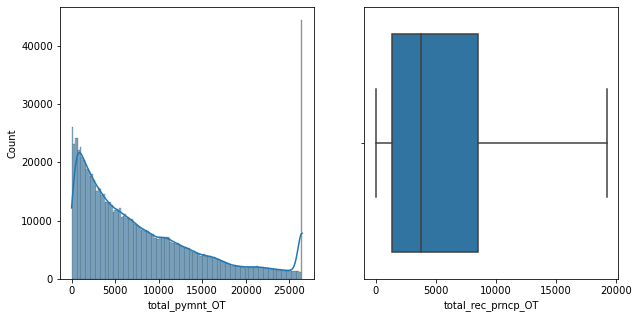

In [151]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.total_pymnt_OT, kde=True, ax=axs[0])
sns.boxplot(x='total_rec_prncp_OT',data=df, ax=axs[1])

In [51]:
print('skew :',df['total_rec_prncp_OT'].skew())
print('kurtosis :',df['total_rec_prncp_OT'].kurtosis())
print('mean :',df['total_rec_prncp_OT'].mean())
print('median :',df['total_rec_prncp_OT'].median())
print('mode :',df['total_rec_prncp_OT'].mode())

skew : 1.1225671677858347
kurtosis : 0.2720967472684821
mean : 5669.075313240759
median : 3729.75
mode : 0    19183.665
Name: total_rec_prncp_OT, dtype: float64


In [153]:
# df['log_t_total_rec_prncp_OT'] = np.log(df['total_rec_prncp_OT'])
# print('non trans',df['total_rec_prncp_OT'].skew(),'transf',df['log_t_total_rec_prncp_OT'].skew())

In [154]:
# fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# sns.histplot(df.log_t_total_rec_prncp_OT, kde=True, ax=axs[0])
# sns.boxplot(x='log_t_total_rec_prncp_OT',data=df, ax=axs[1])

In [155]:
# df['total_rec_prncp_OT']=np.exp(df['log_t_total_rec_prncp_OT'])
# df['total_rec_prncp_OT'].skew()

In [44]:
df.drop(['total_rec_prncp'],axis=1,inplace=True)

In [157]:
#df.reset_index(drop=True, inplace=True)

In [45]:
df.shape

(1048575, 25)

COLUMN-'recoveries'

In [159]:
#checking bad data in 'recoveries' column
df[df.recoveries < 0]

id  emp_length_int home_ownership income_category  annual_inc  \
887387   257242        2.318301           RENT            High       36000   
887388   252324        9.889060           RENT          Medium       24605   
887396   266282        1.508277           RENT            High       33600   
887402   199486        7.598515           RENT          Medium       39600   
887408   259080        4.307753           RENT          Medium       95000   
...         ...             ...            ...             ...         ...   
1048550  249840        8.805711           RENT          Medium        6000   
1048554  245733        5.655416            OWN            High       51600   
1048557  241536        2.039801           RENT            High       57400   
1048567  259968       10.245638       MORTGAGE            High       54000   
1048574  253020        1.350906           RENT             Low       69600   

         loan_amount        term application_type           purpose  \
887387          9600   36 months       INDIVIDUAL          vacation   
887388           600   36 months       INDIVIDUAL            moving   
887396         18900   36 months       INDIVIDUAL             house   
887402         15075   36 months       INDIVIDUAL               car   
887408          2050   36 months       INDIVIDUAL           wedding   
...              ...         ...              ...               ...   
1048550         2400   36 months       INDIVIDUAL             house   
1048554        12325   36 months       INDIVIDUAL            moving   
1048557        10075   36 months       INDIVIDUAL           medical   
1048567         2600   36 months       INDIVIDUAL  home_improvement   
1048574        10500   36 months       INDIVIDUAL            moving   

        interest_payments loan_condition  interest_rate grade  recoveries  \
887387                Low       Bad Loan      11.500131     G   -8.981171   
887388               High       Bad Loan      12.796430     C  -76.850104   
887396                Low       Bad Loan      11.164776     F  -10.221025   
887402                Low      Good Loan      13.275318     B  -19.232821   
887408               High      Good Loan      14.150026     A  -41.574409   
...                   ...            ...            ...   ...         ...   
1048550               Low      Good Loan      12.948486     E   -0.695916   
1048554               Low      Good Loan      13.507503     G   -4.704557   
1048557               Low       Bad Loan      12.854884     D  -27.558534   
1048567              High       Bad Loan      14.089236     B  -22.229469   
1048574               Low      Good Loan      10.286433     B   -9.777625   

         installment        region issue_date issue_month issue_year  \
887387    160.696377        ulster          2           1       2008   
887388    202.360752  Northern-Irl          2           1       2008   
887396    356.466100  Northern-Irl          2           1       2008   
887402    650.555995      cannught          2           1       2008   
887408    307.309390      cannught          2           1       2008   
...              ...           ...        ...         ...        ...   
1048550   325.474322       munster          2           1       2008   
1048554   195.884413      leinster          2           1       2008   
1048557   605.337195        ulster          2           1       2008   
1048567   512.781274  Northern-Irl          2           1       2008   
1048574   191.140403      cannught          2           1       2008   

        final_date final_month final_year     dti_OT  total_pymnt_OT  \
887387           2           1       2009  12.242385    26464.492610   
887388           8           1       2010   2.026678    17503.797620   
887396          11           1       2010  23.551235     5038.529196   
887402           3           1       2009  27.227963    12904.869570   
887408           4           1       2009  18.269124    10304.723440   
.

In [160]:
print(df['recoveries'].skew())
print(df['recoveries'].kurtosis())
print(df['recoveries'].mean())
print(df['recoveries'].median())
print(df['recoveries'].mode())

5.649744850715532
56.78058118734681
207.32394059538328
0.0
0    0.0
Name: recoveries, dtype: float64


<AxesSubplot:xlabel='recoveries'>

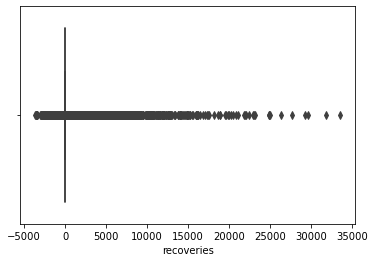

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(x='recoveries',data=df)

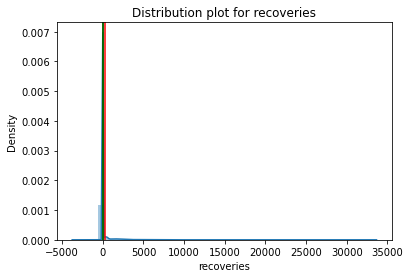

In [162]:
sns.distplot(df['recoveries'])
plt.axvline(df.recoveries.mean(),color='red')
plt.axvline(df.recoveries.median(),color='black')
plt.axvline(df.recoveries.mode()[0],color='green')
plt.title("Distribution plot for recoveries")
plt.xlabel("recoveries")
plt.ylabel("Density")
plt.show()

In [39]:
#replacing -ive values with 0
for i in range(0,len(df['recoveries'])):
  if df['recoveries'][i] < 0:
    df['recoveries'][i] = 0

In [67]:
 df[df.recoveries < 0]

Empty DataFrame
Columns: [id, emp_length_int, home_ownership, income_category, annual_inc, loan_amount, term, application_type, purpose, interest_payments, loan_condition, interest_rate, grade, recoveries, installment, region, issue_date, issue_month, issue_year, final_date, final_month, final_year, dti_OT, total_pymnt_OT, total_rec_prncp_OT]
Index: []

In [165]:
df.shape

(1048575, 25)

In [166]:
print(df['recoveries'].skew())
print(df['recoveries'].kurtosis())
print(df['recoveries'].mean())
print(df['recoveries'].median())
print(df['recoveries'].mode())

5.697193907497021
57.310812251803256
209.4425929760036
0.0
0    0.0
Name: recoveries, dtype: float64


<AxesSubplot:xlabel='recoveries'>

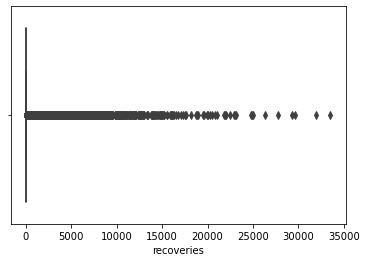

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(x='recoveries',data=df)

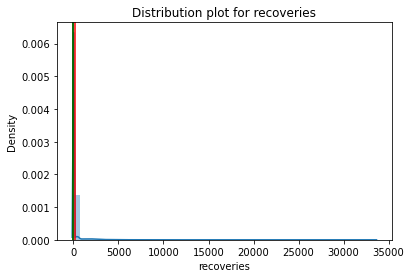

In [168]:
sns.distplot(df['recoveries'])
plt.axvline(df.recoveries.mean(),color='red')
plt.axvline(df.recoveries.median(),color='black')
plt.axvline(df.recoveries.mode()[0],color='green')
plt.title("Distribution plot for recoveries")
plt.xlabel("recoveries")
plt.ylabel("Density")
plt.show()

<AxesSubplot:>

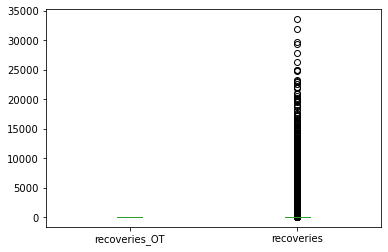

In [40]:
#treating outliers with capping
xbar=df['recoveries'].mean()
q1=df['recoveries'].quantile(0.25)
q3=df['recoveries'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['recoveries_OT']=df['recoveries'].apply(lambda x: ul if x > ul else ll if x < ll else x)
df[['recoveries_OT','recoveries']].plot(kind='box')
#print(ll,ul)

In [170]:
#As there is not much change after cleaning 'recoveries' column,we can drop this column.

In [46]:
df.drop('recoveries',axis=1,inplace=True)

In [47]:
df.drop('recoveries_OT',axis=1,inplace=True)

In [61]:
df.shape

(1048575, 24)

COLUMN-'installment'

In [172]:
#checking bad data in 'installment' column
df[df.installment < 0]

id  emp_length_int home_ownership income_category  annual_inc  \
887472   249942        1.591672            OWN            High      200600   
887510   243737        5.569975       MORTGAGE            High       17573   
887643   243999        2.625533            OWN          Medium       25000   
887646   246516       11.650736            OWN          Medium       38000   
887677   254310        3.392176           RENT            High       28500   
...         ...             ...            ...             ...         ...   
1048332  225253        7.847975       MORTGAGE          Medium      120000   
1048382  248539       10.074010           RENT          Medium      200000   
1048411  257223        1.118301       MORTGAGE            High       47376   
1048517  247983       11.132004            OWN             Low       69000   
1048535  242621        6.270468           RENT             Low       49853   

         loan_amount        term application_type             purpose  \
887472          3600   36 months       INDIVIDUAL      small_business   
887510          7600   36 months       INDIVIDUAL         educational   
887643          7600   36 months       INDIVIDUAL      small_business   
887646         16600   36 months       INDIVIDUAL      small_business   
887677         17350   36 months       INDIVIDUAL         educational   
...              ...         ...              ...                 ...   
1048332         5100   36 months       INDIVIDUAL             medical   
1048382         3500   36 months       INDIVIDUAL  debt_consolidation   
1048411         2925   36 months       INDIVIDUAL               other   
1048517         9500   36 months       INDIVIDUAL               other   
1048535        24500   36 months       INDIVIDUAL             wedding   

        interest_payments loan_condition  interest_rate grade  installment  \
887472                Low       Bad Loan      11.678499     A   -69.108213   
887510                Low       Bad Loan      18.776668     C   -74.863980   
887643               High      Good Loan       9.909792     D   -36.944161   
887646               High      Good Loan      10.641943     A  -105.842657   
887677                Low      Good Loan      11.648002     D   -29.465204   
...                   ...            ...            ...   ...          ...   
1048332               Low      Good Loan      11.530722     A    -3.653983   
1048382               Low       Bad Loan      12.605077     E   -32.413123   
1048411              High      Good Loan      16.545994     A   -40.314322   
1048517              High      Good Loan      16.920365     A   -47.204884   
1048535               Low       Bad Loan      17.274329     E    -2.648158   

               region issue_date issue_month issue_year final_date  \
887472   Northern-Irl          2           1       2008          4   
887510   Northern-Irl          2           1       2008          6   
887643       cannught          2           1       2008          8   
887646   Northern-Irl          2           1       2008          1   
887677   Northern-Irl          2           1       2008          8   
...               ...        ...         ...        ...        ...   
1048332  Northern-Irl          2           1       2008          1   
1048382  Northern-Irl          2           1       2008         11   
1048411      leinster          2           1       2008          8   
1048517      cannught          2           1       2008          1   
1048535        ulster          2           1       2008          7   

        final_month final_year     dti_OT  total_pymnt_OT  total_rec_prncp_OT  
887472            1       2010   7.695109     8294.058491         5326.802950  
887510            1       2011  14.100994    10611.583360         3269.052885  
887643            1       2008  14.872486     8021.053313         3507.702919  
887646            1       2016  15.243774    14732.068700        18660.058900  
887677            1  

In [54]:
print('skew:',df['installment'].skew())
print('kurtosis :',df['installment'].kurtosis())
print('mean :',df['installment'].mean())
print('median :',df['installment'].median())
print('mode :',df['installment'].mode())

skew: 0.9033745146655722
kurtosis : 0.7311669432810457
mean : 428.0635826950444
median : 378.95
mode : 0    327.34
Name: installment, dtype: float64


<AxesSubplot:xlabel='installment'>

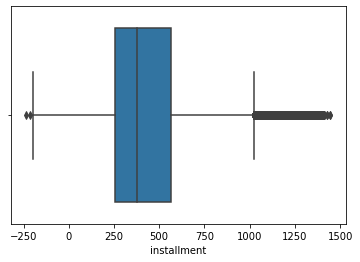

In [70]:
plt.figure(figsize=(6,4))
sns.boxplot(x='installment',data=df)

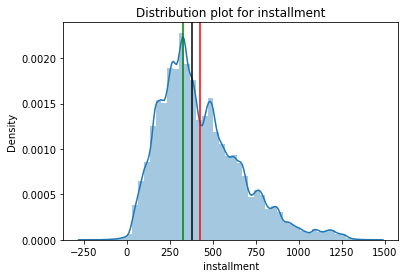

In [175]:
sns.distplot(df['installment'])
plt.axvline(df.installment.mean(),color='red')
plt.axvline(df.installment.median(),color='black')
plt.axvline(df.installment.mode()[0],color='green')
plt.title("Distribution plot for installment")
plt.xlabel("installment")
plt.ylabel("Density")
plt.show()

In [47]:
#Replacing -ive values with 0
for i in range(0,len(df['installment'])):
  if df['installment'][i] < 0:
    df['installment'][i] = 0

In [48]:
df.shape

(1048575, 24)

In [49]:
df[df.installment < 0]

Empty DataFrame
Columns: [id, emp_length_int, home_ownership, income_category, annual_inc, loan_amount, term, application_type, purpose, interest_payments, loan_condition, interest_rate, grade, installment, region, issue_date, issue_month, issue_year, final_date, final_month, final_year, dti_OT, total_pymnt_OT, total_rec_prncp_OT]
Index: []

In [58]:
print(df['installment'].skew())
print(df['installment'].kurtosis())
print(df['installment'].mean())
print(df['installment'].median())
print(df['installment'].mode())

0.9074627304660073
0.7297447087672091
428.1342185464001
378.95
0    327.34
Name: installment, dtype: float64


<AxesSubplot:xlabel='installment'>

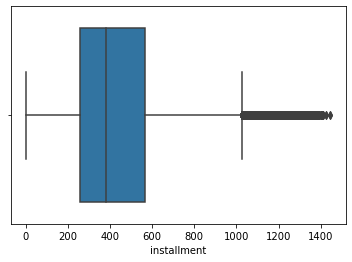

In [74]:
plt.figure(figsize=(6,4))
sns.boxplot(x='installment',data=df)

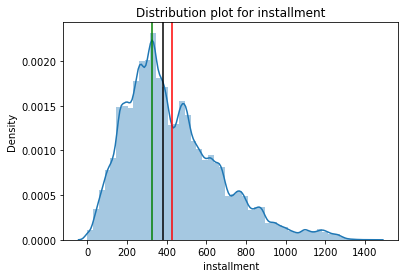

In [181]:
sns.distplot(df['installment'])
plt.axvline(df.installment.mean(),color='red')
plt.axvline(df.installment.median(),color='black')
plt.axvline(df.installment.mode()[0],color='green')
plt.title("Distribution plot for installment")
plt.xlabel("installment")
plt.ylabel("Density")
plt.show()

<AxesSubplot:>

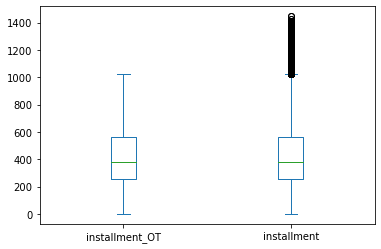

In [50]:
#treating outliers with capping
xbar=df['installment'].mean()
q1=df['installment'].quantile(0.25)
q3=df['installment'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['installment_OT']=df['installment'].apply(lambda x: ul if x > ul else ll if x < ll else x)
df[['installment_OT','installment']].plot(kind='box')

<AxesSubplot:xlabel='installment_OT'>

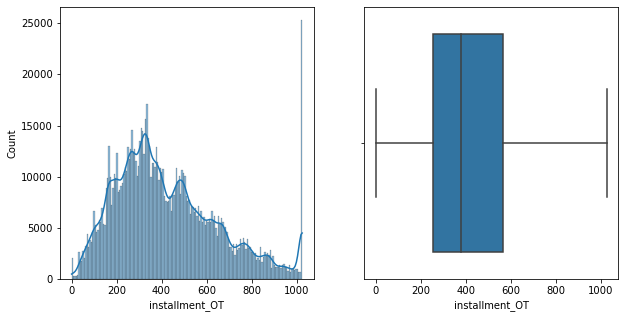

In [183]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.installment_OT, kde=True, ax=axs[0])
sns.boxplot(x='installment_OT',data=df, ax=axs[1])

In [60]:
print('skew :',df['installment_OT'].skew())
print('kurtosis :',df['installment_OT'].kurtosis())
print('mean :',df['installment_OT'].mean())
print('median :',df['installment_OT'].median())
print('mode :',df['installment_OT'].mode())

skew : 0.705790764658175
kurtosis : -0.038122335889406944
mean : 425.1339765941532
median : 378.95
mode : 0    1025.2
Name: installment_OT, dtype: float64


In [185]:
# df['log_t_installment_OT'] = np.log(df['installment_OT'])
# print('non trans',df['installment_OT'].skew(),'transf',df['log_t_installment_OT'].skew())

In [186]:
# fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# sns.histplot(df.log_t_installment_OT, kde=True, ax=axs[0])
# sns.boxplot(x='log_t_installment_OT',data=df, ax=axs[1])

In [187]:
# df['installment_OT']=np.exp(df['log_t_installment_OT'])
# df['installment_OT'].skew()

In [188]:
# df['trans_installment_OT']=(df['installment_OT'])**2
# df['trans_installment_OT'].skew()

In [189]:
#df.drop('trans_installment_OT',axis=1,inplace=True)

In [190]:
#df.reset_index(drop=True,inplace=True)

In [191]:
# fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# sns.histplot(df.trans_installment_OT, kde=True, ax=axs[0])
# sns.boxplot(x='trans_installment_OT',data=df, ax=axs[1])

In [51]:
df.drop(['installment'],axis=1,inplace=True)

In [193]:
df.head()

id  emp_length_int home_ownership income_category  annual_inc  \
0  1077501            10.0           RENT             Low       24000   
1  1077430             0.5           RENT             Low       30000   
2  1077175            10.0           RENT             Low       12252   
3  1076863            10.0           RENT             Low       49200   
4  1075358             1.0           RENT             Low       80000   

   loan_amount        term application_type         purpose interest_payments  \
0         5000   36 months       INDIVIDUAL     credit_card               Low   
1         2500   60 months       INDIVIDUAL             car              High   
2         2400   36 months       INDIVIDUAL  small_business              High   
3        10000   36 months       INDIVIDUAL           other              High   
4         3000   60 months       INDIVIDUAL           other               Low   

  loan_condition  interest_rate grade    region issue_date issue_month  \
0      Good Loan          10.65     B   munster         12           1   
1       Bad Loan          15.27     C  leinster         12           1   
2      Good Loan          15.96     C  cannught         12           1   
3      Good Loan          13.49     C    ulster         12           1   
4      Good Loan          12.69     B    ulster         12           1   

  issue_year final_date final_month final_year  dti_OT  total_pymnt_OT  \
0       2011          1           1       2015   27.65     5861.071414   
1       2011          4           1       2013    1.00     1008.710000   
2       2011          6           1       2014    8.72     3003.653644   
3       2011          1           1       2015   20.00    12226.302210   
4       2011          1           1       2016   17.94     3242.170000   

   total_rec_prncp_OT  installment_OT  
0             5000.00          162.87  
1              456.46           59.83  
2             2400.00           84.33  
3            10000.00          339.31  
4             2233.10           67.79

COLUMN-'annual_inc'

In [62]:
print('skew :',df['annual_inc'].skew())
print('kurtosis :',df['annual_inc'].kurtosis())
print('mean :',df['annual_inc'].mean())
print('median :',df['annual_inc'].median())
print('mode :',df['annual_inc'].mode())

skew : 41.872097253124
kurtosis : 4663.987218999307
mean : 73559.17938726366
median : 62282.0
mode : 0    60000
Name: annual_inc, dtype: int64


<AxesSubplot:xlabel='annual_inc'>

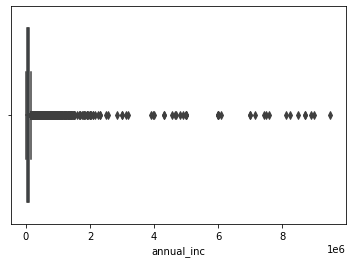

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(x='annual_inc',data=df)

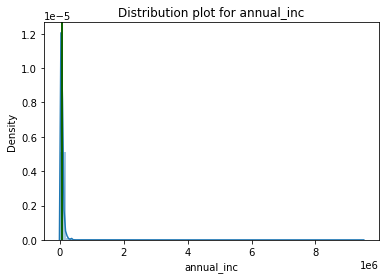

In [196]:
sns.distplot(df['annual_inc'])
plt.axvline(df.annual_inc.mean(),color='red')
plt.axvline(df.annual_inc.median(),color='black')
plt.axvline(df.annual_inc.mode()[0],color='green')
plt.title("Distribution plot for annual_inc")
plt.xlabel("annual_inc")
plt.ylabel("Density")
plt.show()

<AxesSubplot:>

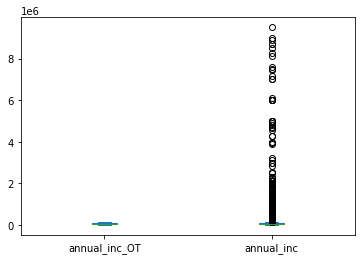

In [52]:
# treating outliers in 'annual_inc' using capping
xbar=df['annual_inc'].mean()
q1=df['annual_inc'].quantile(0.25)
q3=df['annual_inc'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['annual_inc_OT']=df['annual_inc'].apply(lambda x: ul if x > ul else ll if x < ll else x)
df[['annual_inc_OT','annual_inc']].plot(kind='box')

<AxesSubplot:xlabel='annual_inc_OT'>

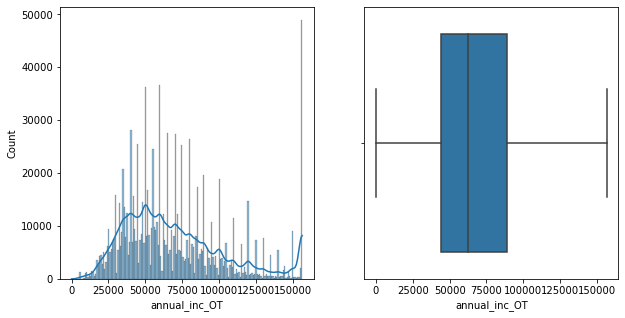

In [198]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.annual_inc_OT, kde=True, ax=axs[0])
sns.boxplot(x='annual_inc_OT',data=df, ax=axs[1])

In [64]:
print('skew:',df['annual_inc_OT'].skew())
print('kurtosis:',df['annual_inc_OT'].kurtosis())
print('mean:',df['annual_inc_OT'].mean())
print('median:',df['annual_inc_OT'].median())
print('mode:',df['annual_inc_OT'].mode())

skew: 0.8666299263277218
kurtosis: 0.14003101971911391
mean: 70110.16678730659
median: 62282.0
mode: 0    156500.0
Name: annual_inc_OT, dtype: float64


In [200]:
# df['log_t_annual_inc_OT'] = np.log(df['annual_inc_OT'])
# print('non trans',df['annual_inc_OT'].skew(),'transf',df['log_t_annual_inc_OT'].skew())

In [201]:
# df.drop('log_t_annual_inc_OT',axis=1,inplace=True)


In [53]:
df.drop('annual_inc',axis=1,inplace=True)

COLUMN-'interest_rate'

In [76]:
print('skew :',df['interest_rate'].skew())
print('kurtosis :',df['interest_rate'].kurtosis())
print('mean :',df['interest_rate'].mean())
print('median :',df['interest_rate'].median())
print('mode :',df['interest_rate'].mode())

skew : 0.41872144840956455
kurtosis : -0.08580957303570447
mean : 13.311306051234958
median : 12.99
mode : 0    10.99
Name: interest_rate, dtype: float64


<AxesSubplot:xlabel='interest_rate'>

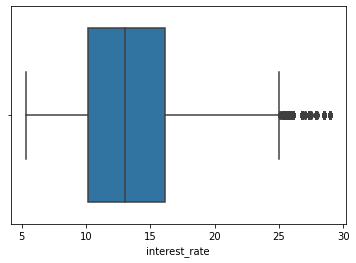

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(x='interest_rate',data=df)

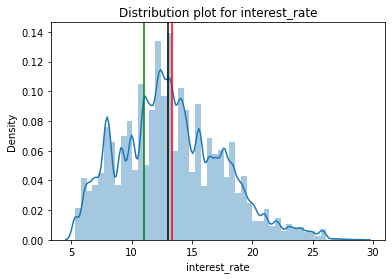

In [205]:
sns.distplot(df['interest_rate'])
plt.axvline(df.interest_rate.mean(),color='red')
plt.axvline(df.interest_rate.median(),color='black')
plt.axvline(df.interest_rate.mode()[0],color='green')
plt.title("Distribution plot for interest_rate")
plt.xlabel("interest_rate")
plt.ylabel("Density")
plt.show()

<AxesSubplot:>

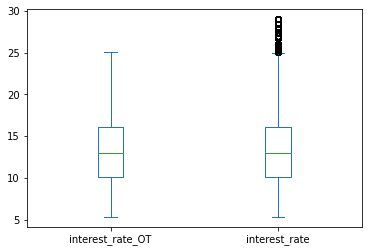

In [54]:
# treating outliers in 'interest_rate' using capping
xbar=df['interest_rate'].mean()
q1=df['interest_rate'].quantile(0.25)
q3=df['interest_rate'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df['interest_rate_OT']=df['interest_rate'].apply(lambda x: ul if x > ul else ll if x < ll else x)
df[['interest_rate_OT','interest_rate']].plot(kind='box')

<AxesSubplot:xlabel='interest_rate_OT'>

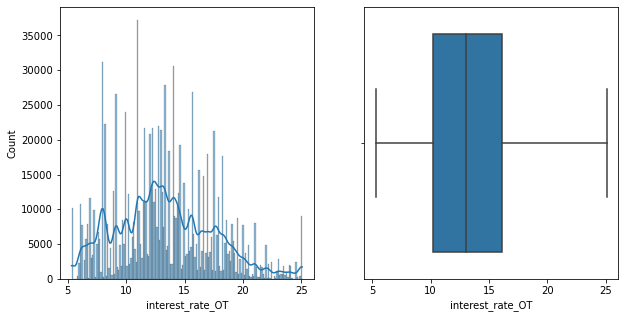

In [207]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.interest_rate_OT, kde=True, ax=axs[0])
sns.boxplot(x='interest_rate_OT',data=df, ax=axs[1])

In [67]:
print('skew :',df['interest_rate_OT'].skew())
print('kurtosis :',df['interest_rate_OT'].kurtosis())
print('mean :',df['interest_rate_OT'].mean())
print('median :',df['interest_rate_OT'].median())
print('mode :',df['interest_rate_OT'].mode())

skew : 0.3871013886714814
kurtosis : -0.1984122923494156
mean : 13.304747890448231
median : 12.99
mode : 0    10.99
Name: interest_rate_OT, dtype: float64


In [55]:
df.drop('interest_rate',axis=1,inplace=True)

In [69]:
df.shape

(1048575, 24)

<AxesSubplot:>

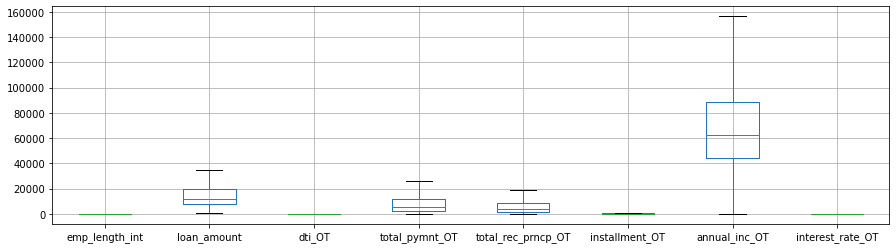

In [56]:
plt.figure(figsize=(15,4))
df.boxplot()
#plt.xticks(rotation=90)

All outliers are treated.

# Univariate analysis after data processing

In [57]:
num_cols=df.select_dtypes(include=[np.number])

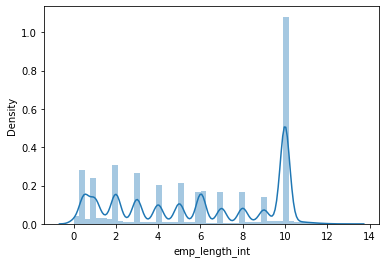

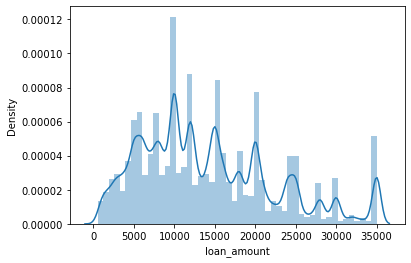

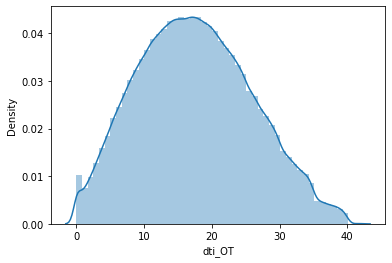

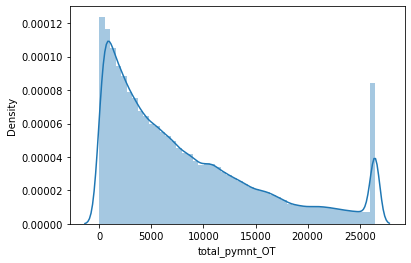

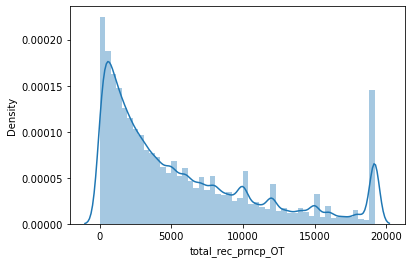

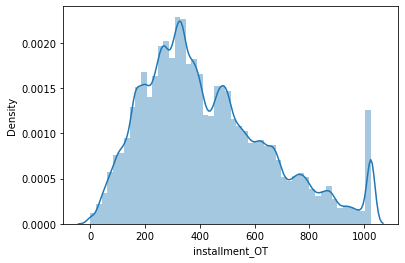

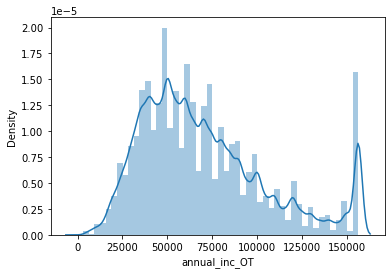

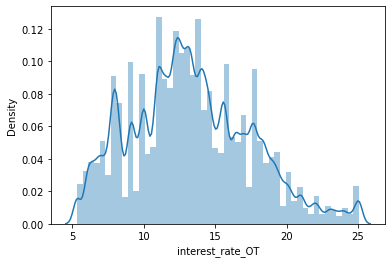

In [89]:
## Histogram and Density plots for all numerical data:
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

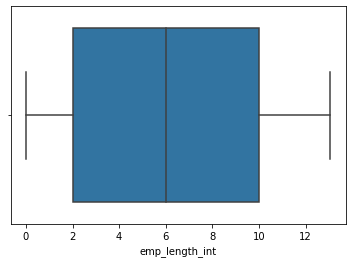

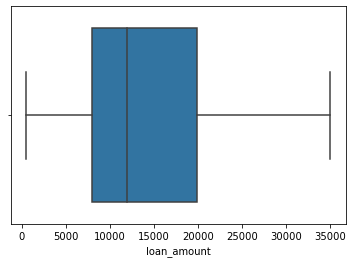

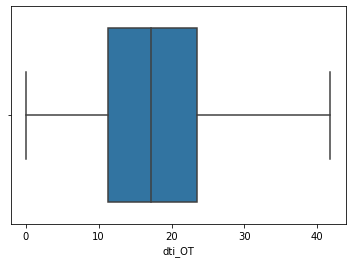

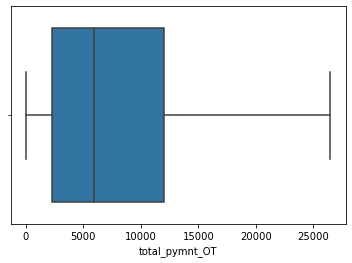

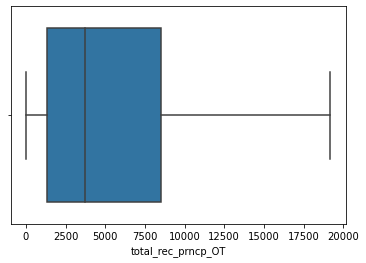

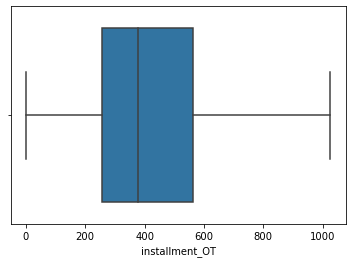

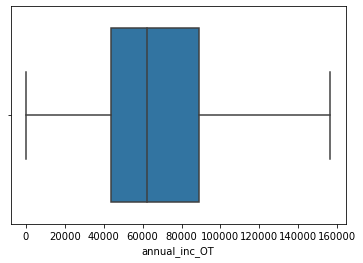

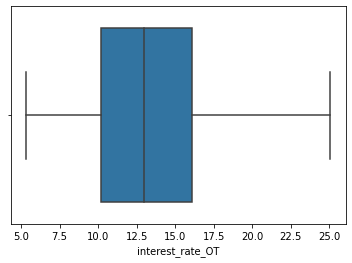

In [214]:
## Histogram and Density plots for all numerical data:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

# Multivariate analysis of numerical variables

In [58]:
df.corr()

emp_length_int  loan_amount    dti_OT  total_pymnt_OT  \
emp_length_int            1.000000     0.114743  0.062049        0.002468   
loan_amount               0.114743     1.000000  0.069525        0.328516   
dti_OT                    0.062049     0.069525  1.000000       -0.118042   
total_pymnt_OT            0.002468     0.328516 -0.118042        1.000000   
total_rec_prncp_OT        0.014725     0.283910 -0.119268        0.837259   
installment_OT            0.085087     0.848179  0.042090        0.396854   
annual_inc_OT             0.097612     0.447969 -0.170025        0.170399   
interest_rate_OT          0.000191     0.121343  0.131316        0.148058   

                    total_rec_prncp_OT  installment_OT  annual_inc_OT  \
emp_length_int                0.014725        0.085087       0.097612   
loan_amount                   0.283910        0.848179       0.447969   
dti_OT                       -0.119268        0.042090      -0.170025   
total_pymnt_OT                0.837259        0.396854       0.170399   
total_rec_prncp_OT            1.000000        0.358574       0.168159   
installment_OT                0.358574        1.000000       0.422469   
annual_inc_OT                 0.168159        0.422469       1.000000   
interest_rate_OT              0.036501        0.113306      -0.100584   

                    interest_rate_OT  
emp_length_int              0.000191  
loan_amount                 0.121343  
dti_OT                      0.131316  
total_pymnt_OT              0.148058  
total_rec_prncp_OT          0.036501  
installment_OT              0.113306  
annual_inc_OT              -0.100584  
interest_rate_OT            1.000000

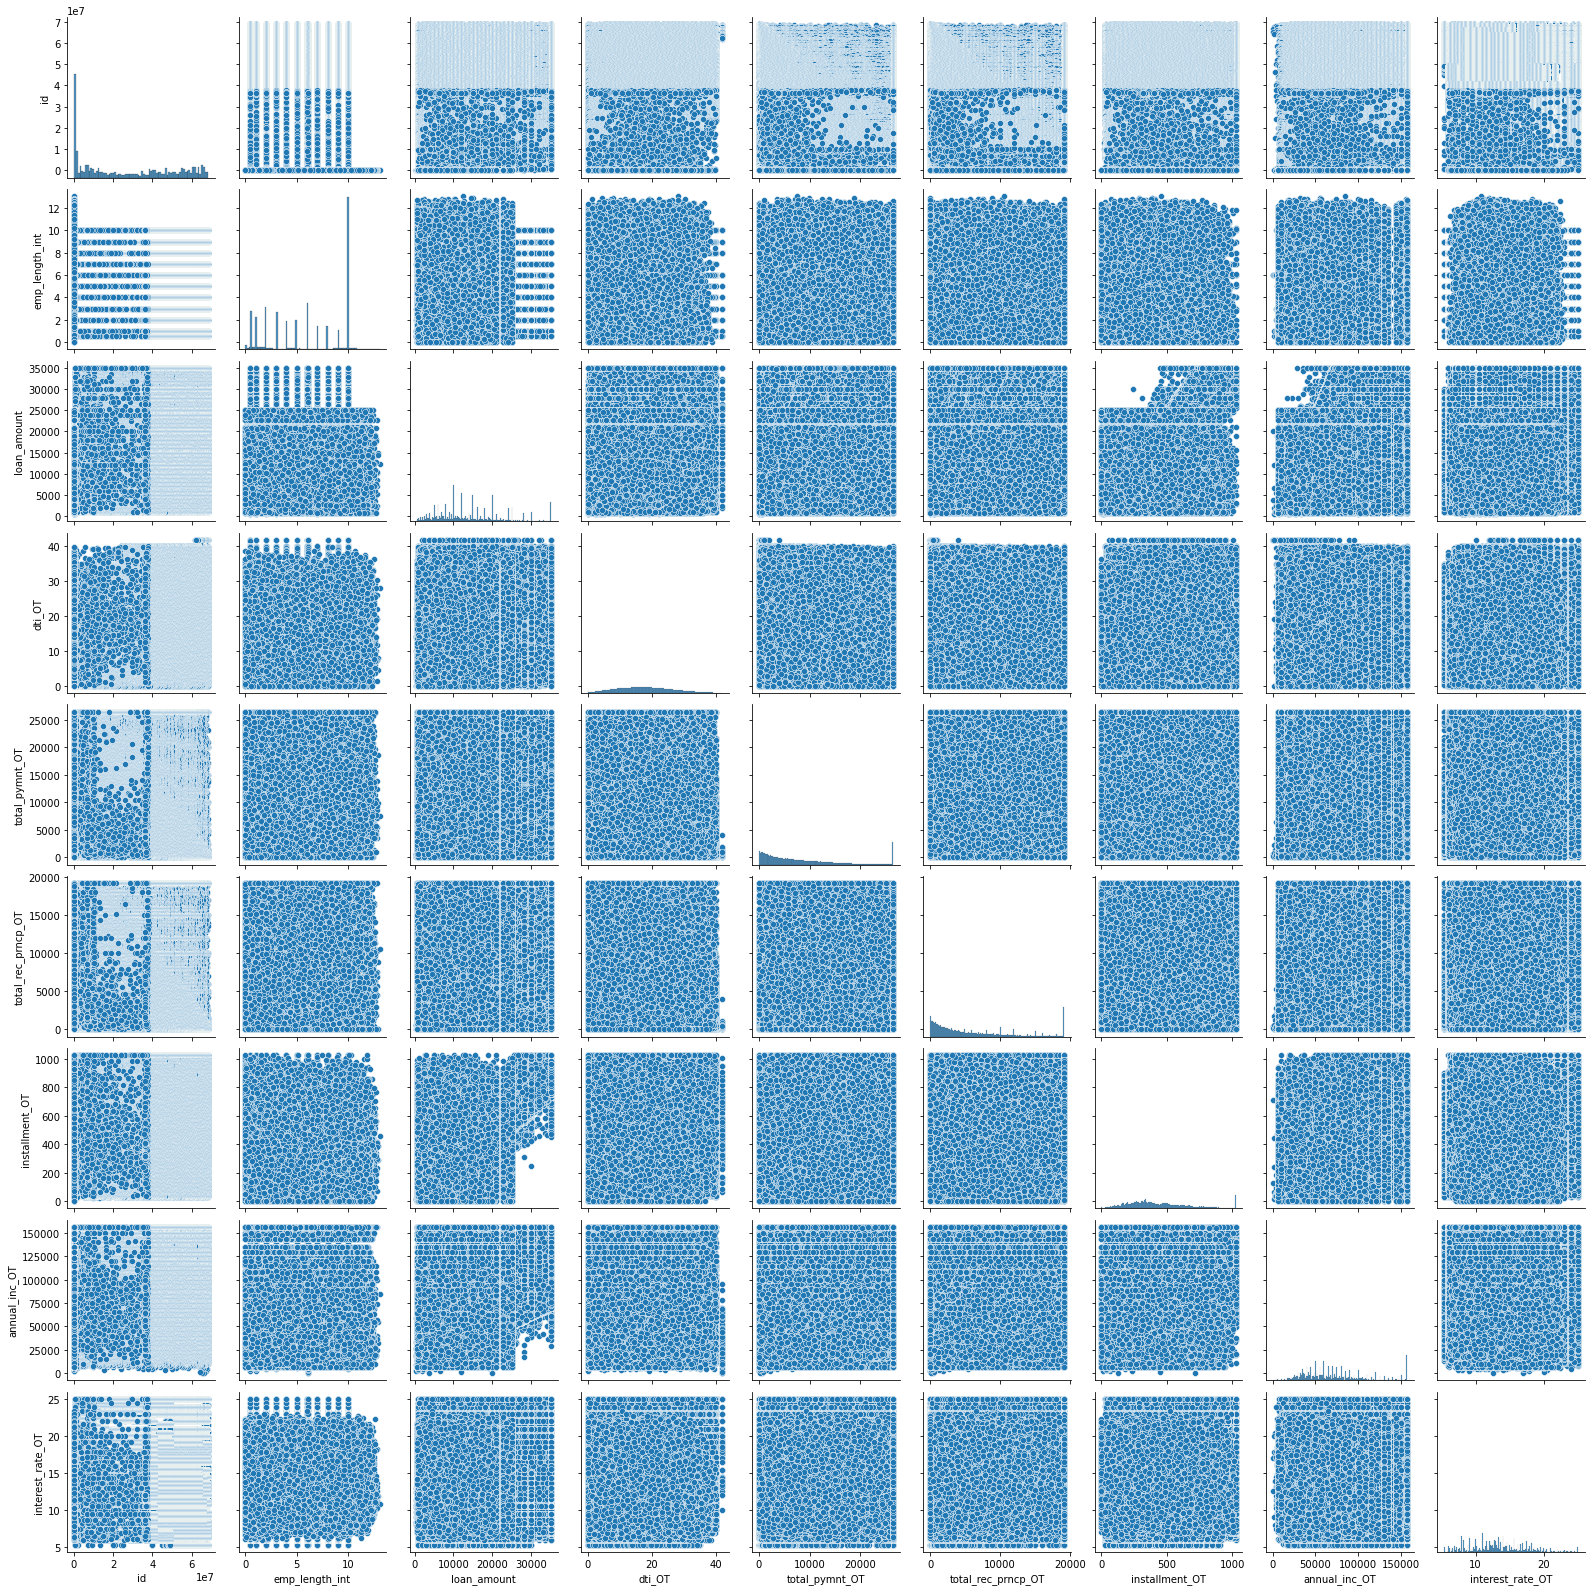

In [216]:
sns.pairplot(df)

<AxesSubplot:>

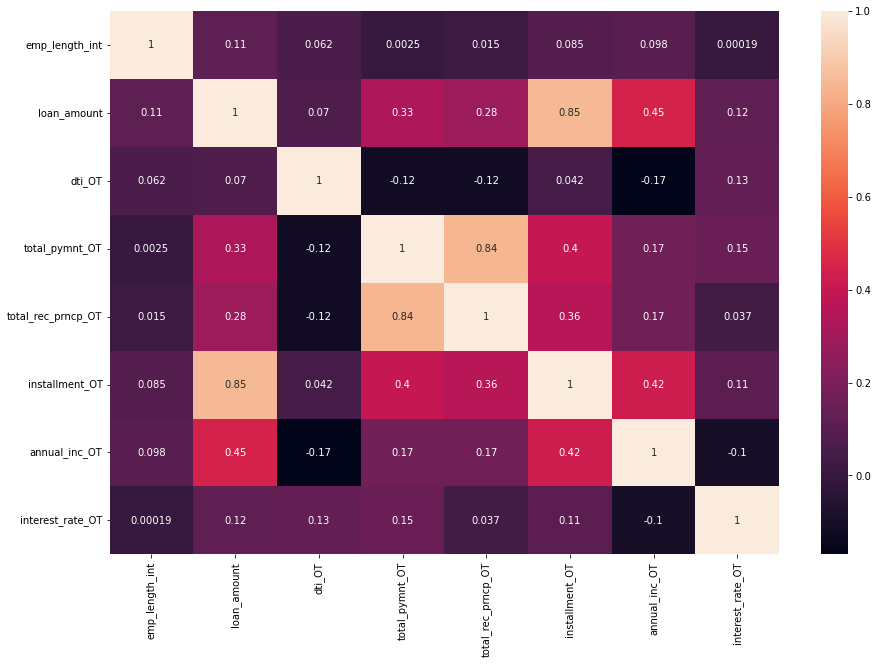

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Processing of categorical variables

In [59]:
df.describe(exclude=np.number).T

count  unique                 top     freq
id                 1048575  887379              260368      797
home_ownership     1048575       6            MORTGAGE   490272
income_category    1048575       3                 Low   785267
term               1048575       2           36 months   782321
application_type   1048575       2          INDIVIDUAL  1048064
purpose            1048575      14  debt_consolidation   538298
interest_payments  1048575       2                 Low   542515
loan_condition     1048575       2           Good Loan   906048
grade              1048575       7                   B   276838
region             1048575       5            leinster   247938
issue_date         1048575      12                   2   212944
issue_month        1048575       1                   1  1048575
issue_year         1048575       9                2015   421094
final_date         1048575      12                   1   518500
final_month        1048575       1                   1  1048575
final_year         1048575      10                2016   491650

In [219]:
#Out of 1048575,only 887379 are unique ids,that means there are some customers that are having more than 1 loan in their ids.
# issue-month of loan and final-month of loan completion is 1,i.e.,January.so,we can remove these columns.

# Univariate Analysis & Bivariate Analysis

In [220]:
#home_ownership variable
df['home_ownership'].value_counts()

MORTGAGE    490272
RENT        418277
OWN         139791
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [221]:
#As categories like "OTHER","NONE" and "ANY" contains very few counts,we can replace them with highest count category("MORTGAGE")

In [58]:
df.home_ownership.replace(to_replace="ANY", value="MORTGAGE", inplace=True)

In [59]:
df.home_ownership.replace(to_replace="OTHER", value="MORTGAGE", inplace=True)

In [60]:
df.home_ownership.replace(to_replace="NONE", value="MORTGAGE", inplace=True)

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    490507
RENT        418277
OWN         139791
Name: home_ownership, dtype: int64

In [226]:
df.groupby(['home_ownership','loan_condition'])['loan_condition'].count()

home_ownership  loan_condition
MORTGAGE        Bad Loan           51458
                Good Loan         439049
OWN             Bad Loan           30776
                Good Loan         109015
RENT            Bad Loan           60293
                Good Loan         357984
Name: loan_condition, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

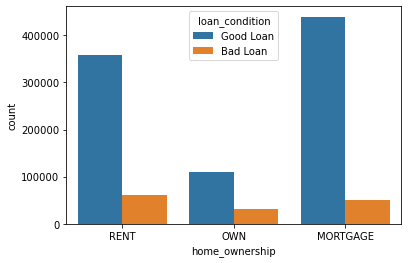

In [227]:
#plt.figure(figsize=(10,10))
sns.countplot(x='home_ownership',data=df, hue='loan_condition')

In [62]:
#encoding 'home_ownership'label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['home_ownership_cat']=le.fit_transform(df.home_ownership)

In [229]:
df.head(20)

id  emp_length_int home_ownership income_category  loan_amount  \
0   1077501            10.0           RENT             Low         5000   
1   1077430             0.5           RENT             Low         2500   
2   1077175            10.0           RENT             Low         2400   
3   1076863            10.0           RENT             Low        10000   
4   1075358             1.0           RENT             Low         3000   
5   1075269             3.0           RENT             Low         5000   
6   1069639             8.0           RENT             Low         7000   
7   1072053             9.0           RENT             Low         3000   
8   1071795             4.0            OWN             Low         5600   
9   1071570             0.5           RENT             Low         5375   
10  1070078             5.0            OWN             Low         6500   
11  1069908            10.0            OWN             Low        12000   
12  1064687             0.5           RENT             Low         9000   
13  1069866             3.0           RENT             Low         3000   
14  1069057             3.0           RENT             Low        10000   
15  1069759             0.5           RENT             Low         1000   
16  1065775             4.0           RENT             Low        10000   
17  1069971            10.0       MORTGAGE          Medium         3600   
18  1062474             1.0       MORTGAGE             Low         6000   
19  1069742             6.0           RENT             Low         9200   

          term application_type             purpose interest_payments  \
0    36 months       INDIVIDUAL         credit_card               Low   
1    60 months       INDIVIDUAL                 car              High   
2    36 months       INDIVIDUAL      small_business              High   
3    36 months       INDIVIDUAL               other              High   
4    60 months       INDIVIDUAL               other               Low   
5    36 months       INDIVIDUAL             wedding               Low   
6    60 months       INDIVIDUAL  debt_consolidation              High   
7    36 months       INDIVIDUAL                 car              High   
8    60 months       INDIVIDUAL      small_business              High   
9    60 months       INDIVIDUAL               other               Low   
10   60 months       INDIVIDUAL  debt_consolidation              High   
11   36 months       INDIVIDUAL  debt_consolidation               Low   
12   36 months       INDIVIDUAL  debt_consolidation              High   
13   36 months       INDIVIDUAL         credit_card               Low   
14   36 months       INDIVIDUAL               other               Low   
15   36 months       INDIVIDUAL  debt_consolidation              High   
16   36 months       INDIVIDUAL    home_improvement              High   
17   36 months       INDIVIDUAL      major_purchase               Low   
18   36 months       INDIVIDUAL             medical               Low   
19   36 months       INDIVIDUAL  debt_consolidation               Low   

   loan_condition grade        region issue_date issue_month issue_year  \
0       Good Loan     B       munster         12           1       2011   
1        Bad Loan     C      leinster         12           1       2011   
2       Good Loan     C      cannught         12           1       2011   
3       Good Loan     C        ulster         12           1       2011   
4       Good Loan     B        ulster         12           1       2011   
5       Good Loan     A       munster         12           1       2011   
6       Good Loan     C      leinster         12           1       2011   
7       Good Loan     E        ulster         12           1       2011   
8        Bad Loan     F        ulster         12           1       2011   
9        Bad Loan     B       munster         12           1       2011   
10      Good Loan     C       munster         12           1       2011   

In [230]:
#'MORTGAGE-0,OWN-1,RENT-2

In [231]:
#'income_category' variable
df['income_category'].value_counts()

Low       785267
Medium    190545
High       72763
Name: income_category, dtype: int64

In [232]:
df.groupby(['income_category','loan_condition'])['loan_condition'].count()

income_category  loan_condition
High             Bad Loan           26930
                 Good Loan          45833
Low              Bad Loan           84653
                 Good Loan         700614
Medium           Bad Loan           30944
                 Good Loan         159601
Name: loan_condition, dtype: int64

<AxesSubplot:xlabel='income_category', ylabel='count'>

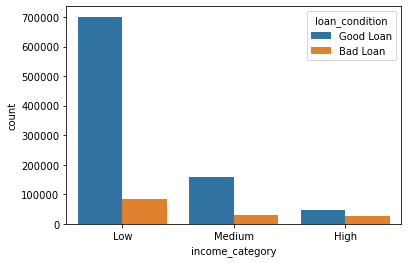

In [100]:
#plt.figure(figsize=(10,10))
sns.countplot(x='income_category',data=df, hue='loan_condition')

In [63]:
df['income_category_cat']=df['income_category'].map({'Low':1,'Medium':2,'High':3})

In [ ]:
df.head(20)

In [102]:
df['income_category_cat'].unique()

array([1, 2, 3], dtype=int64)

In [103]:
#term variable
df['term'].value_counts()

 36 months    782321
 60 months    266254
Name: term, dtype: int64

In [104]:
df.groupby(['term','loan_condition'])['loan_condition'].count()

term        loan_condition
 36 months  Bad Loan          118029
            Good Loan         664292
 60 months  Bad Loan           24498
            Good Loan         241756
Name: loan_condition, dtype: int64

<AxesSubplot:xlabel='term', ylabel='count'>

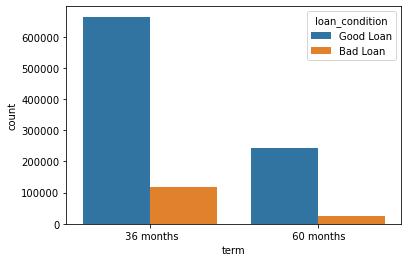

In [105]:
sns.countplot(x='term',data=df, hue='loan_condition')

In [64]:
df['term_cat']=df['term'].map({' 36 months': 1,' 60 months': 2})

In [ ]:
df['term'].unique()

In [108]:
df.head(20)

id  emp_length_int home_ownership income_category  loan_amount  \
0   1077501            10.0           RENT             Low         5000   
1   1077430             0.5           RENT             Low         2500   
2   1077175            10.0           RENT             Low         2400   
3   1076863            10.0           RENT             Low        10000   
4   1075358             1.0           RENT             Low         3000   
5   1075269             3.0           RENT             Low         5000   
6   1069639             8.0           RENT             Low         7000   
7   1072053             9.0           RENT             Low         3000   
8   1071795             4.0            OWN             Low         5600   
9   1071570             0.5           RENT             Low         5375   
10  1070078             5.0            OWN             Low         6500   
11  1069908            10.0            OWN             Low        12000   
12  1064687             0.5           RENT             Low         9000   
13  1069866             3.0           RENT             Low         3000   
14  1069057             3.0           RENT             Low        10000   
15  1069759             0.5           RENT             Low         1000   
16  1065775             4.0           RENT             Low        10000   
17  1069971            10.0       MORTGAGE          Medium         3600   
18  1062474             1.0       MORTGAGE             Low         6000   
19  1069742             6.0           RENT             Low         9200   

          term             purpose interest_payments loan_condition grade  \
0    36 months         credit_card               Low      Good Loan     B   
1    60 months                 car              High       Bad Loan     C   
2    36 months      small_business              High      Good Loan     C   
3    36 months               other              High      Good Loan     C   
4    60 months               other               Low      Good Loan     B   
5    36 months             wedding               Low      Good Loan     A   
6    60 months  debt_consolidation              High      Good Loan     C   
7    36 months                 car              High      Good Loan     E   
8    60 months      small_business              High       Bad Loan     F   
9    60 months               other               Low       Bad Loan     B   
10   60 months  debt_consolidation              High      Good Loan     C   
11   36 months  debt_consolidation               Low      Good Loan     B   
12   36 months  debt_consolidation              High       Bad Loan     C   
13   36 months         credit_card               Low      Good Loan     B   
14   36 months               other               Low       Bad Loan     B   
15   36 months  debt_consolidation              High      Good Loan     D   
16   36 months    home_improvement              High      Good Loan     C   
17   36 months      major_purchase               Low      Good Loan     A   
18   36 months             medical               Low      Good Loan     B   
19   36 months  debt_consolidation               Low      Good Loan     A   

          region issue_date issue_month issue_year final_date final_month  \
0        munster         12           1       2011          1           1   
1       leinster         12           1       2011          4           1   
2       cannught         12           1       2011          6           1   
3         ulster         12           1       2011          1           1   
4         ulster         12           1       2011          1           1   
5        munster         12           1       2011          1           1   
6       leinster         12           1       2011          1           1   
7         ulster         12           1       2011          1           1   
8         ulster         12           1       2011          4           1   
9        munster         12           1      

In [66]:
#application_type variable
df['application_type'].value_counts()

INDIVIDUAL    1048064
JOINT             511
Name: application_type, dtype: int64

In [ ]:
# 'application_type' is highly imbalanced.

In [67]:
df.groupby(['application_type','loan_condition'])['loan_condition'].count()

application_type  loan_condition
INDIVIDUAL        Bad Loan          142522
                  Good Loan         905542
JOINT             Bad Loan               5
                  Good Loan            506
Name: loan_condition, dtype: int64

<AxesSubplot:xlabel='application_type', ylabel='count'>

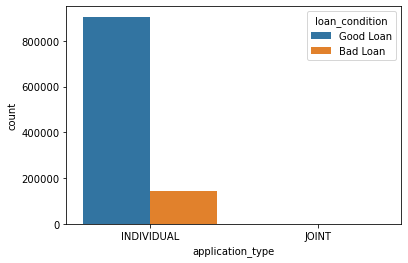

In [68]:
sns.countplot(x='application_type',data=df, hue='loan_condition')

In [ ]:
# 'application_type' variable is not at all affecting our target-variable,so,we can remove it. 

In [65]:
df.drop('application_type',axis=1,inplace=True)

In [ ]:
df.head(20)

In [70]:
#purpose variable
df['purpose'].value_counts()

debt_consolidation    538298
credit_card           221320
home_improvement       63949
other                  56685
major_purchase         30392
small_business         23266
medical                19835
car                    18893
moving                 17261
vacation               16124
house                  14424
wedding                14135
educational            13418
renewable_energy         575
Name: purpose, dtype: int64

In [71]:
pd.crosstab(df.purpose,df.loan_condition,margins=True)

loan_condition      Bad Loan  Good Loan      All
purpose                                         
car                     5247      13646    18893
credit_card            18698     202622   221320
debt_consolidation     48188     490110   538298
educational             6048       7370    13418
home_improvement        9224      54725    63949
house                   5454       8970    14424
major_purchase          7559      22833    30392
medical                 6006      13829    19835
moving                  6131      11130    17261
other                  10609      46076    56685
renewable_energy          72        503      575
small_business          7761      15505    23266
vacation                5730      10394    16124
wedding                 5800       8335    14135
All                   142527     906048  1048575

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

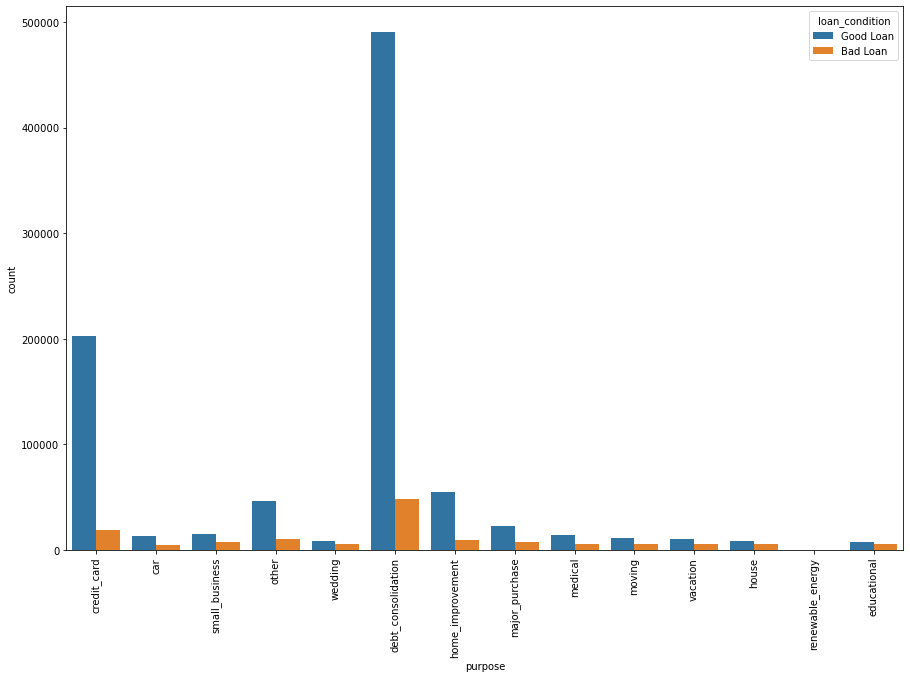

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='purpose',data=df, hue='loan_condition')
plt.xticks(rotation=90)

In [73]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [74]:
df['purpose'].value_counts()

debt_consolidation    538298
credit_card           221320
home_improvement       63949
other                  56685
major_purchase         30392
small_business         23266
medical                19835
car                    18893
moving                 17261
vacation               16124
house                  14424
wedding                14135
educational            13418
renewable_energy         575
Name: purpose, dtype: int64

In [66]:
#assigning no.as per no. of counts(highest-1,lowest-14)
df['purpose_cat']=df['purpose'].map({'debt_consolidation': 1,'credit_card': 2,'home_improvement':3,'other':4,
                                     'major_purchase':5,'small_business':6,'medical':7,'car':8,'moving':9,
                                     'vacation':10,'house':11,'wedding':12,'educational':13,'renewable_energy':14})

In [ ]:
df.head(20)

In [76]:
#interest_payments variable
df['interest_payments'].value_counts()

Low     542515
High    506060
Name: interest_payments, dtype: int64

In [77]:
pd.crosstab(df.interest_payments,df.loan_condition,margins=True)

loan_condition     Bad Loan  Good Loan      All
interest_payments                              
High                  87762     418298   506060
Low                   54765     487750   542515
All                  142527     906048  1048575

<AxesSubplot:xlabel='interest_payments', ylabel='count'>

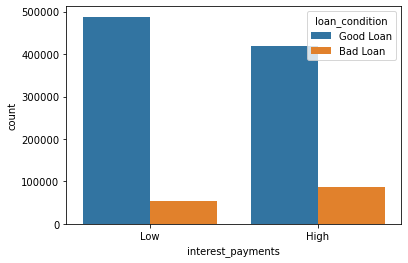

In [78]:
#plt.figure(figsize=(15,10))
sns.countplot(x='interest_payments',data=df, hue='loan_condition')
#plt.xticks(rotation=90)

In [79]:
df['interest_payments'].unique()

array(['Low', 'High'], dtype=object)

In [67]:
df['interest_payments_cat']=df['interest_payments'].map({'Low': 1,'High': 2})

In [ ]:
df.head(20)

In [81]:
#grade variable
df['grade'].value_counts()

B    276838
C    266677
A    171891
D    168203
E     91514
F     47414
G     26038
Name: grade, dtype: int64

In [82]:
pd.crosstab(df.grade,df.loan_condition,margins=True)

loan_condition  Bad Loan  Good Loan      All
grade                                       
A                  14594     157297   171891
B                  23911     252927   276838
C                  28780     237897   266677
D                  29087     139116   168203
E                  19455      72059    91514
F                  15712      31702    47414
G                  10988      15050    26038
All               142527     906048  1048575

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'B'),
  Text(1, 0, 'C'),
  Text(2, 0, 'A'),
  Text(3, 0, 'E'),
  Text(4, 0, 'F'),
  Text(5, 0, 'D'),
  Text(6, 0, 'G')])

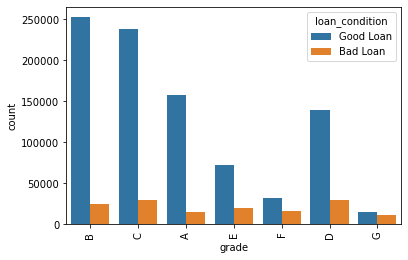

In [83]:
#plt.figure(figsize=(15,10))
sns.countplot(x='grade',data=df, hue='loan_condition')
plt.xticks(rotation=90)

In [ ]:
df['grade'].unique()

In [68]:
df['grade_cat']=df['grade'].map({'A': 1,'B': 2,'C':3,'D': 4,'E': 5,'F': 6,'G': 7})

In [ ]:
df.head(20)

In [81]:
df.shape

(1048575, 29)

In [85]:
#region variable
df['region'].value_counts()

leinster        247938
Northern-Irl    245844
ulster          239618
cannught        183644
munster         131531
Name: region, dtype: int64

In [86]:
pd.crosstab(df.region,df.loan_condition,margins=True)

loan_condition  Bad Loan  Good Loan      All
region                                      
Northern-Irl       35474     210370   245844
cannught           24080     159564   183644
leinster           32229     215709   247938
munster            19983     111548   131531
ulster             30761     208857   239618
All               142527     906048  1048575

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'munster'),
  Text(1, 0, 'leinster'),
  Text(2, 0, 'cannught'),
  Text(3, 0, 'ulster'),
  Text(4, 0, 'Northern-Irl')])

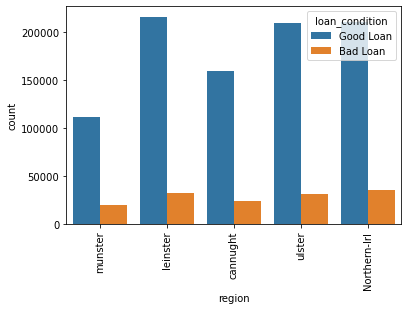

In [87]:
#plt.figure(figsize=(15,10))
sns.countplot(x='region',data=df, hue='loan_condition')
plt.xticks(rotation=90)

In [ ]:
df['region'].unique()

In [88]:
df['region'].value_counts()

leinster        247938
Northern-Irl    245844
ulster          239618
cannught        183644
munster         131531
Name: region, dtype: int64

In [69]:
#assigning numbers as per no. of counts(highest-1,lowest-5)
df['region_cat']=df['region'].map({'leinster': 1,'Northern-Irl': 2,'ulster':3,'cannught': 4,'munster': 5})

In [ ]:
df.head(20)

# Analysis of Target-variable

In [90]:
#Checking how imbalanced our target variable is
df['loan_condition'].value_counts()

Good Loan    906048
Bad Loan     142527
Name: loan_condition, dtype: int64

<AxesSubplot:xlabel='loan_condition', ylabel='count'>

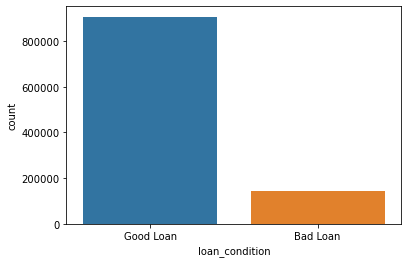

In [83]:
sns.countplot(x='loan_condition',data=df)

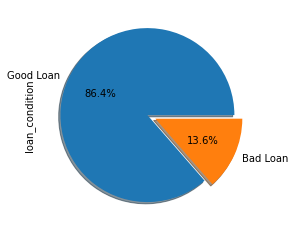

In [84]:
df['loan_condition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.savefig("abc.png")
plt.show()

In [ ]:
df.head()

# Converting target variable into numeric-datatype

In [70]:
def defaulted(x):
    if x == 'Good Loan':
        return 1
    else:
        return 0

In [71]:
df['default'] = df['loan_condition'].apply(lambda x: defaulted(x))

In [95]:
df.head()

id  emp_length_int home_ownership income_category  loan_amount  \
0  1077501            10.0           RENT             Low         5000   
1  1077430             0.5           RENT             Low         2500   
2  1077175            10.0           RENT             Low         2400   
3  1076863            10.0           RENT             Low        10000   
4  1075358             1.0           RENT             Low         3000   

         term         purpose interest_payments loan_condition grade  \
0   36 months     credit_card               Low      Good Loan     B   
1   60 months             car              High       Bad Loan     C   
2   36 months  small_business              High      Good Loan     C   
3   36 months           other              High      Good Loan     C   
4   60 months           other               Low      Good Loan     B   

     region issue_date issue_month issue_year final_date final_month  \
0   munster         12           1       2011          1           1   
1  leinster         12           1       2011          4           1   
2  cannught         12           1       2011          6           1   
3    ulster         12           1       2011          1           1   
4    ulster         12           1       2011          1           1   

  final_year  dti_OT  total_pymnt_OT  total_rec_prncp_OT  installment_OT  \
0       2015   27.65     5861.071414             5000.00          162.87   
1       2013    1.00     1008.710000              456.46           59.83   
2       2014    8.72     3003.653644             2400.00           84.33   
3       2015   20.00    12226.302210            10000.00          339.31   
4       2016   17.94     3242.170000             2233.10           67.79   

   annual_inc_OT  interest_rate_OT  home_ownership_cat  income_category_cat  \
0        24000.0             10.65                   2                    1   
1        30000.0             15.27                   2                    1   
2        12252.0             15.96                   2                    1   
3        49200.0             13.49                   2                    1   
4        80000.0             12.69                   2                    1   

   term_cat  purpose_cat  interest_payments_cat  grade_cat  region_cat  \
0         1            2                      1          2           5   
1         2            8                      2          3           1   
2         1            6                      2          3           4   
3         1            4                      2          3           3   
4         2            4                      1          2           3   

   default  
0        1  
1        0  
2        1  
3        1  
4        1

In [96]:
df.columns

Index(['id', 'emp_length_int', 'home_ownership', 'income_category',
       'loan_amount', 'term', 'purpose', 'interest_payments', 'loan_condition',
       'grade', 'region', 'issue_date', 'issue_month', 'issue_year',
       'final_date', 'final_month', 'final_year', 'dti_OT', 'total_pymnt_OT',
       'total_rec_prncp_OT', 'installment_OT', 'annual_inc_OT',
       'interest_rate_OT', 'home_ownership_cat', 'income_category_cat',
       'term_cat', 'purpose_cat', 'interest_payments_cat', 'grade_cat',
       'region_cat', 'default'],
      dtype='object')

In [72]:
#dropping irrelevant columns
df.drop(['id','home_ownership','income_category','term','purpose','interest_payments','loan_condition',
             'grade','region'],axis=1,inplace=True)

In [98]:
df.head()

emp_length_int  loan_amount issue_date issue_month issue_year final_date  \
0            10.0         5000         12           1       2011          1   
1             0.5         2500         12           1       2011          4   
2            10.0         2400         12           1       2011          6   
3            10.0        10000         12           1       2011          1   
4             1.0         3000         12           1       2011          1   

  final_month final_year  dti_OT  total_pymnt_OT  total_rec_prncp_OT  \
0           1       2015   27.65     5861.071414             5000.00   
1           1       2013    1.00     1008.710000              456.46   
2           1       2014    8.72     3003.653644             2400.00   
3           1       2015   20.00    12226.302210            10000.00   
4           1       2016   17.94     3242.170000             2233.10   

   installment_OT  annual_inc_OT  interest_rate_OT  home_ownership_cat  \
0          162.87        24000.0             10.65                   2   
1           59.83        30000.0             15.27                   2   
2           84.33        12252.0             15.96                   2   
3          339.31        49200.0             13.49                   2   
4           67.79        80000.0             12.69                   2   

   income_category_cat  term_cat  purpose_cat  interest_payments_cat  \
0                    1         1            2                      1   
1                    1         2            8                      2   
2                    1         1            6                      2   
3                    1         1            4                      2   
4                    1         2            4                      1   

   grade_cat  region_cat  default  
0          2           5        1  
1          3           1        0  
2          3           4        1  
3          3           3        1  
4          2           3        1

In [99]:
df.dtypes

emp_length_int           float64
loan_amount                int64
issue_date                string
issue_month               string
issue_year                string
final_date                string
final_month               string
final_year                string
dti_OT                   float64
total_pymnt_OT           float64
total_rec_prncp_OT       float64
installment_OT           float64
annual_inc_OT            float64
interest_rate_OT         float64
home_ownership_cat         int32
income_category_cat        int64
term_cat                   int64
purpose_cat                int64
interest_payments_cat      int64
grade_cat                  int64
region_cat                 int64
default                    int64
dtype: object

In [ ]:
#convert date columns into object and then encode them.

In [73]:
colsToString = ['issue_date','issue_month','issue_year','final_date','final_month','final_year']

In [74]:
for i in colsToString:
    df[i] = df[i].astype('object')

In [102]:
df.dtypes

emp_length_int           float64
loan_amount                int64
issue_date                object
issue_month               object
issue_year                object
final_date                object
final_month               object
final_year                object
dti_OT                   float64
total_pymnt_OT           float64
total_rec_prncp_OT       float64
installment_OT           float64
annual_inc_OT            float64
interest_rate_OT         float64
home_ownership_cat         int32
income_category_cat        int64
term_cat                   int64
purpose_cat                int64
interest_payments_cat      int64
grade_cat                  int64
region_cat                 int64
default                    int64
dtype: object

In [ ]:
#encoding date columns

In [103]:
df.issue_date.value_counts()

2     212944
10    111971
7      95499
11     88081
12     80420
8      76522
4      70214
5      67929
6      63874
1      62825
9      62194
3      56102
Name: issue_date, dtype: int64

In [104]:
df.issue_month.value_counts()

1    1048575
Name: issue_month, dtype: int64

In [75]:
#as it contains only January as a month,there is no variance in this column,we will drop this column.
df.drop('issue_month',axis=1,inplace=True)

In [106]:
df.issue_year.value_counts()

2015    421094
2014    235628
2008    163589
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2007       603
Name: issue_year, dtype: int64

In [76]:
df['issue_year_cat']=df['issue_year'].map({'2007': 1,'2008': 2,'2009':3,'2010': 4,'2011': 5,'2012': 6,'2013': 7,'2014': 8,'2015': 9})

In [108]:
df['issue_year_cat'].head()

0    5
1    5
2    5
3    5
4    5
Name: issue_year_cat, dtype: int64

In [109]:
df.final_date.value_counts()

1     518500
12    179730
10     39371
6      38714
3      37378
9      36788
11     36582
7      36515
8      35056
4      32670
5      29935
2      27336
Name: final_date, dtype: int64

In [110]:
df.final_month.value_counts()

1    1048575
Name: final_month, dtype: int64

In [77]:
#as it contains only January as a month,there is no variance in this column,we will drop this column.
df.drop('final_month',axis=1,inplace=True)

In [112]:
df.final_year.value_counts()

2016    491650
2015    284625
2014     66595
2010     49332
2009     41916
2008     40651
2011     31308
2013     30683
2012     11813
2007         2
Name: final_year, dtype: int64

In [78]:
df['final_year_cat']=df['final_year'].map({'2007': 1,'2008': 2,'2009':3,'2010': 4,'2011': 5,'2012': 6,'2013': 7,'2014': 8,'2015': 9,'2016':10})

In [114]:
df['final_year_cat'].head()

0     9
1     7
2     8
3     9
4    10
Name: final_year_cat, dtype: int64

In [79]:
df.drop(['issue_year','final_year'],axis=1,inplace=True)

In [116]:
df.head()

emp_length_int  loan_amount issue_date final_date  dti_OT  total_pymnt_OT  \
0            10.0         5000         12          1   27.65     5861.071414   
1             0.5         2500         12          4    1.00     1008.710000   
2            10.0         2400         12          6    8.72     3003.653644   
3            10.0        10000         12          1   20.00    12226.302210   
4             1.0         3000         12          1   17.94     3242.170000   

   total_rec_prncp_OT  installment_OT  annual_inc_OT  interest_rate_OT  \
0             5000.00          162.87        24000.0             10.65   
1              456.46           59.83        30000.0             15.27   
2             2400.00           84.33        12252.0             15.96   
3            10000.00          339.31        49200.0             13.49   
4             2233.10           67.79        80000.0             12.69   

   home_ownership_cat  income_category_cat  term_cat  purpose_cat  \
0                   2                    1         1            2   
1                   2                    1         2            8   
2                   2                    1         1            6   
3                   2                    1         1            4   
4                   2                    1         2            4   

   interest_payments_cat  grade_cat  region_cat  default  issue_year_cat  \
0                      1          2           5        1               5   
1                      2          3           1        0               5   
2                      2          3           4        1               5   
3                      2          3           3        1               5   
4                      1          2           3        1               5   

   final_year_cat  
0               9  
1               7  
2               8  
3               9  
4              10

In [80]:
cols = ['issue_date', 'issue_year_cat', 'final_date','final_year_cat']

In [81]:
for i in cols:
    df[i] = df[i].astype('int')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   emp_length_int         1048575 non-null  float64
 1   loan_amount            1048575 non-null  int64  
 2   issue_date             1048575 non-null  int32  
 3   final_date             1048575 non-null  int32  
 4   dti_OT                 1048575 non-null  float64
 5   total_pymnt_OT         1048575 non-null  float64
 6   total_rec_prncp_OT     1048575 non-null  float64
 7   installment_OT         1048575 non-null  float64
 8   annual_inc_OT          1048575 non-null  float64
 9   interest_rate_OT       1048575 non-null  float64
 10  home_ownership_cat     1048575 non-null  int32  
 11  income_category_cat    1048575 non-null  int64  
 12  term_cat               1048575 non-null  int64  
 13  purpose_cat            1048575 non-null  int64  
 14  interest_payments_

In [82]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = df.drop('default', axis = 1)

# create dataframe of target variable
df_target = df['default']

In [120]:
df_feature.head()

emp_length_int  loan_amount  issue_date  final_date  dti_OT  \
0            10.0         5000          12           1   27.65   
1             0.5         2500          12           4    1.00   
2            10.0         2400          12           6    8.72   
3            10.0        10000          12           1   20.00   
4             1.0         3000          12           1   17.94   

   total_pymnt_OT  total_rec_prncp_OT  installment_OT  annual_inc_OT  \
0     5861.071414             5000.00          162.87        24000.0   
1     1008.710000              456.46           59.83        30000.0   
2     3003.653644             2400.00           84.33        12252.0   
3    12226.302210            10000.00          339.31        49200.0   
4     3242.170000             2233.10           67.79        80000.0   

   interest_rate_OT  home_ownership_cat  income_category_cat  term_cat  \
0             10.65                   2                    1         1   
1             15.27                   2                    1         2   
2             15.96                   2                    1         1   
3             13.49                   2                    1         1   
4             12.69                   2                    1         2   

   purpose_cat  interest_payments_cat  grade_cat  region_cat  issue_year_cat  \
0            2                      1          2           5               5   
1            8                      2          3           1               5   
2            6                      2          3           4               5   
3            4                      2          3           3               5   
4            4                      1          2           3               5   

   final_year_cat  
0               9  
1               7  
2               8  
3               9  
4              10

In [121]:
df_feature.columns

Index(['emp_length_int', 'loan_amount', 'issue_date', 'final_date', 'dti_OT',
       'total_pymnt_OT', 'total_rec_prncp_OT', 'installment_OT',
       'annual_inc_OT', 'interest_rate_OT', 'home_ownership_cat',
       'income_category_cat', 'term_cat', 'purpose_cat',
       'interest_payments_cat', 'grade_cat', 'region_cat', 'issue_year_cat',
       'final_year_cat'],
      dtype='object')

In [83]:
#splitting df_feature before scaling
df_num=df_feature.drop(['issue_date','issue_year_cat', 'final_date', 'final_year_cat',
                       'home_ownership_cat','income_category_cat', 'term_cat', 'purpose_cat','interest_payments_cat', 
                        'grade_cat', 'region_cat'],axis=1)
df_num.head()

emp_length_int  loan_amount  dti_OT  total_pymnt_OT  total_rec_prncp_OT  \
0            10.0         5000   27.65     5861.071414             5000.00   
1             0.5         2500    1.00     1008.710000              456.46   
2            10.0         2400    8.72     3003.653644             2400.00   
3            10.0        10000   20.00    12226.302210            10000.00   
4             1.0         3000   17.94     3242.170000             2233.10   

   installment_OT  annual_inc_OT  interest_rate_OT  
0          162.87        24000.0             10.65  
1           59.83        30000.0             15.27  
2           84.33        12252.0             15.96  
3          339.31        49200.0             13.49  
4           67.79        80000.0             12.69

In [84]:
df_cat=df_feature.drop(['emp_length_int','loan_amount','dti_OT','total_pymnt_OT','total_rec_prncp_OT','installment_OT',
                        'annual_inc_OT','interest_rate_OT'],axis=1)
df_cat.head()

issue_date  final_date  home_ownership_cat  income_category_cat  term_cat  \
0          12           1                   2                    1         1   
1          12           4                   2                    1         2   
2          12           6                   2                    1         1   
3          12           1                   2                    1         1   
4          12           1                   2                    1         2   

   purpose_cat  interest_payments_cat  grade_cat  region_cat  issue_year_cat  \
0            2                      1          2           5               5   
1            8                      2          3           1               5   
2            6                      2          3           4               5   
3            4                      2          3           3               5   
4            4                      1          2           3               5   

   final_year_cat  
0               9  
1               7  
2               8  
3               9  
4              10

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
# initialize the StandardScaler
ss=StandardScaler()

scaled_data = ss.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_feature_scaled = pd.DataFrame(scaled_data, columns = df_num.columns)

df_feature_scaled.head()

emp_length_int  loan_amount    dti_OT  total_pymnt_OT  total_rec_prncp_OT  \
0        1.162244    -1.088235  1.201644       -0.312303           -0.122492   
1       -1.492149    -1.389182 -1.968418       -0.980947           -0.954307   
2        1.162244    -1.401220 -1.050111       -0.706048           -0.598491   
3        1.162244    -0.486341  0.291663        0.564810            0.792890   
4       -1.352444    -1.328992  0.046623       -0.673181           -0.629046   

   installment_OT  annual_inc_OT  interest_rate_OT  
0       -1.140497      -1.310766         -0.632847  
1       -1.588583      -1.140205          0.468483  
2       -1.482041      -1.644724          0.632968  
3       -0.373219      -0.594410          0.044161  
4       -1.553968       0.281137         -0.146546

In [87]:
X=pd.concat([df_feature_scaled,df_cat],axis=1)
X.head()

emp_length_int  loan_amount    dti_OT  total_pymnt_OT  total_rec_prncp_OT  \
0        1.162244    -1.088235  1.201644       -0.312303           -0.122492   
1       -1.492149    -1.389182 -1.968418       -0.980947           -0.954307   
2        1.162244    -1.401220 -1.050111       -0.706048           -0.598491   
3        1.162244    -0.486341  0.291663        0.564810            0.792890   
4       -1.352444    -1.328992  0.046623       -0.673181           -0.629046   

   installment_OT  annual_inc_OT  interest_rate_OT  issue_date  final_date  \
0       -1.140497      -1.310766         -0.632847          12           1   
1       -1.588583      -1.140205          0.468483          12           4   
2       -1.482041      -1.644724          0.632968          12           6   
3       -0.373219      -0.594410          0.044161          12           1   
4       -1.553968       0.281137         -0.146546          12           1   

   home_ownership_cat  income_category_cat  term_cat  purpose_cat  \
0                   2                    1         1            2   
1                   2                    1         2            8   
2                   2                    1         1            6   
3                   2                    1         1            4   
4                   2                    1         2            4   

   interest_payments_cat  grade_cat  region_cat  issue_year_cat  \
0                      1          2           5               5   
1                      2          3           1               5   
2                      2          3           4               5   
3                      2          3           3               5   
4                      1          2           3               5   

   final_year_cat  
0               9  
1               7  
2               8  
3               9  
4              10

# Splitting data into train and test data

In [88]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,roc_curve,accuracy_score
from sklearn.feature_selection import RFE

In [89]:
X=sm.add_constant(X)

Xtrain,Xtest,ytrain,ytest=train_test_split(X,df_target,random_state=10,test_size=0.3)

print("Xtrain :",Xtrain.shape)
print("Xtest :",Xtest.shape)
print("ytrain :",ytrain.shape)
print("ytest :",ytest.shape)

Xtrain : (734002, 20)
Xtest : (314573, 20)
ytrain : (734002,)
ytest : (314573,)


# Logistic regression full-model

Create a generalized function to create a dataframe containing the scores for the models.

In [90]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    log_pred_prob = logreg.predict(Xtest)

    # convert probabilities to 0 and 1 using 'if_else'
    log_pred = [ 0 if x < cutoff else 1 for x in log_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, log_pred),
                                    'Precision Score': metrics.precision_score(ytest, log_pred),
                                    'Recall Score': metrics.recall_score(ytest, log_pred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, log_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, log_pred),
                                    'f1-score': metrics.f1_score(ytest, log_pred)}, 
                                    ignore_index = True)

Building a model

In [131]:
X.dtypes

const                    float64
emp_length_int           float64
loan_amount              float64
dti_OT                   float64
total_pymnt_OT           float64
total_rec_prncp_OT       float64
installment_OT           float64
annual_inc_OT            float64
interest_rate_OT         float64
issue_date                 int32
final_date                 int32
home_ownership_cat         int32
income_category_cat        int64
term_cat                   int64
purpose_cat                int64
interest_payments_cat      int64
grade_cat                  int64
region_cat                 int64
issue_year_cat             int32
final_year_cat             int32
dtype: object

In [91]:
logreg = sm.Logit(ytrain, Xtrain).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.292321
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               734002
Model:                          Logit   Df Residuals:                   733982
Method:                           MLE   Df Model:                           19
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.2659
Time:                        12:11:04   Log-Likelihood:            -2.1456e+05
converged:                       True   LL-Null:                   -2.9228e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9798      0.034    -28.862      0.000      -1.046      -0.

In [ ]:
# Look at the llr_pvalue
# if this value is less than 0.05 then the overall model is significant


# H0: Logistic Model is Insignificant.
# Ha :Logistic Model is Significant.

#it is <0.05,hence our model is significant.

In [ ]:
#check p-value of all independent vars.
#emp_length_int and grade_cat are having p-val>0.05,hence,they it is not significant feature and can be removed.

In [92]:
X1=X.drop(['emp_length_int','grade_cat'],axis=1)
X1.head()

const  loan_amount    dti_OT  total_pymnt_OT  total_rec_prncp_OT  \
0    1.0    -1.088235  1.201644       -0.312303           -0.122492   
1    1.0    -1.389182 -1.968418       -0.980947           -0.954307   
2    1.0    -1.401220 -1.050111       -0.706048           -0.598491   
3    1.0    -0.486341  0.291663        0.564810            0.792890   
4    1.0    -1.328992  0.046623       -0.673181           -0.629046   

   installment_OT  annual_inc_OT  interest_rate_OT  issue_date  final_date  \
0       -1.140497      -1.310766         -0.632847          12           1   
1       -1.588583      -1.140205          0.468483          12           4   
2       -1.482041      -1.644724          0.632968          12           6   
3       -0.373219      -0.594410          0.044161          12           1   
4       -1.553968       0.281137         -0.146546          12           1   

   home_ownership_cat  income_category_cat  term_cat  purpose_cat  \
0                   2                    1         1            2   
1                   2                    1         2            8   
2                   2                    1         1            6   
3                   2                    1         1            4   
4                   2                    1         2            4   

   interest_payments_cat  region_cat  issue_year_cat  final_year_cat  
0                      1           5               5               9  
1                      2           1               5               7  
2                      2           4               5               8  
3                      2           3               5               9  
4                      1           3               5              10

In [93]:
X1train,X1test,y1train,y1test=train_test_split(X1,df_target,random_state=10,test_size=0.3)

print("Xtrain :",X1train.shape)
print("Xtest :",X1test.shape)
print("ytrain :",y1train.shape)
print("ytest :",y1test.shape)

Xtrain : (734002, 18)
Xtest : (314573, 18)
ytrain : (734002,)
ytest : (314573,)


In [94]:
logreg1 = sm.Logit(y1train, X1train).fit()

# print the summary of the model
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.292324
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               734002
Model:                          Logit   Df Residuals:                   733984
Method:                           MLE   Df Model:                           17
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.2659
Time:                        12:11:54   Log-Likelihood:            -2.1457e+05
converged:                       True   LL-Null:                   -2.9228e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9964      0.033    -30.569      0.000      -1.060      -0.

In [ ]:
#As we see that there is not much difference in pseudo r2 value after dropping insignificant variables.

In [110]:
#AIC score
print(logreg.aic)

429168.41083736735


In [ ]:
#high value indicates our model is very poor.

In [95]:
#Interpret the odds for each variable
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

Odds
const                  0.375377
emp_length_int         0.995502
loan_amount            0.866391
dti_OT                 0.957805
total_pymnt_OT         1.219574
total_rec_prncp_OT     1.707734
installment_OT         0.825408
annual_inc_OT          1.043600
interest_rate_OT       0.681464
issue_date             1.058380
final_date             0.908511
home_ownership_cat     0.957177
income_category_cat    1.127154
term_cat               1.137573
purpose_cat            1.025389
interest_payments_cat  0.748777
grade_cat              0.994463
region_cat             1.021631
issue_year_cat         1.512317
final_year_cat         1.082171

Interpretation:

odds_const: The odds of defaulting a loan is 0.375377, considering all other variables take zero value

odds_emp_length_int = 0.995502, it implies that the odds of defaulting a loan increases by a factor of 0.995502 due to one unit increase in the emp_length_int, keeping other variables constant

odds_loan_amt = 0.866391, it implies that the odds of defaulting a loan increases by a factor of 0.866391 due to one unit increase in the loan_amt, keeping other variables constant

odds_dti_OT = 0.957805, it implies that the odds of defaulting a loan increases by a factor of 0.9578056 due to one unit increase in the dti_OT, keeping other variables constant

odds_total_pymnt_OT = 1.219574, it implies that the odds of defaulting a loan increases by a factor of 1.219574 due to one unit increase in the total_pymnt_OT, keeping other variables constant

odds_total_rec_prncp_OT = 1.707734, it implies that the odds of defaulting a loan increases by a factor of 1.707734 due to one unit increase in the total_rec_prncp_OT, keeping other variables constant

odds_installment_OT = 0.825408, it implies that the odds of defaulting a loan increases by a factor of 0.825408 due to one unit increase in the installment_OT, keeping other variables constant

odds_annual_inc_OT = 1.043600, it implies that the odds of defaulting a loan increases by a factor of 1.043600 due to one unit increase in the annual_inc_OT, keeping other variables constant

odds_interest_rate_OT = 0.681464, it implies that the odds of defaulting a loan increases by a factor of 0.681464 due to one unit increase in the interest_rate_OT, keeping other variables constant

odds_issue_date = 1.058380, it implies that the odds of defaulting a loan increases by a factor of 1.058380 due to one unit increase in the issue_date, keeping other variables constant

odds_final_date = 0.908511, it implies that the odds of defaulting a loan increases by a factor of 0.908511 due to one unit increase in the final_date, keeping other variables constant

odds_home_ownership_cat = 0.957177, it implies that the odds of defaulting a loan increases by a factor of 0.957177 due to one unit increase in the home_ownership_cat, keeping other variables constant

odds_income_category_cat = 1.127154, it implies that the odds of defaulting a loan increases by a factor of 1.127154 due to one unit increase in the income_category_cat, keeping other variables constant

odds_term_cat = 1.137573, it implies that the odds of defaulting a loan increases by a factor of 1.137573 due to one unit increase in the term_cat, keeping other variables constant

odds_purpose_cat = 1.025389, it implies that the odds of defaulting a loan increases by a factor of 1.025389 due to one unit increase in the purpose_cat, keeping other variables constant

odds_interest_payments_cat = 0.748777, it implies that the odds of defaulting a loan increases by a factor of 0.748777 due to one unit increase in the interest_payments_cat, keeping other variables constant

odds_grade_cat = 0.994463, it implies that the odds of defaulting a loan increases by a factor of 0.994463 due to one unit increase in the grade_cat, keeping other variables constant

odds_region_cat = 1.021631, it implies that the odds of defaulting a loan increases by a factor of 1.021631 due to one unit increase in the region_cat, keeping other variables constant

odds_issue_year_cat = 1.512317, it implies that the odds of defaulting a loan increases by a factor of 1.512317 due to one unit increase in the issue_year_cat, keeping other variables constant

odds_final_year_cat = 1.082171, it implies that the odds of defaulting a loan increases by a factor of 1.082171 due to one unit increase in the final_year_cat, keeping other variables constant

In [96]:
# let 'y_pred_prob' be the predicted values of y
log_pred_prob = logreg.predict(Xtest)

# print the y_pred_prob
log_pred_prob.head()

1007019    0.659489
750184     0.920802
669864     0.976734
758886     0.981568
344600     0.984823
dtype: float64

In [97]:
log_pred_prob.value_counts()

0.659489    1
0.887378    1
0.972921    1
0.859501    1
0.367869    1
           ..
0.966905    1
0.982878    1
0.916982    1
0.909033    1
0.878237    1
Length: 314573, dtype: int64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [98]:
# convert probabilities to 0 and 1 using 'if_else'
log_pred = [ 0 if x < 0.5 else 1 for x in log_pred_prob]

In [99]:
# print the first five observations of y_pred
log_pred[0:5]

[1, 1, 1, 1, 1]

In [100]:
ytest[0:5] # these are the actuals

1007019    1
750184     0
669864     1
758886     1
344600     1
Name: default, dtype: int64

In [101]:
log_pred_prob1 = logreg1.predict(X1test)

# print the y_pred_prob
log_pred_prob1.head()

1007019    0.659637
750184     0.921298
669864     0.976736
758886     0.981504
344600     0.984807
dtype: float64

In [102]:
# convert probabilities to 0 and 1 using 'if_else'
log_pred1 = [ 0 if x < 0.5 else 1 for x in log_pred_prob1]

In [103]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_log_reg_accuracy1=accuracy_score(y1test,log_pred1)
test_log_reg_precision1=precision_score(y1test,log_pred1)
test_log_reg_recall1=recall_score(y1test,log_pred1)
test_log_reg_f11=f1_score(y1test,log_pred1)
test_log_reg_auc1=roc_auc_score(y1test,log_pred_prob1)
print("For testing data :",end='\n')
print("accuracy :",test_log_reg_accuracy1)
print("precision :",test_log_reg_precision1)
print("recall :",test_log_reg_recall1)
print("f1 :",test_log_reg_f11)
print("auc_score :",test_log_reg_auc1)

For testing data :
accuracy : 0.8612849799569575
precision : 0.8922729817066679
recall : 0.9549201565629651
f1 : 0.9225342361182616
auc_score : 0.8738337930614898


In [104]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_log_reg_accuracy=accuracy_score(ytest,log_pred)
test_log_reg_precision=precision_score(ytest,log_pred)
test_log_reg_recall=recall_score(ytest,log_pred)
test_log_reg_f1=f1_score(ytest,log_pred)
test_log_reg_auc=roc_auc_score(ytest,log_pred_prob)
print("For testing data :",end='\n')
print("accuracy :",test_log_reg_accuracy)
print("precision :",test_log_reg_precision)
print("recall :",test_log_reg_recall)
print("f1 :",test_log_reg_f1)
print("auc_score :",test_log_reg_auc)

For testing data :
accuracy : 0.8613739895032314
precision : 0.8923102810028605
recall : 0.9549863099285176
f1 : 0.9225850431917514
auc_score : 0.8737538507799387


In [ ]:
#there is no difference even after removing insignificant columns.So,we will consider all columns.

Plot the confusion matrix

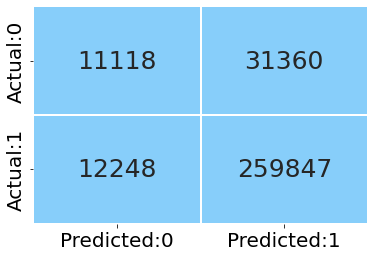

In [105]:
cm = confusion_matrix(ytest, log_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [148]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [149]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.8923102810028605

In [150]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.9549863099285176

In [151]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.26173548660483076

In [152]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.9225850431917514

In [153]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8613739895032314

In [154]:
# calculate various performance measures
acc_table = classification_report(ytest, log_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.48      0.26      0.34     42478
           1       0.89      0.95      0.92    272095

    accuracy                           0.86    314573
   macro avg       0.68      0.61      0.63    314573
weighted avg       0.84      0.86      0.84    314573



In [106]:
lr=LogisticRegression()
lr.fit(Xtrain,ytrain)

ypred_lr_train = lr.predict(Xtrain)

In [107]:
# convert probabilities to 0 and 1 using 'if_else'
train_log_pred = [ 0 if x < 0.5 else 1 for x in ypred_lr_train]

In [108]:
print(accuracy_score(ytrain,train_log_pred))
print(confusion_matrix(ytrain,train_log_pred))
print(classification_report(ytrain,train_log_pred))

0.8598464309361555
[[ 26267  73782]
 [ 29091 604862]]
              precision    recall  f1-score   support

           0       0.47      0.26      0.34    100049
           1       0.89      0.95      0.92    633953

    accuracy                           0.86    734002
   macro avg       0.68      0.61      0.63    734002
weighted avg       0.83      0.86      0.84    734002



In [109]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_log_reg_accuracy=accuracy_score(ytrain,train_log_pred)
train_log_reg_precision=precision_score(ytrain,train_log_pred)
train_log_reg_recall=recall_score(ytrain,train_log_pred)
train_log_reg_f1=f1_score(ytrain,train_log_pred)
train_log_reg_auc=roc_auc_score(ytrain,ypred_lr_train)
print("For training data :",end='\n')
print("accuracy :",train_log_reg_accuracy)
print("precision :",train_log_reg_precision)
print("recall :",train_log_reg_recall)
print("f1 :",train_log_reg_f1)
print("auc_score :",train_log_reg_auc)

For training data :
accuracy : 0.8598464309361555
precision : 0.8912802588691567
recall : 0.9541117401447742
f1 : 0.9216263636135081
auc_score : 0.6083265474404767


In [ ]:
#there is no difference between our training data accuracy and testing data accuracy,which tells that our model is fit.

In [159]:
# compute the kappa value
kappa = cohen_kappa_score(ytest, log_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.26750606351533135


As the kappa score for the full model (with cut-off probability 0.5) is 0.26577, we can say that there is fair agreement between the actual and predicted values.

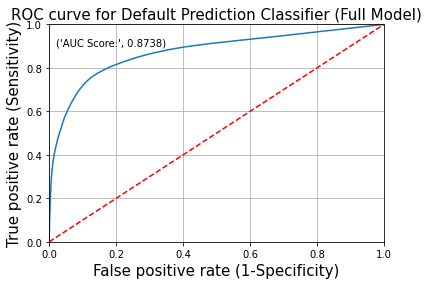

In [160]:
fpr, tpr, thresholds = roc_curve(ytest, log_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Default Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, log_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

Identify the Best Cut-off Value

In [161]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for value in cutoff:
    update_score_card(logreg, value)

In [162]:
# print the score card 
print('Score Card for Logistic regression:')
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


Youden's index

In [163]:
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

TPR       FPR  Threshold  Difference
0  0.772804  0.141391   0.892565    0.631413
1  0.772811  0.141414   0.892562    0.631397
2  0.772804  0.141414   0.892565    0.631389
3  0.772756  0.141367   0.892586    0.631389
4  0.773098  0.141720   0.892420    0.631377

As we can see that the optimal cut-off probability is approximately 0.89. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.89, then consider it to be 0 else consider it to be 1.

In [164]:
y_pred_youden = [ 0 if x < 0.89 else 1 for x in log_pred_prob]

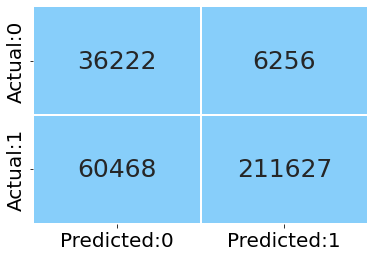

In [165]:
cm = confusion_matrix(ytest, y_pred_youden)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [166]:
acc_table = classification_report(ytest, y_pred_youden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.37      0.85      0.52     42478
           1       0.97      0.78      0.86    272095

    accuracy                           0.79    314573
   macro avg       0.67      0.82      0.69    314573
weighted avg       0.89      0.79      0.82    314573



In [ ]:
#By considering 0.89 as cut-off,we are getting less accuracy as compared to we took as 0.5 a threshold.

In [167]:
kappa = cohen_kappa_score(ytest, y_pred_youden)
print('kappa value:',kappa)

kappa value: 0.4098101997826076


In [ ]:
#kappa is also less as compared to when threshold was 0.5.

Hence,we will consider 0.5 as the optimal cutoff for our model.

# Logistic Regression using RFE

To select significant features,we will use recursive feature selection method.

In [110]:
X_train_rfe = Xtrain.iloc[:,1:]
X_test_rfe = Xtest.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train_rfe, ytrain)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['loan_amount', 'total_pymnt_OT', 'total_rec_prncp_OT', 'installment_OT',
       'interest_rate_OT', 'issue_date', 'final_date', 'income_category_cat',
       'term_cat', 'interest_payments_cat', 'issue_year_cat',
       'final_year_cat'],
      dtype='object')


Build the logisitc regression model using the variables obtained from RFE.

In [111]:
logreg_rfe = sm.Logit(ytrain, Xtrain[['loan_amount', 'total_pymnt_OT', 'total_rec_prncp_OT', 'installment_OT',
       'annual_inc_OT', 'interest_rate_OT', 'final_date', 'term_cat',
       'interest_payments_cat', 'grade_cat', 'issue_year_cat',
       'final_year_cat']]).fit()

print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.294032
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               734002
Model:                          Logit   Df Residuals:                   733990
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.2616
Time:                        12:16:24   Log-Likelihood:            -2.1582e+05
converged:                       True   LL-Null:                   -2.9228e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
loan_amount              -0.1026      0.006    -16.756      0.000      -0.115      -0.

In [112]:
print('AIC:', logreg_rfe.aic)

AIC: 431664.54968528805


In [113]:
y_pred_prob_rfe = logreg_rfe.predict(Xtest[['loan_amount', 'total_pymnt_OT', 'total_rec_prncp_OT', 'installment_OT',
       'annual_inc_OT', 'interest_rate_OT', 'final_date', 'term_cat',
       'interest_payments_cat', 'grade_cat', 'issue_year_cat',
       'final_year_cat']])

# print the y_pred_prob_rfe
y_pred_prob_rfe.head()

1007019    0.667040
750184     0.931093
669864     0.977000
758886     0.984496
344600     0.983083
dtype: float64

In [114]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.5 else 1 for x in y_pred_prob_rfe]

In [115]:
# print the first five observations of y_pred_rfe
y_pred_rfe[0:5]

[1, 1, 1, 1, 1]

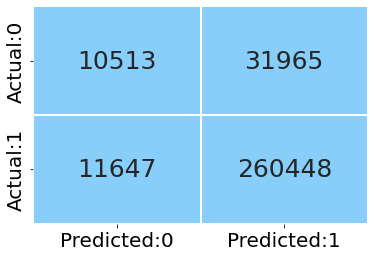

In [116]:
cm = confusion_matrix(ytest, y_pred_rfe)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [117]:
result = classification_report(ytest, y_pred_rfe)
print(result)

              precision    recall  f1-score   support

           0       0.47      0.25      0.33     42478
           1       0.89      0.96      0.92    272095

    accuracy                           0.86    314573
   macro avg       0.68      0.60      0.62    314573
weighted avg       0.83      0.86      0.84    314573



In [118]:
kappa = cohen_kappa_score(ytest, y_pred_rfe)

print('kappa value:',kappa)

kappa value: 0.25644422688555235


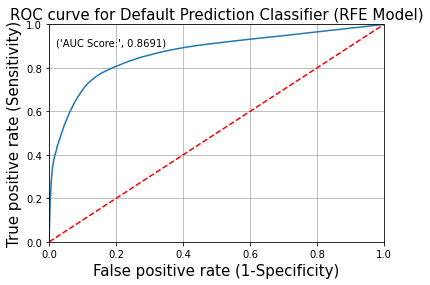

In [119]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob_rfe)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Default Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob_rfe),4)))
plt.grid(True)

In [120]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_rfe_accuracy=accuracy_score(ytest,y_pred_rfe)
test_rfe_precision=precision_score(ytest,y_pred_rfe)
test_rfe_recall=recall_score(ytest,y_pred_rfe)
test_rfe_f1=f1_score(ytest,y_pred_rfe)
test_rfe_auc=roc_auc_score(ytest,y_pred_prob_rfe)
print("For testing data :",end='\n')
print("accuracy :",test_rfe_accuracy)
print("precision :",test_rfe_precision)
print("recall :",test_rfe_recall)
print("f1 :",test_rfe_f1)
print("auc_score :",test_rfe_auc)

For testing data :
accuracy : 0.8613612738537637
precision : 0.8906854346420987
recall : 0.9571950973005752
f1 : 0.9227433446470201
auc_score : 0.8690512458968203


In [121]:
#for training data

In [122]:
rfe_pred_prob_train = logreg_rfe.predict(Xtrain[['loan_amount', 'total_pymnt_OT', 'total_rec_prncp_OT', 'installment_OT',
       'annual_inc_OT', 'interest_rate_OT', 'final_date', 'term_cat',
       'interest_payments_cat', 'grade_cat', 'issue_year_cat',
       'final_year_cat']])

# print the y_pred_prob_rfe
rfe_pred_prob_train.head()

350720     0.981048
410465     0.971372
1048287    0.233482
734403     0.980805
723222     0.971308
dtype: float64

In [123]:
# convert probabilities to 0 and 1 using 'if_else'
rfe_pred_train = [ 0 if x < 0.5 else 1 for x in rfe_pred_prob_train]

In [124]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_rfe_accuracy=accuracy_score(ytrain,rfe_pred_train)
train_rfe_precision=precision_score(ytrain,rfe_pred_train)
train_rfe_recall=recall_score(ytrain,rfe_pred_train)
train_rfe_f1=f1_score(ytrain,rfe_pred_train)
train_rfe_auc=roc_auc_score(ytrain,rfe_pred_prob_train)
print("For training data :",end='\n')
print("accuracy :",train_rfe_accuracy)
print("precision :",train_rfe_precision)
print("recall :",train_rfe_recall)
print("f1 :",train_rfe_f1)
print("auc_score :",train_rfe_auc)

For training data :
accuracy : 0.8601516072163291
precision : 0.8898597601422944
recall : 0.9564652269174528
f1 : 0.9219611101776931
auc_score : 0.86832081237703


In [ ]:
#there is no difference in accuracies of training and testing data,hence,we can say that our data is fit.

# Naive-Bayes Classification

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,cross_val_score

In [126]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(Xtrain, ytrain)

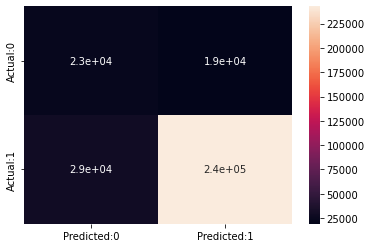

In [127]:
gnb_pred = gnb_model.predict(Xtest)

confusion_matrix(ytest,gnb_pred)

cm=confusion_matrix(ytest,gnb_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [128]:
print(classification_report(ytest,gnb_pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49     42478
           1       0.93      0.89      0.91    272095

    accuracy                           0.85    314573
   macro avg       0.69      0.72      0.70    314573
weighted avg       0.86      0.85      0.85    314573



In [129]:
gnb_pred_prob = gnb_model.predict_proba(Xtest)[:,1]

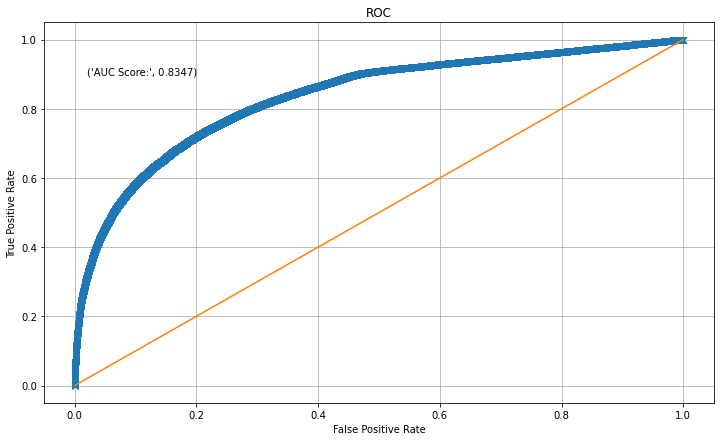

In [141]:
fpr, tpr,_=roc_curve(ytest,gnb_pred_prob)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Naive-Bayes')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, gnb_pred_prob),4)))
plt.grid(True)
plt.show()

In [130]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_gnb_accuracy=accuracy_score(ytest,gnb_pred)
test_gnb_precision=precision_score(ytest,gnb_pred)
test_gnb_recall=recall_score(ytest,gnb_pred)
test_gnb_f1=f1_score(ytest,gnb_pred)
test_gnb_auc=roc_auc_score(ytest,gnb_pred_prob)
print("For testing data :",end='\n')
print("accuracy :",test_gnb_accuracy)
print("precision :",test_gnb_precision)
print("recall :",test_gnb_recall)
print("f1 :",test_gnb_f1)
print("auc_score :",test_gnb_auc)

For testing data :
accuracy : 0.8460452740699297
precision : 0.9270518690500285
recall : 0.8922177915801467
f1 : 0.9093013412839019
auc_score : 0.8347053803250041


In [131]:
#for training data
train_gnb_pred=gnb_model.predict(Xtrain)

In [132]:
gnb_pred_prob_train = gnb_model.predict_proba(Xtrain)[:,1]

In [133]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_gnb_accuracy=accuracy_score(ytrain,train_gnb_pred)
train_gnb_precision=precision_score(ytrain,train_gnb_pred)
train_gnb_recall=recall_score(ytrain,train_gnb_pred)
train_gnb_f1=f1_score(ytrain,train_gnb_pred)
train_gnb_auc=roc_auc_score(ytrain,gnb_pred_prob_train)
print("For training data :",end='\n')
print("accuracy :",train_gnb_accuracy)
print("precision :",train_gnb_precision)
print("recall :",train_gnb_recall)
print("f1 :",train_gnb_f1)
print("auc_score :",train_gnb_auc)

For training data :
accuracy : 0.8441557379952643
precision : 0.9260913422505064
recall : 0.8906401578665927
f1 : 0.908019857868608
auc_score : 0.8342016175917494


In [ ]:
#there is no difference in accuracies of training and testing data,hence,we can say that our data is fit.

# Decision Tree Classifier

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [135]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 4,
                                  max_leaf_nodes = 6, random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(Xtrain, ytrain)

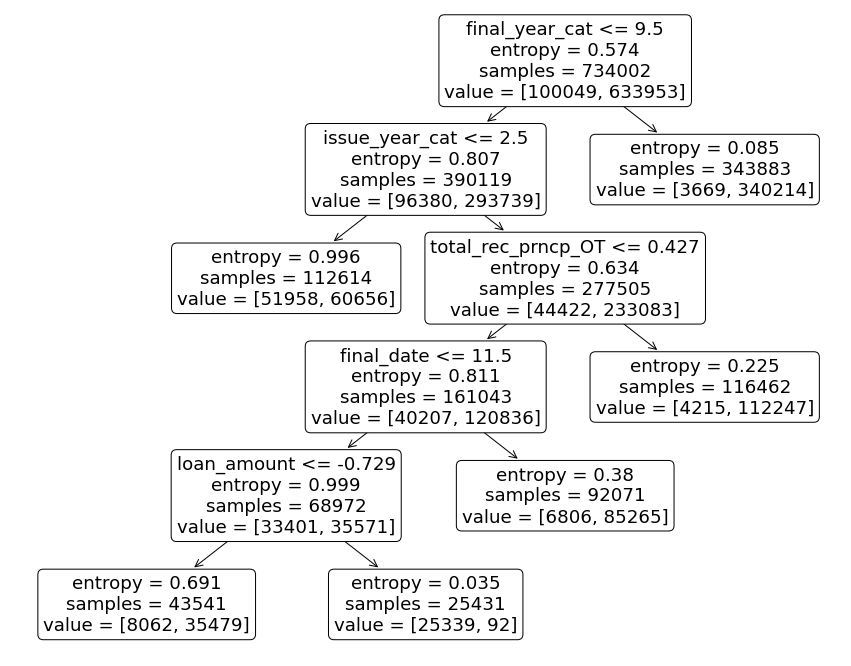

In [136]:
plt.figure(figsize=(15,12))
tree.plot_tree(decision_tree,max_depth=5,feature_names=Xtrain.columns,rounded=True)
plt.show()

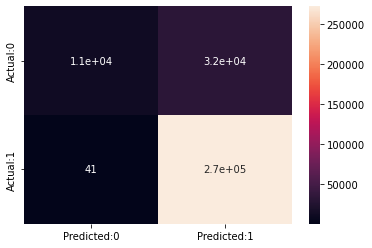

In [137]:
dt_pred = decision_tree.predict(Xtest)

confusion_matrix(ytest,dt_pred)

cm=confusion_matrix(ytest,dt_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [138]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40     42478
           1       0.90      1.00      0.94    272095

    accuracy                           0.90    314573
   macro avg       0.95      0.63      0.67    314573
weighted avg       0.91      0.90      0.87    314573



In [139]:
dt_pred_prob = decision_tree.predict_proba(Xtest)[:,1]

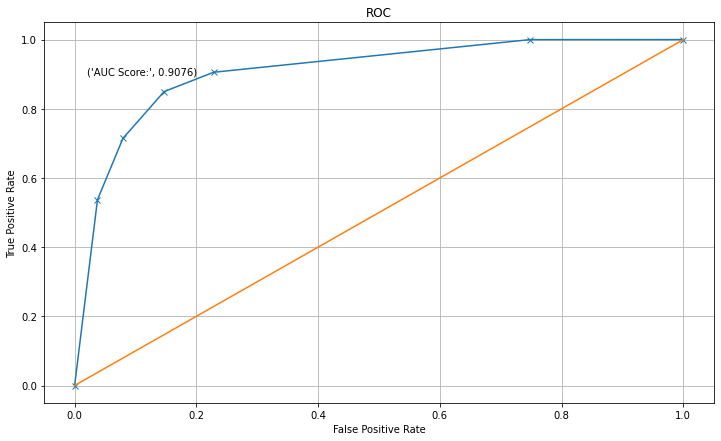

In [153]:
fpr, tpr,_=roc_curve(ytest,dt_pred_prob)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Decision Tree')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, dt_pred_prob),4)))
plt.grid(True)
plt.show()

In [140]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_dt_accuracy=accuracy_score(ytest,dt_pred)
test_dt_precision=precision_score(ytest,dt_pred)
test_dt_recall=recall_score(ytest,dt_pred)
test_dt_f1=f1_score(ytest,dt_pred)
test_dt_auc=roc_auc_score(ytest,dt_pred_prob)
print("For testing data :")
print("accuracy :",test_dt_accuracy)
print("precision :",test_dt_precision)
print("recall :",test_dt_recall)
print("f1 :",test_dt_f1)
print("auc_score :",test_dt_auc)

For testing data :
accuracy : 0.8988819765205532
precision : 0.8954387766521187
recall : 0.9998493173340194
f1 : 0.9447680829008347
auc_score : 0.9076015853696571


In [ ]:
#checking scores for training data

In [141]:
train_dt_pred = decision_tree.predict(Xtrain)

In [142]:
train_dt_pred_prob = decision_tree.predict_proba(Xtrain)[:,1]

In [143]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_dt_accuracy=accuracy_score(ytrain,train_dt_pred)
train_dt_precision=precision_score(ytrain,train_dt_pred)
train_dt_recall=recall_score(ytrain,train_dt_pred)
train_dt_f1=f1_score(ytrain,train_dt_pred)
train_dt_auc=roc_auc_score(ytrain,train_dt_pred_prob)
print("For training data :")
print("accuracy :",train_dt_accuracy)
print("precision :",train_dt_precision)
print("recall :",train_dt_recall)
print("f1 :",train_dt_f1)
print("auc_score :",train_dt_auc)

For training data :
accuracy : 0.8980901959395206
precision : 0.8945624362272799
recall : 0.9998548788317115
f1 : 0.9442825603117709
auc_score : 0.9075625355016637


Checking overfitting in decision-tree

In [144]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(Xtrain)

    # return the performace measures on train set
    return(classification_report(ytrain, train_pred))

In [145]:
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40    100049
           1       0.89      1.00      0.94    633953

    accuracy                           0.90    734002
   macro avg       0.95      0.63      0.67    734002
weighted avg       0.91      0.90      0.87    734002



In [146]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(Xtest)

    # return the performace measures on test set
    return(classification_report(ytest, test_pred))

In [147]:
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40     42478
           1       0.90      1.00      0.94    272095

    accuracy                           0.90    314573
   macro avg       0.95      0.63      0.67    314573
weighted avg       0.91      0.90      0.87    314573



In [ ]:
#there is no difference between accuracy of training and testing data,hence,our model is fit.

In [148]:
#Building a model using criteria as 'gini'
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 12,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(Xtrain, ytrain)

# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40    100049
           1       0.89      1.00      0.94    633953

    accuracy                           0.90    734002
   macro avg       0.95      0.63      0.67    734002
weighted avg       0.91      0.90      0.87    734002

Test data:
               precision    recall  f1-score   support

           0       1.00      0.26      0.41     42478
           1       0.90      1.00      0.95    272095

    accuracy                           0.90    314573
   macro avg       0.95      0.63      0.68    314573
weighted avg       0.91      0.90      0.87    314573



Identify the Important Features

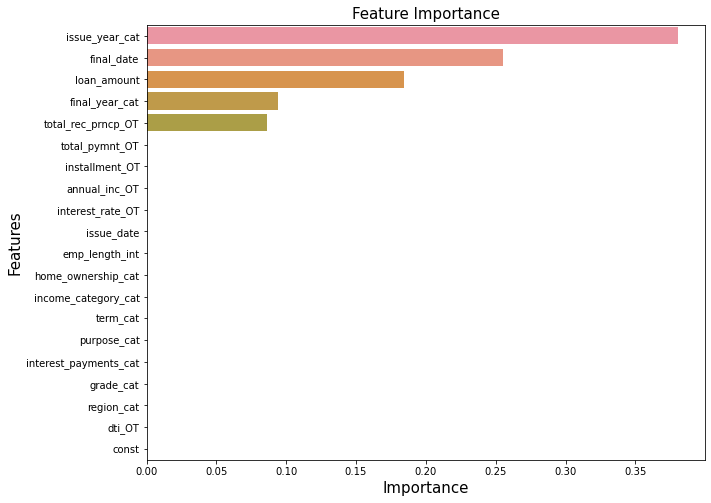

In [149]:
important_features = pd.DataFrame({'Features': Xtrain.columns, 
                                   'Importance': decision_tree.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(10,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Random Forest Classification

In [150]:
rf_classification = RandomForestClassifier(n_estimators = 40, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(Xtrain, ytrain)

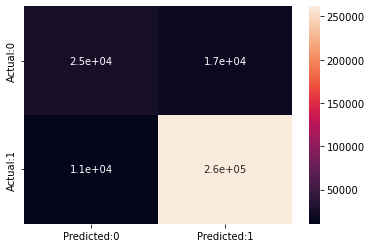

In [151]:
rf_pred = rf_model.predict(Xtest)

confusion_matrix(ytest,rf_pred)

cm=confusion_matrix(ytest,rf_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [152]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65     42478
           1       0.94      0.96      0.95    272095

    accuracy                           0.91    314573
   macro avg       0.82      0.78      0.80    314573
weighted avg       0.91      0.91      0.91    314573



In [153]:
rf_pred_prob = rf_model.predict_proba(Xtest)[:,1]

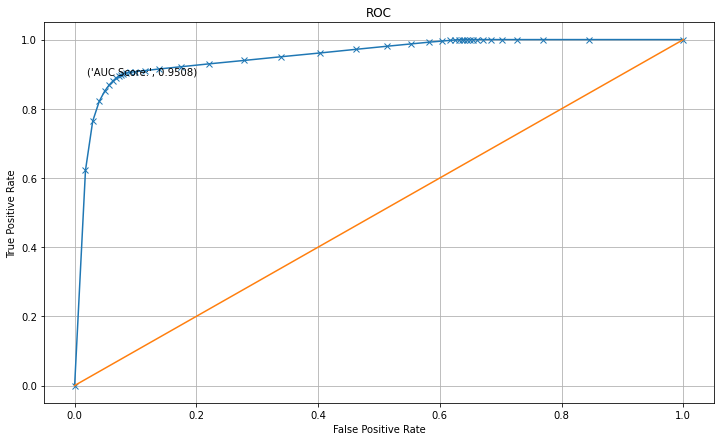

In [154]:
fpr, tpr,_=roc_curve(ytest,rf_pred_prob)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, rf_pred_prob),4)))
plt.grid(True)
plt.show()

In [155]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_rf_accuracy=accuracy_score(ytest,rf_pred)
test_rf_precision=precision_score(ytest,rf_pred)
test_rf_recall=recall_score(ytest,rf_pred)
test_rf_f1=f1_score(ytest,rf_pred)
test_rf_auc=roc_auc_score(ytest,rf_pred_prob)
print("For testing data :")
print("accuracy :",test_rf_accuracy)
print("precision :",test_rf_precision)
print("recall :",test_rf_recall)
print("f1 :",test_rf_f1)
print("auc_score :",test_rf_auc)

For testing data :
accuracy : 0.9120903574051175
precision : 0.9385709005701901
recall : 0.9612819052169279
f1 : 0.9497906582373169
auc_score : 0.9508061120918652


In [ ]:
#checking scores for training data

In [156]:
train_rf_pred = rf_model.predict(Xtrain)

In [157]:
train_rf_pred_prob = rf_model.predict_proba(Xtrain)[:,1]

In [158]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_rf_accuracy=accuracy_score(ytrain,train_rf_pred)
train_rf_precision=precision_score(ytrain,train_rf_pred)
train_rf_recall=recall_score(ytrain,train_rf_pred)
train_rf_f1=f1_score(ytrain,train_rf_pred)
train_rf_auc=roc_auc_score(ytrain,train_rf_pred_prob)
print("For training data :")
print("accuracy :",train_rf_accuracy)
print("precision :",train_rf_precision)
print("recall :",train_rf_recall)
print("f1 :",train_rf_f1)
print("auc_score :",train_rf_auc)

For training data :
accuracy : 0.9998392374952657
precision : 0.9998139009669265
recall : 1.0
f1 : 0.999906941824445
auc_score : 0.999999990981668


In [ ]:
#there is difference in scores of training and testing data,so RRandom-Forest is not a good model for this dataset.

In [159]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100049
           1       1.00      1.00      1.00    633953

    accuracy                           1.00    734002
   macro avg       1.00      1.00      1.00    734002
weighted avg       1.00      1.00      1.00    734002



In [160]:
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.71      0.60      0.65     42478
           1       0.94      0.96      0.95    272095

    accuracy                           0.91    314573
   macro avg       0.82      0.78      0.80    314573
weighted avg       0.91      0.91      0.91    314573



In [ ]:
#Here also,there is huge difference between accuracies of both train set and test set.

Identify the Important Features

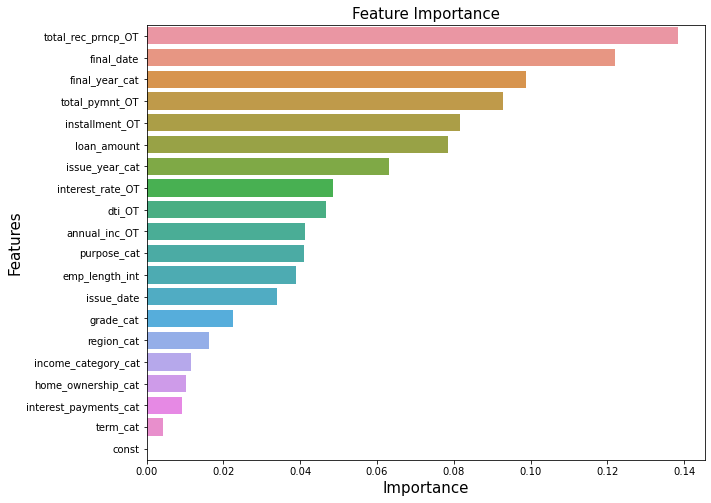

In [161]:
important_features = pd.DataFrame({'Features': Xtrain.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(10,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Boosting Methods

In [162]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [163]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(Xtest)

    # return the classification report for test data
    return(classification_report(ytest, test_pred))

In [164]:
def plot_confusion_matrix(model):
    y_pred = model.predict(Xtest)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(ytest, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [165]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(Xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

# Adaboost

In [166]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(Xtrain, ytrain)

AdaBoostClassifier(n_estimators=40, random_state=10)

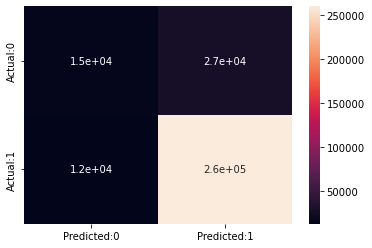

In [167]:
ada_pred = ada_model.predict(Xtest)

confusion_matrix(ytest,ada_pred)

cm=confusion_matrix(ytest,ada_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [168]:
print(classification_report(ytest,ada_pred))

              precision    recall  f1-score   support

           0       0.55      0.36      0.43     42478
           1       0.90      0.95      0.93    272095

    accuracy                           0.87    314573
   macro avg       0.73      0.66      0.68    314573
weighted avg       0.86      0.87      0.86    314573



In [169]:
ada_pred_prob = ada_model.predict_proba(Xtest)[:,1]

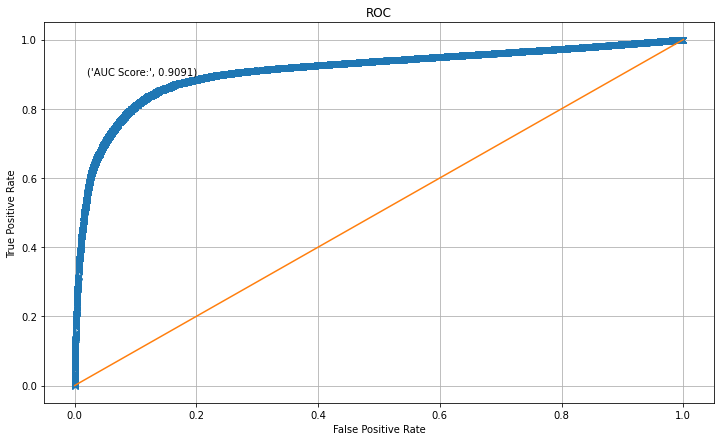

In [170]:
fpr, tpr,_=roc_curve(ytest,ada_pred_prob)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Ada Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ada_pred_prob),4)))
plt.grid(True)
plt.show()

In [171]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_ada_accuracy=accuracy_score(ytest,ada_pred)
test_ada_precision=precision_score(ytest,ada_pred)
test_ada_recall=recall_score(ytest,ada_pred)
test_ada_f1=f1_score(ytest,ada_pred)
test_ada_auc=roc_auc_score(ytest,ada_pred_prob)
print("For testing data :")
print("accuracy :",test_ada_accuracy)
print("precision :",test_ada_precision)
print("recall :",test_ada_recall)
print("f1 :",test_ada_f1)
print("auc_score :",test_ada_auc)

For testing data :
accuracy : 0.8738925464041732
precision : 0.9048863339430363
recall : 0.9545379371175509
f1 : 0.9290492202031765
auc_score : 0.9090758724614463


In [ ]:
#checking scores for training data

In [172]:
train_ada_pred = ada_model.predict(Xtrain)

In [173]:
train_ada_pred_prob = ada_model.predict_proba(Xtrain)[:,1]

In [176]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_ada_accuracy=accuracy_score(ytrain,train_ada_pred)
train_ada_precision=precision_score(ytrain,train_ada_pred)
train_ada_recall=recall_score(ytrain,train_ada_pred)
train_ada_f1=f1_score(ytrain,train_ada_pred)
train_ada_auc=roc_auc_score(ytrain,train_ada_pred_prob)
print("For training data :")
print("accuracy :",train_ada_accuracy)
print("precision :",train_ada_precision)
print("recall :",train_ada_recall)
print("f1 :",train_ada_f1)
print("auc_score :",train_ada_auc)

For training data :
accuracy : 0.8724785491047709
precision : 0.9037105219116839
recall : 0.9540013218645547
f1 : 0.9281752015254933
auc_score : 0.9085629357185692


In [ ]:
#there is no difference in scores of training and testing data,hence,our model is fit.

# Gradient Boosting

In [177]:
gboost_model = GradientBoostingClassifier(n_estimators = 40, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(Xtrain, ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=40, random_state=10)

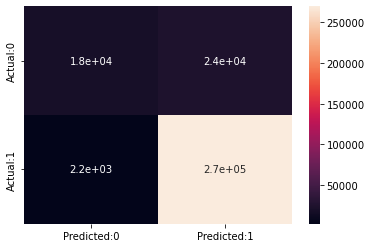

In [236]:
gboost_pred = gboost_model.predict(Xtest)

confusion_matrix(ytest,gboost_pred)

cm=confusion_matrix(ytest,gboost_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [237]:
print(classification_report(ytest,gboost_pred))

              precision    recall  f1-score   support

           0       0.89      0.43      0.58     42478
           1       0.92      0.99      0.95    272095

    accuracy                           0.92    314573
   macro avg       0.91      0.71      0.77    314573
weighted avg       0.91      0.92      0.90    314573



In [238]:
gboost_pred_prob = gboost_model.predict_proba(Xtest)[:,1]

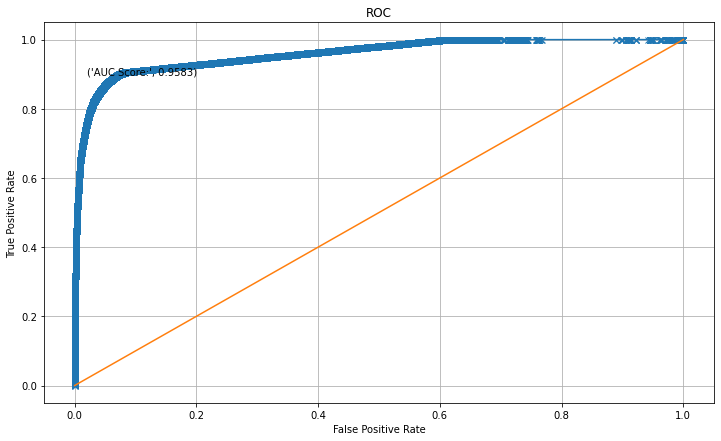

In [239]:
fpr, tpr,_=roc_curve(ytest,gboost_pred_prob)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Gradient Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, gboost_pred_prob),4)))
plt.grid(True)
plt.show()

In [240]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_gboost_accuracy=accuracy_score(ytest,gboost_pred)
test_gboost_precision=precision_score(ytest,gboost_pred)
test_gboost_recall=recall_score(ytest,gboost_pred)
test_gboost_f1=f1_score(ytest,gboost_pred)
test_gboost_auc=roc_auc_score(ytest,gboost_pred_prob)

print("accuracy :",test_gboost_accuracy)
print("precision :",test_gboost_precision)
print("recall :",test_gboost_recall)
print("f1 :",test_gboost_f1)
print("auc_score :",test_gboost_auc)

accuracy : 0.9165026877704062
precision : 0.9182315892626858
recall : 0.991785957110568
f1 : 0.9535924916870735
auc_score : 0.9582533252462838


In [ ]:
#checking scores for training data

In [241]:
train_gboost_pred = gboost_model.predict(Xtrain)

In [242]:
train_gboost_pred_prob = gboost_model.predict_proba(Xtrain)[:,1]

In [243]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_gboost_accuracy=accuracy_score(ytrain,train_gboost_pred)
train_gboost_precision=precision_score(ytrain,train_gboost_pred)
train_gboost_recall=recall_score(ytrain,train_gboost_pred)
train_gboost_f1=f1_score(ytrain,train_gboost_pred)
train_gboost_auc=roc_auc_score(ytrain,train_gboost_pred_prob)

print("accuracy :",train_gboost_accuracy)
print("precision :",train_gboost_precision)
print("recall :",train_gboost_recall)
print("f1 :",train_gboost_f1)
print("auc_score :",train_gboost_auc)

accuracy : 0.927858507197528
precision : 0.9246766688448669
recall : 0.9977490444875251
f1 : 0.9598240976506901
auc_score : 0.9719278349929397


In [ ]:
#there is very slight difference in scores of training and testing data

# XGBoost

In [244]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(Xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

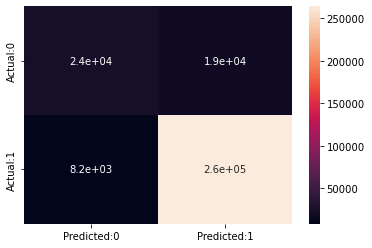

In [245]:
xgb_pred = xgb_model.predict(Xtest)

confusion_matrix(ytest,xgb_pred)

cm=confusion_matrix(ytest,xgb_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [246]:
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.56      0.64     42478
           1       0.93      0.97      0.95    272095

    accuracy                           0.91    314573
   macro avg       0.84      0.77      0.80    314573
weighted avg       0.91      0.91      0.91    314573



In [247]:
xgb_pred_prob = xgb_model.predict_proba(Xtest)[:,1]

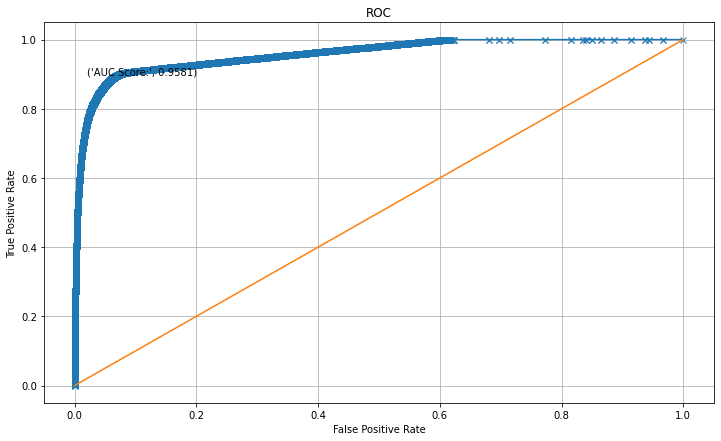

In [248]:
fpr, tpr,_=roc_curve(ytest,xgb_pred_prob)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='Xtreme Gradient Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, xgb_pred_prob),4)))
plt.grid(True)
plt.show()

In [249]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
test_xgb_accuracy=accuracy_score(ytest,xgb_pred)
test_xgb_precision=precision_score(ytest,xgb_pred)
test_xgb_recall=recall_score(ytest,xgb_pred)
test_xgb_f1=f1_score(ytest,xgb_pred)
test_xgb_auc=roc_auc_score(ytest,xgb_pred_prob)

print("accuracy :",test_xgb_accuracy)
print("precision :",test_xgb_precision)
print("recall :",test_xgb_recall)
print("f1 :",test_xgb_f1)
print("auc_score :",test_xgb_auc)

accuracy : 0.9149577363600817
precision : 0.9344091618948465
recall : 0.9697532111946195
f1 : 0.9517531678214984
auc_score : 0.958146415832563


In [ ]:
#checking scores for training data

In [250]:
train_xgb_pred = xgb_model.predict(Xtrain)

In [251]:
train_xgb_pred_prob = xgb_model.predict_proba(Xtrain)[:,1]

In [252]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
train_xgb_accuracy=accuracy_score(ytrain,train_xgb_pred)
train_xgb_precision=precision_score(ytrain,train_xgb_pred)
train_xgb_recall=recall_score(ytrain,train_xgb_pred)
train_xgb_f1=f1_score(ytrain,train_xgb_pred)
train_xgb_auc=roc_auc_score(ytrain,train_xgb_pred_prob)

print("accuracy :",train_xgb_accuracy)
print("precision :",train_xgb_precision)
print("recall :",train_xgb_recall)
print("f1 :",train_xgb_f1)
print("auc_score :",train_xgb_auc)

accuracy : 0.9552835005899166
precision : 0.9595627078475594
recall : 0.9899440494800088
f1 : 0.9745166454706525
auc_score : 0.9871244826378306


In [ ]:
#there is a slight difference in both scores

#  Table for all models accuracy,precision,recall,f1_score,roc_auc_score

In [253]:
df_final=pd.DataFrame({'Model': ['Logistic regression','Log_Regression with RFE','Naive Bayes Classifier','Decision Tree Classifier', 'Random Forest Trees Classifier', 'Ada Boosting Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting'],
                'Train_Accuracy': [train_log_reg_accuracy,train_rfe_accuracy,  train_gnb_accuracy, train_dt_accuracy, train_rf_accuracy, train_ada_accuracy,train_gboost_accuracy,train_xgb_accuracy],
                'Test_Accuracy': [test_log_reg_accuracy,test_rfe_accuracy,  test_gnb_accuracy, test_dt_accuracy, test_rf_accuracy, test_ada_accuracy,test_gboost_accuracy,test_xgb_accuracy],
                'Train_Precision': [train_log_reg_precision,train_rfe_precision,  train_gnb_precision, train_dt_precision, train_rf_precision, train_ada_precision,train_gboost_precision,train_xgb_precision],
                'Test_Precision': [test_log_reg_precision,test_rfe_accuracy,  test_gnb_precision, test_dt_precision, test_rf_precision, test_ada_precision,test_gboost_precision,test_xgb_precision],
                'Train_Recall': [train_log_reg_recall,train_rfe_recall, train_gnb_recall, train_dt_recall, train_rf_recall, train_ada_recall,train_gboost_recall,train_xgb_recall],
                'Test_Recall': [test_log_reg_recall,test_rfe_accuracy, test_gnb_recall, test_dt_recall, test_rf_recall, test_ada_recall,test_gboost_recall,test_xgb_recall],
                'Train_F1_score': [train_log_reg_f1,train_rfe_f1,  train_gnb_f1, train_dt_f1, train_rf_f1, train_ada_f1,train_gboost_f1,train_xgb_f1],
                'Test_F1_score': [test_log_reg_f1,test_rfe_accuracy,  test_gnb_f1, test_dt_f1, test_rf_f1, test_ada_f1,test_gboost_f1,test_xgb_f1],
                'Train_roc_auc_score':[train_log_reg_auc,train_rfe_auc,train_gnb_auc, train_dt_auc, train_rf_auc, train_ada_auc,train_gboost_auc,train_xgb_auc],
                'Test_roc_auc_score':[test_log_reg_auc,test_rfe_accuracy,test_gnb_auc,test_dt_auc,test_rf_auc,test_ada_auc,test_gboost_auc,test_xgb_auc]})

In [254]:
table=pd.pivot_table(df_final, index=['Model', 'Train_Accuracy','Test_Accuracy','Train_Precision','Test_Precision',
                                      'Train_Recall','Test_Recall','Train_F1_score','Test_F1_score','Train_roc_auc_score','Test_roc_auc_score'])
table

Empty DataFrame
Columns: []
Index: [(Ada Boosting Classifier, 0.8724785491047709, 0.8738925464041732, 0.9037105219116839, 0.9048863339430363, 0.9540013218645547, 0.9545379371175509, 0.9281752015254933, 0.9290492202031765, 0.9085629357185692, 0.9090758724614463), (Decision Tree Classifier, 0.8980901959395206, 0.8988819765205532, 0.8945624362272799, 0.8954387766521187, 0.9998548788317115, 0.9998493173340194, 0.9442825603117709, 0.9447680829008347, 0.9075625355016637, 0.9076015853696571), (Gradient Boosting Classifier, 0.927858507197528, 0.9165026877704062, 0.9246766688448669, 0.9182315892626858, 0.9977490444875251, 0.991785957110568, 0.9598240976506901, 0.9535924916870735, 0.9719278349929397, 0.9582533252462838), (Log_Regression with RFE, 0.8601516072163291, 0.8613612738537637, 0.8898597601422944, 0.8613612738537637, 0.9564652269174528, 0.8613612738537637, 0.9219611101776931, 0.8613612738537637, 0.86832081237703, 0.8613612738537637), (Logistic regression, 0.8598464309361555, 0.8613739895032314, 0.8912802588691567, 0.8923102810028605, 0.9541117401447742, 0.9549863099285176, 0.9216263636135081, 0.9225850431917514, 0.6083265474404767, 0.8737538507799387), (Naive Bayes Classifier, 0.8441557379952643, 0.8460452740699297, 0.9260913422505064, 0.9270518690500285, 0.8906401578665927, 0.8922177915801467, 0.908019857868608, 0.9093013412839019, 0.8342016175917494, 0.8347053803250041), (Random Forest Trees Classifier, 0.9998392374952657, 0.9120903574051175, 0.9998139009669265, 0.9385709005701901, 1.0, 0.9612819052169279, 0.999906941824445, 0.9497906582373169, 0.999999990981668, 0.9508061120918652), (Xtreme Gradient Boosting, 0.9552835005899166, 0.9149577363600817, 0.9595627078475594, 0.9344091618948465, 0.9899440494800088, 0.9697532111946195, 0.9745166454706525, 0.9517531678214984, 0.9871244826378306, 0.958146415832563)]

In [ ]:
#After analyzing performance of each model,we found that model built using gradient boosting is the best model.